# Analyse du Marché des Jeux Vidéo pour le Développement d’un Jeu Triple A


## Introduction
L’industrie du jeu vidéo est aujourd’hui l’un des secteurs les plus dynamiques, innovants et rentables au monde. Dans un marché en constante évolution, comprendre les préférences des joueurs, les tendances de consommation et les moteurs du succès commercial est devenu essentiel pour orienter les décisions stratégiques des éditeurs et constructeurs.

Dans le cadre du projet Triple A porté par UOI Games, ce notebook présente une analyse approfondie de plusieurs sources de données afin d’identifier les opportunités de marché et formuler des recommandations concrètes. Les données analysées couvrent :

- Les notes des joueurs (All_publish_VideoGame_2022), pour cerner les préférences qualitatives ;

- Les ventes de consoles, afin d’identifier les plateformes les plus performantes ;

- Les ventes de jeux vidéo, pour détecter les genres les plus rentables ;

- Les données issues de Twitch, pour comprendre l’influence du streaming sur la visibilité des jeux ;

- Un questionnaire ciblé Triple A, pour mieux saisir les attentes actuelles des joueurs vis-à-vis des productions à gros budget.

L’objectif est de fournir des recommandations stratégiques sur le genre de jeu à développer, le segment de clientèle à viser, ainsi que les leviers marketing à activer pour accompagner le lancement d’un jeu vidéo triple A avec un fort potentiel commercial et un écosystème adapté.

#### Importation des libréries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import kstest 
from scipy.stats import spearmanr
import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

#### Chargement des données : 
###### Les données ont été importées à partir de fichiers Excel et CSV

In [2]:
df_All_publish = pd.read_excel('All_publish_VideoGame_2022.xlsx')

In [3]:
df_console = pd.read_excel('Vente+de+console_2022.xlsx')

In [4]:
df_sales_16 = pd.read_excel('VideoGame_Sales_1980-2016.xlsx')

In [5]:
df_twitch = pd.read_csv('Twitch_game_data.csv', sep=';', encoding='latin1')

In [6]:
Questionnaire = pd.read_excel('Gaming_Questionnaire_TripleA.xlsx')

# Données notes des joueurs (All_publish_VideoGame_2022)

## Préparation et nettoyage des données notes des joueurs 

In [7]:
df_All_publish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440896 entries, 0 to 440895
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    440896 non-null  int64         
 1   slug                  440880 non-null  object        
 2   name                  440885 non-null  object        
 3   metacritic            4627 non-null    float64       
 4   released              440896 non-null  datetime64[ns]
 5   Annee                 440896 non-null  int64         
 6   tba                   440896 non-null  bool          
 7   rating                440833 non-null  float64       
 8   rating_top            440833 non-null  float64       
 9   playtime              440833 non-null  float64       
 10  achievements_count    440833 non-null  float64       
 11  ratings_count         440833 non-null  float64       
 12  suggestions_count     440833 non-null  float64       
 13 

In [8]:
print('='*80)
print("df_All_publish:")
print(df_All_publish.columns)
print('='*80)

df_All_publish:
Index(['id', 'slug', 'name', 'metacritic', 'released', 'Annee', 'tba',
       'rating', 'rating_top', 'playtime', 'achievements_count',
       'ratings_count', 'suggestions_count', 'game_series_count',
       'reviews_count', 'developers', 'genres', 'publishers', 'esrb_rating',
       'added_status_yet', 'added_status_owned', 'added_status_beaten',
       'added_status_toplay', 'added_status_dropped', 'added_status_playing',
       'platforms', 'PC', 'macOS', 'iOS', 'Web', 'Linux', 'Xbox One',
       'Android', 'PS Vita', 'PlayStation 4', 'Nintendo Switch',
       'PlayStation 2', 'Wii U', 'PlayStation 3', 'Xbox 36', 'GameCube', 'Wii',
       'Xbox', 'Genesis', 'Neo Geo', 'Nintendo 3DS', 'PlayStation', 'PSP',
       'Nintendo DS', 'Game Boy Advance', 'Game Boy Color', 'Game Boy',
       'Nintendo DSi', 'SNES', 'SEGA Master System', 'Nintendo 64',
       'Classic Macintosh', 'Apple II', 'NES', 'Dreamcast', 'PlayStation 5',
       'Xbox Series S/X', 'Commodore / Amiga', '

In [9]:
#----------------------------------------------
# 1. Sélectionner les colonnes nécessaires pour l'analyse
#----------------------------------------------
columns_to_keep = [
    'id', 'slug', 'name', 'metacritic', 'released', 'Annee', 'reviews_count', 'suggestions_count',
    'rating', 'ratings_count', 'developers', 'publishers', 'genres', 'platforms', 'PC', 'macOS', 'iOS',
    'Web', 'Linux', 'Xbox One', 'Android', 'PS Vita', 'PlayStation 4',
    'Nintendo Switch', 'PlayStation 2', 'Wii U', 'PlayStation 3', 'Xbox 36',
    'GameCube', 'Wii', 'Xbox', 'Genesis', 'Neo Geo', 'Nintendo 3DS',
    'PlayStation', 'PSP', 'Nintendo DS', 'Game Boy Advance', 'Game Boy Color',
    'Game Boy', 'Nintendo DSi', 'SNES', 'SEGA Master System', 'Nintendo 64',
    'Classic Macintosh', 'Apple II', 'NES', 'Dreamcast', 'PlayStation 5',
    'Xbox Series S/X', 'Commodore / Amiga', 'Atari 26', 'Atari ST', 
    'Atari 78', 'SEGA Saturn'
]

df_All_publish = df_All_publish[columns_to_keep]

#----------------------------------------------
# 2. Vérifier les colonnes restantes après la sélection
#----------------------------------------------
print("Colonnes conservées dans le DataFrame :")
print(df_All_publish.columns.tolist())


Colonnes conservées dans le DataFrame :
['id', 'slug', 'name', 'metacritic', 'released', 'Annee', 'reviews_count', 'suggestions_count', 'rating', 'ratings_count', 'developers', 'publishers', 'genres', 'platforms', 'PC', 'macOS', 'iOS', 'Web', 'Linux', 'Xbox One', 'Android', 'PS Vita', 'PlayStation 4', 'Nintendo Switch', 'PlayStation 2', 'Wii U', 'PlayStation 3', 'Xbox 36', 'GameCube', 'Wii', 'Xbox', 'Genesis', 'Neo Geo', 'Nintendo 3DS', 'PlayStation', 'PSP', 'Nintendo DS', 'Game Boy Advance', 'Game Boy Color', 'Game Boy', 'Nintendo DSi', 'SNES', 'SEGA Master System', 'Nintendo 64', 'Classic Macintosh', 'Apple II', 'NES', 'Dreamcast', 'PlayStation 5', 'Xbox Series S/X', 'Commodore / Amiga', 'Atari 26', 'Atari ST', 'Atari 78', 'SEGA Saturn']


In [10]:
df_All_publish.head(2)

id            slug                   name  metacritic   released  Annee  \
0   1  dgeneration-hd        D/Generation HD         NaN 2015-10-23   2015   
1  10         g-prime  G Prime Into The Rain         NaN 2016-01-06   2016   

   reviews_count  suggestions_count  rating  ratings_count  ... Apple II NES  \
0            4.0              292.0     0.0            2.0  ...      NaN NaN   
1            3.0              389.0     0.0            3.0  ...      NaN NaN   

  Dreamcast PlayStation 5  Xbox Series S/X  Commodore / Amiga  Atari 26  \
0       NaN           NaN              NaN                NaN       NaN   
1       NaN           NaN              NaN                NaN       NaN   

   Atari ST  Atari 78  SEGA Saturn  
0       NaN       NaN          NaN  
1       NaN       NaN          NaN  

[2 rows x 55 columns]

In [11]:
#----------------------------------------------
# 1. Vérification des valeurs manquantes
#----------------------------------------------
print("Valeurs manquantes dans les données df_All_publish :")
missing_values = df_All_publish.isnull().sum()  # Nombre de valeurs manquantes par colonne
print(missing_values)

#----------------------------------------------
# 2. Afficher un résumé des colonnes ayant des valeurs manquantes
#----------------------------------------------
print("\nColonnes avec des valeurs manquantes :")
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

#----------------------------------------------
# 3. Nombre total de valeurs manquantes dans le DataFrame
#----------------------------------------------
total_missing = missing_values.sum()
print(f"\nNombre total de valeurs manquantes dans df_All_publish : {total_missing}")


Valeurs manquantes dans les données df_All_publish :
id                         0
slug                      16
name                      11
metacritic            436269
released                   0
Annee                      0
reviews_count             63
suggestions_count         63
rating                    63
ratings_count             63
developers              4656
publishers            318917
genres                 98902
platforms               3423
PC                    182031
macOS                 381292
iOS                   373894
Web                   329390
Linux                 399318
Xbox One              437098
Android               417812
PS Vita               439226
PlayStation 4         435809
Nintendo Switch       437138
PlayStation 2         439441
Wii U                 439858
PlayStation 3         437719
Xbox 36               438526
GameCube              440298
Wii                   438155
Xbox                  434580
Genesis               440878
Neo Geo            

In [12]:
#--------------------------------------------------------
# 1. Remplir les valeurs manquantes pour la colonne 'genres'
#--------------------------------------------------------
# Convertir 'genres' en type object et remplacer NaN par 'Non spécifié'
df_All_publish['genres'] = df_All_publish['genres'].astype('object').fillna('Non spécifié')
df_All_publish['publishers'] = df_All_publish['publishers'].astype('object').fillna('Non spécifié')

#--------------------------------------------------------
# 2. Supprimer les lignes avec des valeurs manquantes dans certaines colonnes car sont peu nombreuses
#--------------------------------------------------------
columns_to_check = ['name', 'reviews_count', 'suggestions_count', 'rating', 'ratings_count', 'platforms', 'developers']
df_All_publish = df_All_publish.dropna(subset=columns_to_check)

#--------------------------------------------------------
# 3. Réinitialiser l'index après avoir supprimé des lignes
#--------------------------------------------------------
df_All_publish.reset_index(drop=True, inplace=True)

#--------------------------------------------------------
# 4. Vérifier les valeurs manquantes après traitement
#--------------------------------------------------------
print("Valeurs manquantes après traitement :")
print(df_All_publish.isnull().sum())



Valeurs manquantes après traitement :
id                         0
slug                      14
name                       0
metacritic            428464
released                   0
Annee                      0
reviews_count              0
suggestions_count          0
rating                     0
ratings_count              0
developers                 0
publishers                 0
genres                     0
platforms                  0
PC                    175018
macOS                 373522
iOS                   366131
Web                   321527
Linux                 391459
Xbox One              429576
Android               410002
PS Vita               431370
PlayStation 4         428291
Nintendo Switch       429538
PlayStation 2         431587
Wii U                 432000
PlayStation 3         429869
Xbox 36               430691
GameCube              432376
Wii                   431026
Xbox                  427227
Genesis               432953
Neo Geo               432957
Ninte

In [13]:
#--------------------------------------------------------
# 1. Liste des colonnes à traiter pour remplacer NaN par 0
#--------------------------------------------------------
columns_to_fill = [
    'PC', 'macOS', 'iOS', 'Web', 'Linux', 'Xbox One', 'Android', 'PS Vita', 
    'PlayStation 4', 'Nintendo Switch', 'PlayStation 2', 'Wii U', 
    'PlayStation 3', 'Xbox 36', 'GameCube', 'Wii', 'Xbox', 'Genesis', 
    'Neo Geo', 'Nintendo 3DS', 'PlayStation', 'PSP', 'Nintendo DS', 
    'Game Boy Advance', 'Game Boy Color', 'Game Boy', 'Nintendo DSi', 
    'SNES', 'SEGA Master System', 'Nintendo 64', 'Classic Macintosh', 
    'Apple II', 'NES', 'Dreamcast', 'PlayStation 5', 'Xbox Series S/X', 
    'Commodore / Amiga', 'Atari 26', 'Atari ST', 'Atari 78', 'SEGA Saturn', 'metacritic'
]

#--------------------------------------------------------
# 2. Remplacer les NaN par 0 dans les colonnes spécifiées
#--------------------------------------------------------
df_All_publish[columns_to_fill] = df_All_publish[columns_to_fill].fillna(0)
#--------------------------------------------------------
# 3. Vérification des modifications
#--------------------------------------------------------
print("Vérification des valeurs manquantes après traitement :")
missing_values = df_All_publish[columns_to_fill].isnull().sum()
print(missing_values)

# Vérification qu'aucune colonne ne contient encore de NaN
assert missing_values.sum() == 0, "Il reste encore des NaN dans les colonnes spécifiées."
print("Toutes les valeurs manquantes ont été remplacées par 0.")

Vérification des valeurs manquantes après traitement :
PC                    0
macOS                 0
iOS                   0
Web                   0
Linux                 0
Xbox One              0
Android               0
PS Vita               0
PlayStation 4         0
Nintendo Switch       0
PlayStation 2         0
Wii U                 0
PlayStation 3         0
Xbox 36               0
GameCube              0
Wii                   0
Xbox                  0
Genesis               0
Neo Geo               0
Nintendo 3DS          0
PlayStation           0
PSP                   0
Nintendo DS           0
Game Boy Advance      0
Game Boy Color        0
Game Boy              0
Nintendo DSi          0
SNES                  0
SEGA Master System    0
Nintendo 64           0
Classic Macintosh     0
Apple II              0
NES                   0
Dreamcast             0
PlayStation 5         0
Xbox Series S/X       0
Commodore / Amiga     0
Atari 26              0
Atari ST              0
Atari 78 

In [14]:
#--------------------------------------------------------
# 1. Liste des colonnes à convertir en int
#--------------------------------------------------------
columns_to_convert = [
    'ratings_count', 'suggestions_count', 'reviews_count', 'PC', 'macOS', 'iOS', 'Web', 'Linux', 
    'Xbox One', 'Android', 'PS Vita', 'PlayStation 4', 'Nintendo Switch', 'PlayStation 2', 'Wii U', 
    'PlayStation 3', 'Xbox 36', 'GameCube', 'Wii', 'Xbox', 'Genesis', 'Neo Geo', 'Nintendo 3DS', 
    'PlayStation', 'PSP', 'Nintendo DS', 'Game Boy Advance', 'Game Boy Color', 'Game Boy', 
    'Nintendo DSi', 'SNES', 'SEGA Master System', 'Nintendo 64', 'Classic Macintosh', 'Apple II', 
    'NES', 'Dreamcast', 'PlayStation 5', 'Xbox Series S/X', 'Commodore / Amiga', 'Atari 26', 
    'Atari ST', 'Atari 78', 'SEGA Saturn'
]

#--------------------------------------------------------
# 2. Convertir les colonnes spécifiées en int
#--------------------------------------------------------
df_All_publish[columns_to_convert] = df_All_publish[columns_to_convert].astype(int)

#--------------------------------------------------------
# 3. Vérification des types de données après conversion
#--------------------------------------------------------
print("\nTypes de données dans df_All_publish après conversion :")
print(df_All_publish[columns_to_convert].dtypes)



Types de données dans df_All_publish après conversion :
ratings_count         int32
suggestions_count     int32
reviews_count         int32
PC                    int32
macOS                 int32
iOS                   int32
Web                   int32
Linux                 int32
Xbox One              int32
Android               int32
PS Vita               int32
PlayStation 4         int32
Nintendo Switch       int32
PlayStation 2         int32
Wii U                 int32
PlayStation 3         int32
Xbox 36               int32
GameCube              int32
Wii                   int32
Xbox                  int32
Genesis               int32
Neo Geo               int32
Nintendo 3DS          int32
PlayStation           int32
PSP                   int32
Nintendo DS           int32
Game Boy Advance      int32
Game Boy Color        int32
Game Boy              int32
Nintendo DSi          int32
SNES                  int32
SEGA Master System    int32
Nintendo 64           int32
Classic Macintosh  

In [15]:
#--------------------------------------------------------
# 1. Liste des colonnes à analyser
#--------------------------------------------------------
columns_notes = ['reviews_count', 'suggestions_count', 'rating', 'ratings_count', 'metacritic']

#--------------------------------------------------------
# 2. Calculer et afficher le pourcentage de valeurs égales à 0
#--------------------------------------------------------
print("Pourcentage de valeurs 0 dans les colonnes sélectionnées :")
for col in columns_notes:
    # Calculer le pourcentage de valeurs égales à 0
    percentage_zeros = (df_All_publish[col] == 0).sum() / len(df_All_publish) * 100
    # Afficher le résultat
    print(f"- {col} : {percentage_zeros:.2f}%")


Pourcentage de valeurs 0 dans les colonnes sélectionnées :
- reviews_count : 93.21%
- suggestions_count : 7.00%
- rating : 97.67%
- ratings_count : 93.34%
- metacritic : 98.96%


In [16]:
df_All_publish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432967 entries, 0 to 432966
Data columns (total 55 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  432967 non-null  int64         
 1   slug                432953 non-null  object        
 2   name                432967 non-null  object        
 3   metacritic          432967 non-null  float64       
 4   released            432967 non-null  datetime64[ns]
 5   Annee               432967 non-null  int64         
 6   reviews_count       432967 non-null  int32         
 7   suggestions_count   432967 non-null  int32         
 8   rating              432967 non-null  float64       
 9   ratings_count       432967 non-null  int32         
 10  developers          432967 non-null  object        
 11  publishers          432967 non-null  object        
 12  genres              432967 non-null  object        
 13  platforms           432967 no

In [17]:
#--------------------------------------------------------
# 1. Diviser les genres en colonnes distinctes
#--------------------------------------------------------
# La méthode `str.split` divise les genres sur le séparateur '||'
df_split = df_All_publish['genres'].str.split(r'\|\|', expand=True)

#--------------------------------------------------------
# 2. Renommer les nouvelles colonnes
#--------------------------------------------------------
# Les colonnes sont renommées en 'Genre_1', 'Genre_2', etc.
df_split.columns = [f'Genre_{i+1}' for i in range(df_split.shape[1])]

#--------------------------------------------------------
# 3. Concaténer les colonnes divisées avec le DataFrame original
#--------------------------------------------------------
df_All_publish = pd.concat([df_All_publish, df_split], axis=1)

#--------------------------------------------------------
# 4. Vérification des résultats
#--------------------------------------------------------
print("Aperçu du DataFrame après le traitement des genres :")
df_All_publish.head(2)


Aperçu du DataFrame après le traitement des genres :


id            slug                   name  metacritic   released  Annee  \
0   1  dgeneration-hd        D/Generation HD         0.0 2015-10-23   2015   
1  10         g-prime  G Prime Into The Rain         0.0 2016-01-06   2016   

   reviews_count  suggestions_count  rating  ratings_count  ... Genre_10  \
0              4                292     0.0              2  ...     None   
1              3                389     0.0              3  ...     None   

  Genre_11 Genre_12 Genre_13  Genre_14  Genre_15  Genre_16  Genre_17  \
0     None     None     None      None      None      None      None   
1     None     None     None      None      None      None      None   

   Genre_18  Genre_19  
0      None      None  
1      None      None  

[2 rows x 74 columns]

## Analyse des données notes des joueurs

In [18]:
#--------------------------------------------------------
# 1. Normaliser les valeurs dans les colonnes des genres
#--------------------------------------------------------
for col in df_split.columns:
    df_split[col] = df_split[col].str.lower().str.strip()

#--------------------------------------------------------
# 2. Fusionner les colonnes des genres en une seule
#--------------------------------------------------------
df_All_publish['all_genres'] = df_split.apply(lambda row: ', '.join(row.dropna()), axis=1)

#--------------------------------------------------------
# 3. Supprimer la colonne originale 'genres'
#--------------------------------------------------------
#df_All_publish = df_All_publish.drop(columns=['genres'])

#--------------------------------------------------------
# 4. Vérification des modifications
#--------------------------------------------------------
print("Aperçu du DataFrame après la fusion des genres :")
print(df_All_publish[['all_genres']].head())


Aperçu du DataFrame après la fusion des genres :
                             all_genres
0                     adventure, puzzle
1                     simulation, indie
2                     adventure, arcade
3                         action, indie
4  rpg, strategy, massively multiplayer


### Analyse des plateformes

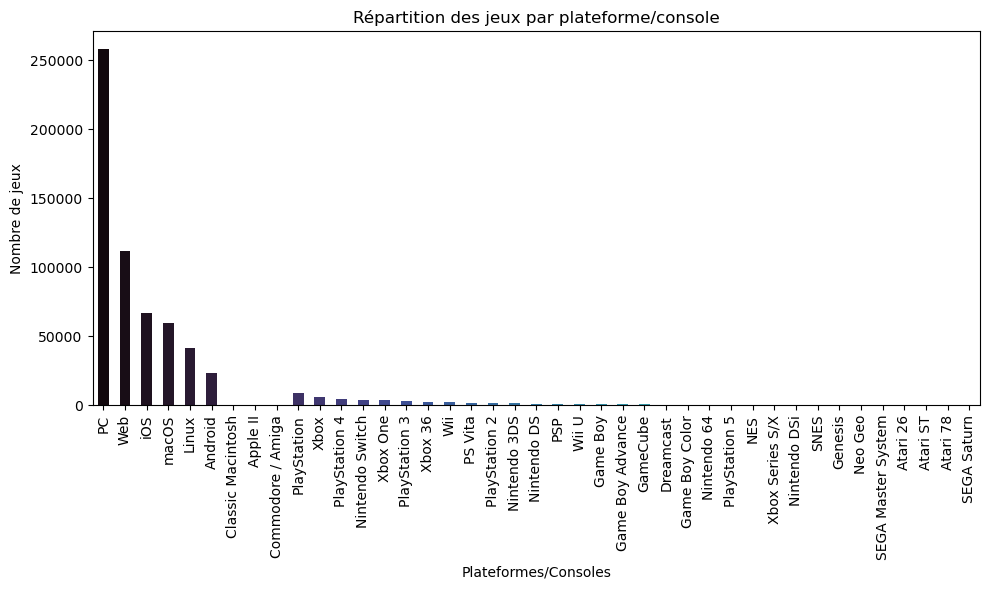

In [19]:
#--------------------------------------------------------
# 1. Répartition des jeux par plateforme et console
#--------------------------------------------------------
# Filtrer les plateformes et calculer le total par plateforme
platforms_consoles = df_All_publish[['PC', 'Web', 'iOS', 'macOS', 'Linux', 'Android', 
                                'Classic Macintosh', 'Apple II', 'Commodore / Amiga', 
                                'PlayStation', 'Xbox', 'PlayStation 4', 'Nintendo Switch','Xbox One',
                               'PlayStation 3', 'Xbox 36', 'Wii', 'PS Vita', 'PlayStation 2', 
                               'Nintendo 3DS','Nintendo DS', 'PSP', 'Wii U', 'Game Boy', 
                               'Game Boy Advance', 'GameCube', 'Dreamcast', 'Game Boy Color', 
                               'Nintendo 64', 'PlayStation 5', 'NES', 'Xbox Series S/X', 
                               'Nintendo DSi', 'SNES', 'Genesis', 'Neo Geo', 'SEGA Master System', 
                               'Atari 26', 'Atari ST', 'Atari 78', 'SEGA Saturn']].sum()

# Palette de couleurs pour les plateformes
colors_platforms = sns.color_palette("mako", len(platforms_consoles))

# Création du graphique pour les plateformes
plt.figure(figsize=(10, 6))
platforms_consoles.plot(
    kind='bar', 
    color=colors_platforms, 
    title='Répartition des jeux par plateforme/console'
)

# Ajouter les labels
plt.xlabel('Plateformes/Consoles')
plt.ylabel('Nombre de jeux')

# Afficher le graphique
plt.tight_layout()
plt.show()


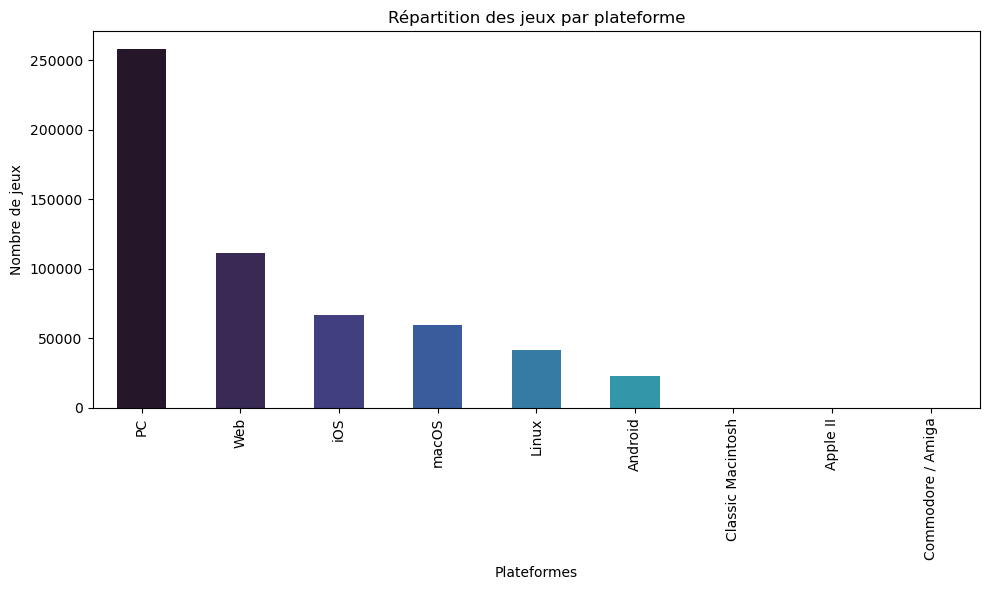

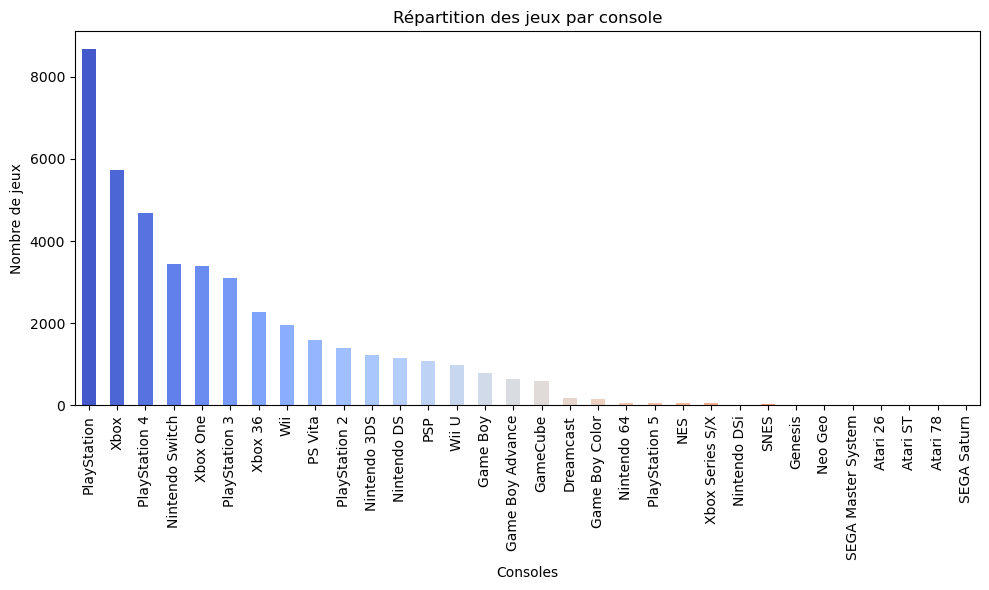

In [20]:
# Séparation de platforms et consoles pour plus de clarté
#--------------------------------------------------------
# 1. Répartition des jeux par plateforme
#--------------------------------------------------------
# Filtrer les plateformes et calculer le total par plateforme
platforms_fil = df_All_publish[['PC', 'Web', 'iOS', 'macOS', 'Linux', 'Android', 
                                'Classic Macintosh', 'Apple II', 'Commodore / Amiga']].sum()

# Palette de couleurs pour les plateformes
colors_platforms = sns.color_palette("mako", len(platforms_fil))

# Création du graphique pour les plateformes
plt.figure(figsize=(10, 6))
platforms_fil.plot(
    kind='bar', 
    color=colors_platforms, 
    title='Répartition des jeux par plateforme'
)

# Ajouter les labels
plt.xlabel('Plateformes')
plt.ylabel('Nombre de jeux')

# Afficher le graphique
plt.tight_layout()
plt.show()

#--------------------------------------------------------
# 2. Répartition des jeux par console
#--------------------------------------------------------
# Filtrer les consoles et calculer le total par console
consoles_fil = df_All_publish[['PlayStation', 'Xbox', 'PlayStation 4', 'Nintendo Switch','Xbox One',
                               'PlayStation 3', 'Xbox 36', 'Wii', 'PS Vita', 'PlayStation 2', 
                               'Nintendo 3DS','Nintendo DS', 'PSP', 'Wii U', 'Game Boy', 
                               'Game Boy Advance', 'GameCube', 'Dreamcast', 'Game Boy Color', 
                               'Nintendo 64', 'PlayStation 5', 'NES', 'Xbox Series S/X', 
                               'Nintendo DSi', 'SNES', 'Genesis', 'Neo Geo', 'SEGA Master System', 
                               'Atari 26', 'Atari ST', 'Atari 78', 'SEGA Saturn']].sum()

# Palette de couleurs pour les consoles
colors_consoles = sns.color_palette("coolwarm", len(consoles_fil))

# Création du graphique pour les consoles
plt.figure(figsize=(10, 6))
consoles_fil.plot(
    kind='bar', 
    color=colors_consoles, 
    title='Répartition des jeux par console'
)

# Ajouter les labels
plt.xlabel('Consoles')
plt.ylabel('Nombre de jeux')

# Afficher le graphique
plt.tight_layout()
plt.show()


### Conclusion sur les analyses des plateforms et consoles

PC et Web se détachent nettement, avec des nombres de jeux beaucoup plus élevés que les autres plateformes. Cela indique que ces deux plateformes sont les plus populaires en termes de nombre de jeux disponibles.
iOS, macOS, Linux et Android suivent avec des nombres significatifs mais bien inférieurs à ceux du PC et du Web. Ces plateformes sont courantes pour les jeux mobiles et les jeux PC multiplateformes.

PlayStation 4 et Nintendo Switch viennent ensuite avec une forte concentration de jeux. Cela montre la dominance de ces consoles modernes sur le marché du jeu vidéo.
Xbox One et PlayStation 3 apparaissent également parmi les plateformes les plus populaires, mais leurs nombres sont bien plus faibles par rapport aux consoles plus récentes comme la PS4 et la Switch.

PlayStation 5 et Xbox Series S/X apparaissent à la fin du graphique, avec un nombre de jeux assez faible par rapport aux autres plateformes. Cela pourrait être dû à la nouveauté de ces consoles et au fait que de nombreux jeux sont encore en cours de développement pour ces dernières.


### Analyse des genres

#### Analyse des genres les plus fréquents

Top 10 des genres les plus fréquents (hors 'non spécifié') :
all_genres
action        92641
adventure     66139
puzzle        53027
platformer    47182
simulation    37311
shooter       30448
strategy      29399
rpg           28071
indie         26757
casual        24408
Name: count, dtype: int64


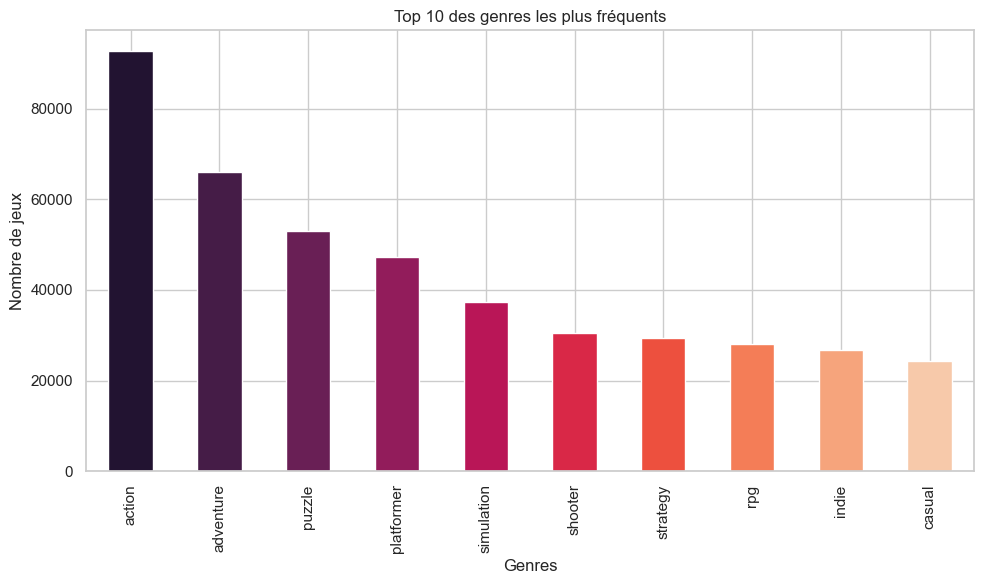

In [383]:
#--------------------------------------------------------
# Top 10 des genres les plus fréquents 
# 1. Transformer la colonne 'all_genres' en une seule colonne en "explosant" les genres
#--------------------------------------------------------
genres_exploded = df_All_publish['all_genres'].str.split(', ').explode()

# Exclure le genre "Non spécifié"
genres_exploded = genres_exploded[genres_exploded != "non spécifié"]

#--------------------------------------------------------
# 2. Compter les occurrences de chaque genre
#--------------------------------------------------------
genre_counts = genres_exploded.value_counts()

# Afficher les 10 genres les plus fréquents
print("Top 10 des genres les plus fréquents (hors 'non spécifié') :")
print(genre_counts.head(10))

#--------------------------------------------------------
# 3. Création du graphique pour les genres les plus fréquents
#--------------------------------------------------------
# Palette de couleurs dégradée
colors_genres = sns.color_palette("rocket", len(genre_counts.head(10)))

# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(
    kind='bar', 
    color=colors_genres, 
    title='Top 10 des genres les plus fréquents'
)

# Ajouter les labels
plt.xlabel('Genres')
plt.ylabel('Nombre de jeux')

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()


#### Analyse des notes et avis des joueurs

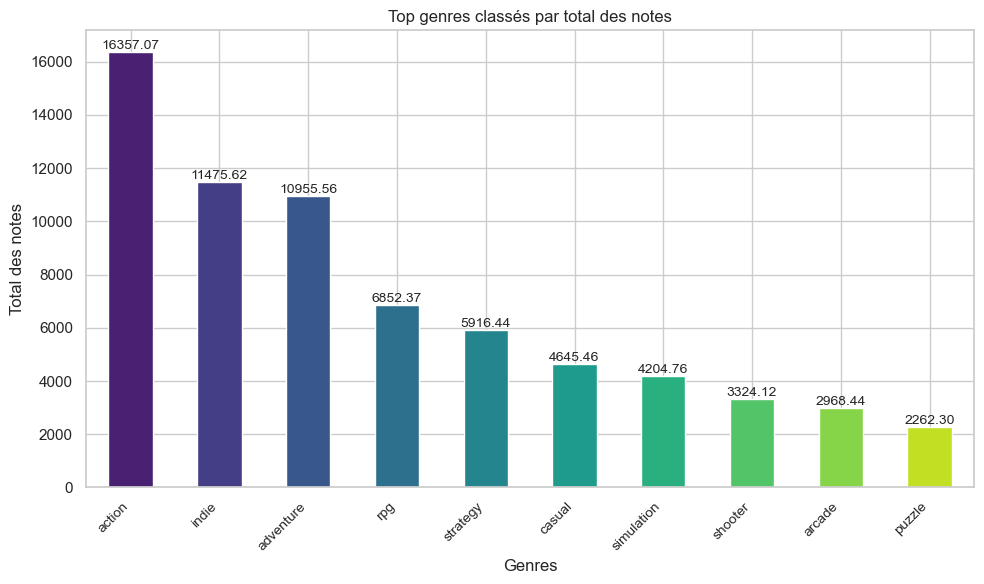

In [384]:
# Top genres classés par total des notes
# --------------------------------------------------------
# Top genres classés par total des notes
# Étape 1 : Charger et prétraiter les données
# --------------------------------------------------------

# Diviser les genres combinés dans 'all_genres' en lignes distinctes
genres_exploded = df_All_publish['all_genres'].str.split(', ').explode()

# Conserver uniquement les colonnes pertinentes
df_genres_ratings = pd.DataFrame({
    'Genre': genres_exploded,
    'rating': df_All_publish.loc[genres_exploded.index, 'rating'],
    'ratings_count': df_All_publish.loc[genres_exploded.index, 'ratings_count']
})

# --------------------------------------------------------
# Étape 2 : Nettoyer les données
# --------------------------------------------------------

# Filtrer les données : Exclure les genres vides et les lignes où 'ratings_count' <= 0
df_genres_ratings = df_genres_ratings[
    (df_genres_ratings['Genre'].notnull()) &
    (df_genres_ratings['ratings_count'] > 0)
]

# --------------------------------------------------------
# Étape 3 : Calculer le total des notes par genre
# --------------------------------------------------------

# Calculer le total des notes par genre
genre_total_rating = df_genres_ratings.groupby('Genre')['rating'].sum().sort_values(ascending=False)

# Garder les 10 genres avec le plus grand total de notes
top_genres_total_rating = genre_total_rating.head(10)

# --------------------------------------------------------
# Étape 4 : Visualiser les résultats
# --------------------------------------------------------

# Palette de couleurs dégradée pour les genres
colors_genre_total_rating = sns.color_palette("viridis", len(top_genres_total_rating))

# Création du graphique pour les genres classés par total des notes
plt.figure(figsize=(10, 6))
ax = top_genres_total_rating.plot(
    kind='bar',
    color=colors_genre_total_rating,
    title='Top genres classés par total des notes'
)

# Ajouter des étiquettes de données
for i, value in enumerate(top_genres_total_rating):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Ajouter des labels et personnaliser le graphique
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Total des notes', fontsize=12)
ax.set_xticklabels(top_genres_total_rating.index, rotation=45, ha='right', fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()


Top genres par nombre de metacritic :
Action        177200.0
Adventure     116687.0
Indie         110592.0
RPG            71078.0
Strategy       65698.0
Simulation     42437.0
Shooter        39799.0
Casual         28831.0
Puzzle         22974.0
Arcade         20202.0
Name: metacritic, dtype: float64


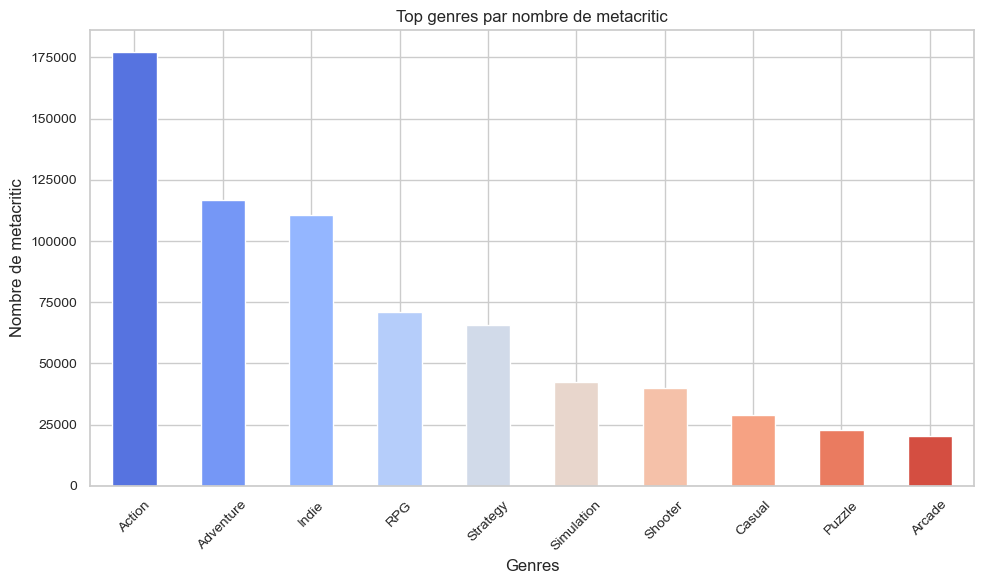

In [385]:
# Top genres par nombre de metacritic
# --------------------------------------------------------  
# Étape 1 : Combiner toutes les colonnes de genres en une seule série
# --------------------------------------------------------
# Objectif : Regrouper toutes les colonnes de genres en une seule série
genres_combined = pd.concat(
    [df_All_publish[col] for col in df_All_publish.columns if col.startswith('Genre')]
).dropna()

# --------------------------------------------------------
# Étape 2 : Calculer la somme des metacritics pour chaque genre
# --------------------------------------------------------
# Objectif : Obtenir la somme des metacritic pour tous les genres, même s'ils apparaissent dans plusieurs colonnes.
metacritic_sum = {}
for col in df_All_publish.columns:
    if col.startswith('Genre'):  # Vérification des colonnes commençant par 'Genre'
     metacritic_sum[col] = df_All_publish.groupby(col)['metacritic'].sum()

# Combiner les metacritics des genres à travers toutes les colonnes
total_metacritic = pd.concat(metacritic_sum.values(), axis=0).groupby(level=0).sum()

# --------------------------------------------------------
# Étape 3 : Trier les genres par le total des metacritic
# --------------------------------------------------------
# Objectif : Classer les genres en fonction du nombre total de metacritic
total_metacritic = total_metacritic.sort_values(ascending=False)

# Afficher les 10 genres avec le plus grand nombre de metacritics
print("Top genres par nombre de metacritic :")
print(total_metacritic.head(10))

# --------------------------------------------------------
# Étape 4 : Créer un graphique
# --------------------------------------------------------
# Objectif : Visualiser les genres avec le plus grand nombre de metacritic
total_metacritic_top = total_metacritic.head(10)

# Palette de couleurs pour les genres
colors = sns.color_palette("coolwarm", len(total_metacritic_top))

# Création du graphique
plt.figure(figsize=(10, 6))
ax = total_metacritic_top.plot(
    kind='bar',
    color=colors,
    title='Top genres par nombre de metacritic'
)

# Ajouter les labels et personnalisation
ax.set_xlabel("Genres", fontsize=12)
ax.set_ylabel("Nombre de metacritic", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Ajouter les étiquettes de données sur les barres
#for index, value in enumerate(genre_total_metacritic.head(10)):
  #  plt.text(index, value, f'{int(value)}', ha='center', va='bottom', fontsize=9)


# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


Top genres par nombre de suggestions :
Action        11360320
Adventure      8947311
Indie          6465367
RPG            4610100
Simulation     4554252
Strategy       4393021
Casual         4136414
Puzzle         3514227
Shooter        2578224
Platformer     2523141
Name: suggestions_count, dtype: int32


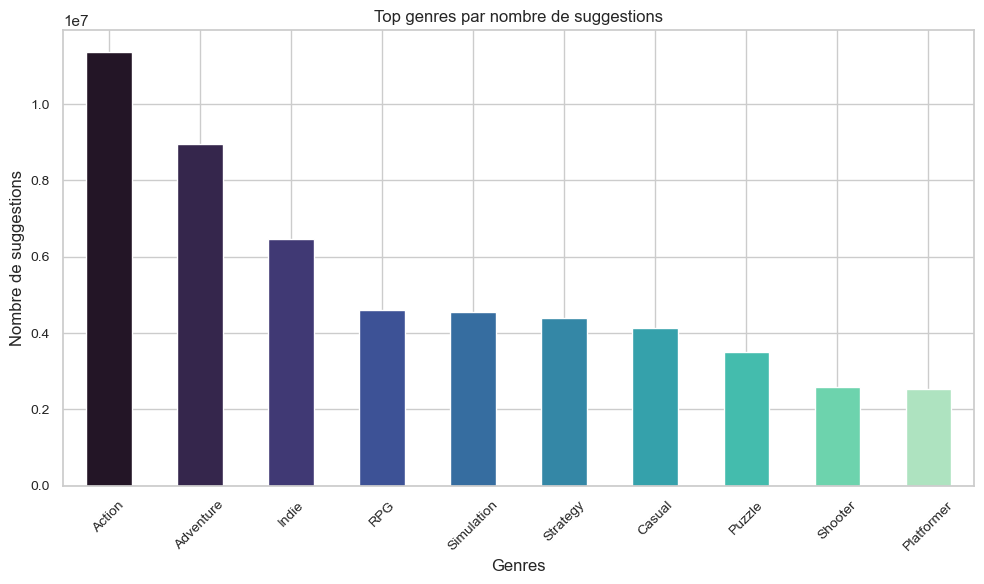

In [386]:
# --------------------------------------------------------
# Top genres par nombre de suggestions 
# --------------------------------------------------------

# Étape 1 : Combiner toutes les colonnes de genres en une seule série
genres_combined = pd.concat(
    [df_All_publish[col] for col in df_All_publish.columns if col.startswith('Genre')]
).dropna()

# (Optionnel) Filtrer dès maintenant la série combinée pour exclure "Non spécifié"
genres_combined = genres_combined[genres_combined != "Non spécifié"]

# --------------------------------------------------------
# Étape 2 : Calculer la somme des suggestions pour chaque genre
# --------------------------------------------------------
suggestions_sum = {}
for col in df_All_publish.columns:
    if col.startswith('Genre'):  # On ne prend en compte que les colonnes de genre
        # Filtrer les lignes où le genre n'est pas "Non spécifié"
        df_temp = df_All_publish[df_All_publish[col] != "Non spécifié"]
        suggestions_sum[col] = df_temp.groupby(col)['suggestions_count'].sum()

# Combiner les suggestions des genres sur toutes les colonnes
total_suggestions = pd.concat(suggestions_sum.values(), axis=0).groupby(level=0).sum()

# Exclure "Non spécifié" au cas où il serait présent
total_suggestions = total_suggestions.drop("Non spécifié", errors='ignore')

# --------------------------------------------------------
# Étape 3 : Trier les genres par le total des suggestions
# --------------------------------------------------------
total_suggestions = total_suggestions.sort_values(ascending=False)

# Afficher les 10 genres avec le plus grand nombre de suggestions
print("Top genres par nombre de suggestions :")
print(total_suggestions.head(10))

# --------------------------------------------------------
# Étape 4 : Créer un graphique
# --------------------------------------------------------
# Sélectionner les 10 genres les plus suggérés
total_suggestions_top = total_suggestions.head(10)

# Palette de couleurs pour les genres
colors = sns.color_palette("mako", len(total_suggestions_top))

# Création du graphique en barres
plt.figure(figsize=(10, 6))
ax = total_suggestions_top.plot(
    kind='bar',
    color=colors,
    title='Top genres par nombre de suggestions'
)

# Personnalisation des axes et du graphique
ax.set_xlabel("Genres", fontsize=12)
ax.set_ylabel("Nombre de suggestions", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()


#### Analyse des tendances historiques

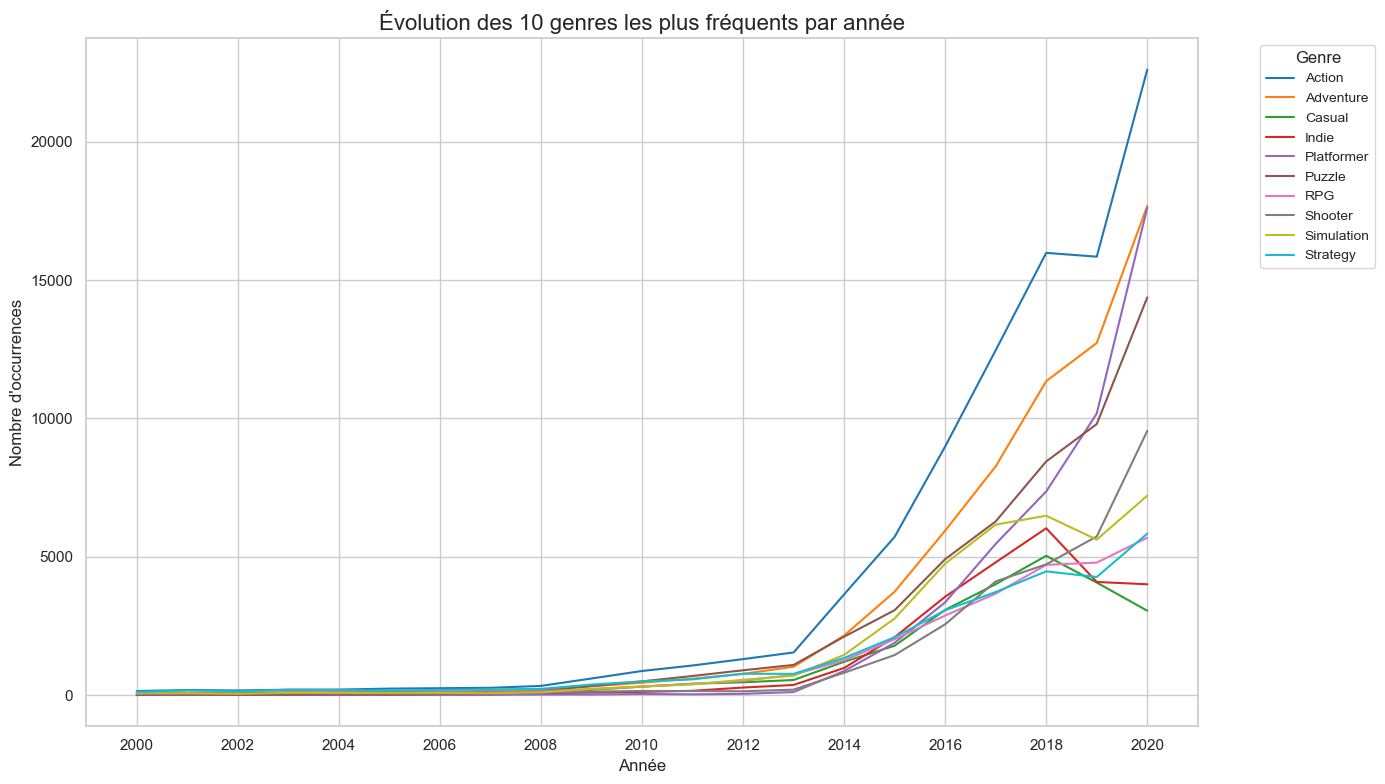

In [387]:
# --------------------------------------------------------
# Évolution des 10 genres les plus fréquents par année 
# 1. Concaténer les colonnes des genres avec 'Annee'
# --------------------------------------------------------
# Transformer toutes les colonnes 'Genre_1', 'Genre_2', ..., 'Genre_19' en une seule colonne
df_genres = pd.melt(
    df_All_publish, 
    id_vars=['Annee'],  # Garder la colonne 'Annee'
    value_vars=[f'Genre_{i}' for i in range(1, 20)],  # Inclure les colonnes Genre_1 à Genre_19
    var_name='all_genres', 
    value_name='Genre'
)

# Filtrer les données : Exclure les valeurs nulles, les genres vides et "Non spécifié"
df_genres = df_genres.dropna(subset=['Genre'])
df_genres = df_genres[df_genres['Genre'] != '']
df_genres = df_genres[df_genres['Genre'] != "Non spécifié"]

# --------------------------------------------------------
# 2. Calculer les occurrences totales par genre
# --------------------------------------------------------
# Compter le nombre total d'occurrences pour chaque genre
genre_counts = df_genres['Genre'].value_counts()

# Sélectionner les 10 genres les plus fréquents
top_10_genres = genre_counts.head(10).index

# Filtrer uniquement les genres appartenant aux 10 plus fréquents
df_genres = df_genres[df_genres['Genre'].isin(top_10_genres)]

# --------------------------------------------------------
# 3. Calculer les occurrences par année et par genre
# --------------------------------------------------------
# GroupBy pour compter les occurrences par année et par genre
nb_of_occurrences = df_genres.groupby(['Annee', 'Genre']).size().unstack(fill_value=0)

# --------------------------------------------------------
# 4. Tracer le graphique pour les 10 genres les plus fréquents
# --------------------------------------------------------
plt.figure(figsize=(14, 8))

# Couleurs pour les genres (tab10 fournit une palette adaptée pour 10 catégories)
colors = plt.cm.tab10.colors

# Tracer chaque genre avec une courbe différente
for i, genre in enumerate(nb_of_occurrences.columns):
    plt.plot(nb_of_occurrences.index, nb_of_occurrences[genre], label=genre, color=colors[i % len(colors)])

# Ajouter les labels et la légende
plt.title("Évolution des 10 genres les plus fréquents par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)

# Ajuster les ticks pour l'axe des années (X)
plt.xticks(ticks=np.arange(nb_of_occurrences.index.min(), nb_of_occurrences.index.max() + 1, 2))

# Ajuster l'affichage
plt.tight_layout()

# Afficher le graphique
plt.show()


Les genres varient, mais les jeux d'action et d'aventure dominent le marché du jeu vidéo, mettant en évidence une préférence générale pour les jeux alliant narration et exploration. Ces jeux sont largement appréciés, et leurs genres offrent une variété d'expériences qui attirent un large éventail de joueurs.

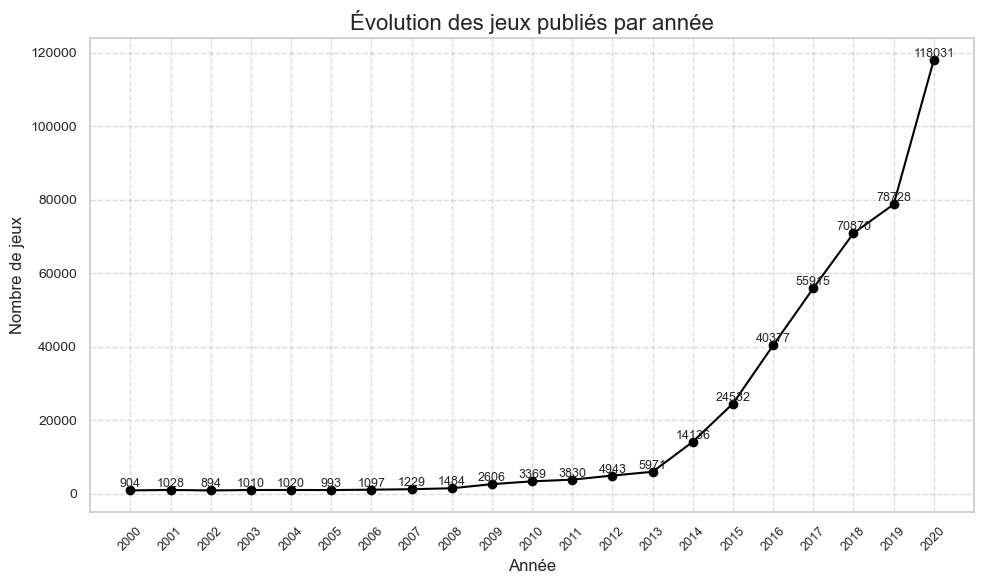

In [388]:
# --------------------------------------------------------
# Évolution des jeux publiés par année
# Étape 1 : Compter le nombre de jeux publiés par année
# --------------------------------------------------------
# Compter les occurrences des années dans la colonne 'Annee'
games_by_year = df_All_publish['Annee'].value_counts().sort_index()

# --------------------------------------------------------
# Étape 2 : Création du graphique linéaire
# --------------------------------------------------------
plt.figure(figsize=(10, 6))

# Tracer un graphique en ligne
plt.plot(games_by_year.index, games_by_year.values, marker='o', color='black', linestyle='-', label='Nombre de jeux')

# --------------------------------------------------------
# Étape 3 : Ajouter les étiquettes de données
# --------------------------------------------------------
for x, y in zip(games_by_year.index, games_by_year.values):
    plt.text(x, y, str(y), fontsize=9, ha='center', va='bottom')

# --------------------------------------------------------
# Étape 4 : Personnalisation du graphique
# --------------------------------------------------------
plt.title("Évolution des jeux publiés par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de jeux", fontsize=12)

# Ajuster les ticks de l'axe X
plt.xticks(ticks=games_by_year.index, rotation=45, fontsize=9)
plt.yticks(fontsize=10)

# Ajouter une grille pour une meilleure lisibilité
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()


Le graphique illustre clairement l'évolution rapide de l'industrie du jeu vidéo au cours des deux dernières décennies. Les avancées technologiques, l'essor des jeux mobiles, la démocratisation des outils de développement, et la montée en puissance des plateformes numériques ont largement contribué à cette explosion du nombre de jeux publiés chaque année.
En 2020, on observe le résultat de cette évolution rapide, où le nombre de jeux publiés est bien plus élevé qu'au début du millénaire. La tendance devrait continuer à croître avec les nouvelles technologies comme la réalité virtuelle (VR), la réalité augmentée (AR) et les jeux sur cloud.
Ce graphique met en lumière l'essor spectaculaire de l'industrie du jeu vidéo dans la dernière décennie et la diversification de l'offre de jeux disponibles à travers différents dispositifs et plateformes.

## Analyse des tendances des jeux vidéo entre 2014 et 2022

### Analyse de genres à partir de 2014

In [389]:
# --------------------------------------------------------
# Étape 1 : Filtrer les lignes avec une condition sur la colonne 'Annee'
# --------------------------------------------------------
# Filtrer uniquement les jeux publiés en 2014 ou après
df_14 = df_All_publish[df_All_publish['Annee'] >= 2014]

# --------------------------------------------------------
# Étape 2 : Afficher les informations sur le DataFrame filtré
# --------------------------------------------------------
df_14.info()


<class 'pandas.core.frame.DataFrame'>
Index: 402589 entries, 0 to 432966
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  402589 non-null  int64         
 1   slug                402576 non-null  object        
 2   name                402589 non-null  object        
 3   metacritic          402589 non-null  float64       
 4   released            402589 non-null  datetime64[ns]
 5   Annee               402589 non-null  int64         
 6   reviews_count       402589 non-null  int32         
 7   suggestions_count   402589 non-null  int32         
 8   rating              402589 non-null  float64       
 9   ratings_count       402589 non-null  int32         
 10  developers          402589 non-null  object        
 11  publishers          402589 non-null  object        
 12  genres              402589 non-null  object        
 13  platforms           402589 non-nul

In [390]:
# --------------------------------------------------------
# Étape 1 : Suppression des colonnes vides
# --------------------------------------------------------
# Supprimer les colonnes 'Genre_12' à 'Genre_19' du DataFrame
df_14 = df_14.drop(columns=['Genre_12', 'Genre_13', 'Genre_14', 
                            'Genre_15', 'Genre_16', 'Genre_17', 
                            'Genre_18', 'Genre_19'])

# --------------------------------------------------------
# Étape 2 : Vérification des colonnes restantes
# --------------------------------------------------------
# Afficher les colonnes restantes pour vérifier la suppression
print("Colonnes restantes dans df_14 :")
print(df_14.columns)


Colonnes restantes dans df_14 :
Index(['id', 'slug', 'name', 'metacritic', 'released', 'Annee',
       'reviews_count', 'suggestions_count', 'rating', 'ratings_count',
       'developers', 'publishers', 'genres', 'platforms', 'PC', 'macOS', 'iOS',
       'Web', 'Linux', 'Xbox One', 'Android', 'PS Vita', 'PlayStation 4',
       'Nintendo Switch', 'PlayStation 2', 'Wii U', 'PlayStation 3', 'Xbox 36',
       'GameCube', 'Wii', 'Xbox', 'Genesis', 'Neo Geo', 'Nintendo 3DS',
       'PlayStation', 'PSP', 'Nintendo DS', 'Game Boy Advance',
       'Game Boy Color', 'Game Boy', 'Nintendo DSi', 'SNES',
       'SEGA Master System', 'Nintendo 64', 'Classic Macintosh', 'Apple II',
       'NES', 'Dreamcast', 'PlayStation 5', 'Xbox Series S/X',
       'Commodore / Amiga', 'Atari 26', 'Atari ST', 'Atari 78', 'SEGA Saturn',
       'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6',
       'Genre_7', 'Genre_8', 'Genre_9', 'Genre_10', 'Genre_11', 'all_genres'],
      dtype='object')


##### Top genres les plus fréquents

Top 10 des genres les plus fréquents :
all_genres
action        85260
adventure     61864
puzzle        48997
platformer    46743
simulation    34456
shooter       28946
indie         25566
rpg           25018
strategy      24815
casual        22242
Name: count, dtype: int64


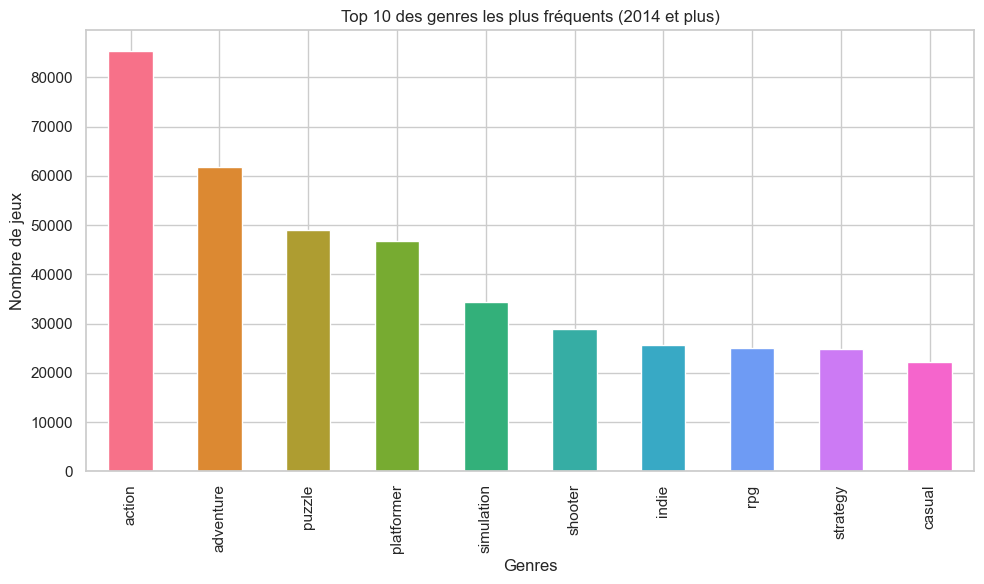

In [391]:
#--------------------------------------------------------
# Top 10 des genres les plus fréquents 
#--------------------------------------------------------
# 1. Transformer la colonne 'all_genres' en une seule colonne en "explosant" les genres
genres_exploded = df_14['all_genres'].str.split(', ').explode()

# Exclure le genre "non spécifié"
genres_exploded = genres_exploded[genres_exploded.str.lower() != 'non spécifié']

#--------------------------------------------------------
# 2. Compter les occurrences de chaque genre
#--------------------------------------------------------
genre_counts = genres_exploded.value_counts()

# Afficher les 10 genres les plus fréquents
print("Top 10 des genres les plus fréquents :")
print(genre_counts.head(10))

#--------------------------------------------------------
# 3. Création du graphique pour les genres les plus fréquents
#--------------------------------------------------------
# Palette de couleurs dégradée
colors_genres = sns.color_palette("husl", len(genre_counts.head(10)))

# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(
    kind='bar', 
    color=colors_genres, 
    title='Top 10 des genres les plus fréquents (2014 et plus)'
)

# Ajouter les labels
plt.xlabel('Genres')
plt.ylabel('Nombre de jeux')

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()


##### Les genres avec les meilleurs scores Metacritic

Top genres par nombre de metacritic :
Action        91460.0
Indie         79372.0
Adventure     73222.0
RPG           39974.0
Strategy      32320.0
Simulation    26552.0
Casual        16975.0
Shooter       14651.0
Puzzle        13086.0
Sports        10202.0
Name: metacritic, dtype: float64


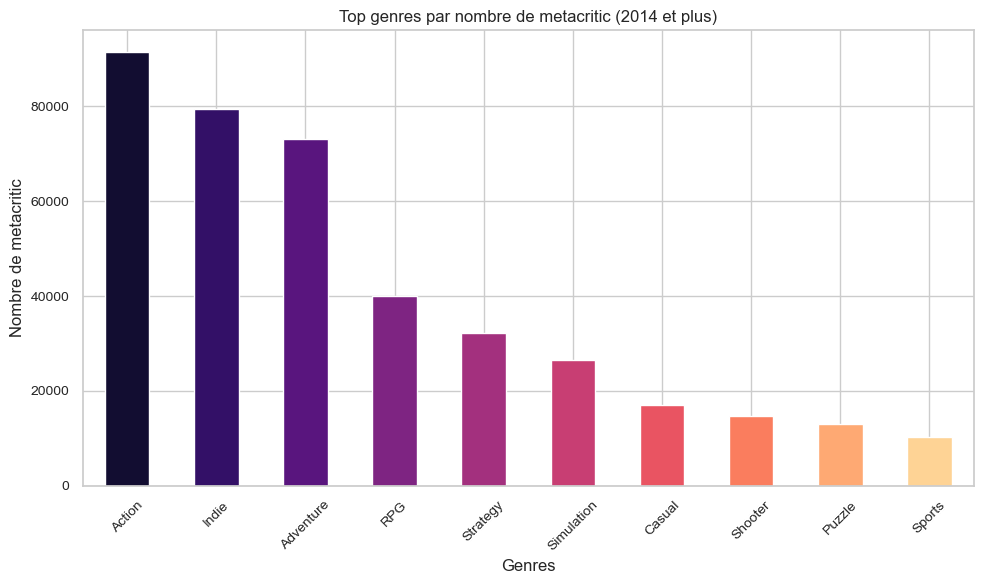

In [392]:
# # Top genres par nombre de metacritic (2014 et plus)
# --------------------------------------------------------
# Étape 1 : Combiner toutes les colonnes de genres en une seule série
# --------------------------------------------------------
# Objectif : Regrouper toutes les colonnes de genres en une seule série
genres_combined = pd.concat(
    [df_14[col] for col in df_14.columns if col.startswith('Genre')]
).dropna()

# --------------------------------------------------------
# Étape 2 : Calculer la somme des metacritics pour chaque genre
# --------------------------------------------------------
# Objectif : Obtenir la somme des metacritics pour tous les genres, même s'ils apparaissent dans plusieurs colonnes.
metacritic_sum = {}
for col in df_14.columns:
    if col.startswith('Genre'):  # Vérification des colonnes commençant par 'Genre'
     metacritic_sum[col] = df_14.groupby(col)['metacritic'].sum()

# Combiner les metacritics des genres à travers toutes les colonnes
total_metacritic = pd.concat(metacritic_sum.values(), axis=0).groupby(level=0).sum()

# --------------------------------------------------------
# Étape 3 : Trier les genres par le total des metacritics
# --------------------------------------------------------
# Objectif : Classer les genres en fonction du nombre total de metacritic
total_metacritic = total_metacritic.sort_values(ascending=False)

# Afficher les 10 genres avec le plus grand nombre de metacritic
print("Top genres par nombre de metacritic :")
print(total_metacritic.head(10))

# --------------------------------------------------------
# Étape 4 : Créer un graphique
# --------------------------------------------------------
# Objectif : Visualiser les genres avec le plus grand nombre de metacritic
total_metacritic_top = total_metacritic.head(10)

# Palette de couleurs pour les genres
colors = sns.color_palette("magma", len(total_metacritic_top))

# Création du graphique
plt.figure(figsize=(10, 6))
ax = total_metacritic_top.plot(
    kind='bar',
    color=colors,
    title='Top genres par nombre de metacritic (2014 et plus)'
)

# Ajouter les labels et personnalisation
ax.set_xlabel("Genres", fontsize=12)
ax.set_ylabel("Nombre de metacritic", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Ajouter les étiquettes de données sur les barres
#for index, value in enumerate(genre_total_metacritic.head(10)):
  #  plt.text(index, value, f'{int(value)}', ha='center', va='bottom', fontsize=9)


# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


#### Analyse des genres en fonction du total de suggestions

Top genres par nombre de suggestions :
Action        9243296
Adventure     7752418
Indie         6058817
Simulation    3931619
Casual        3723628
RPG           3704040
Strategy      3168847
Puzzle        2967660
Platformer    2399891
Shooter       1958538
Name: suggestions_count, dtype: int32


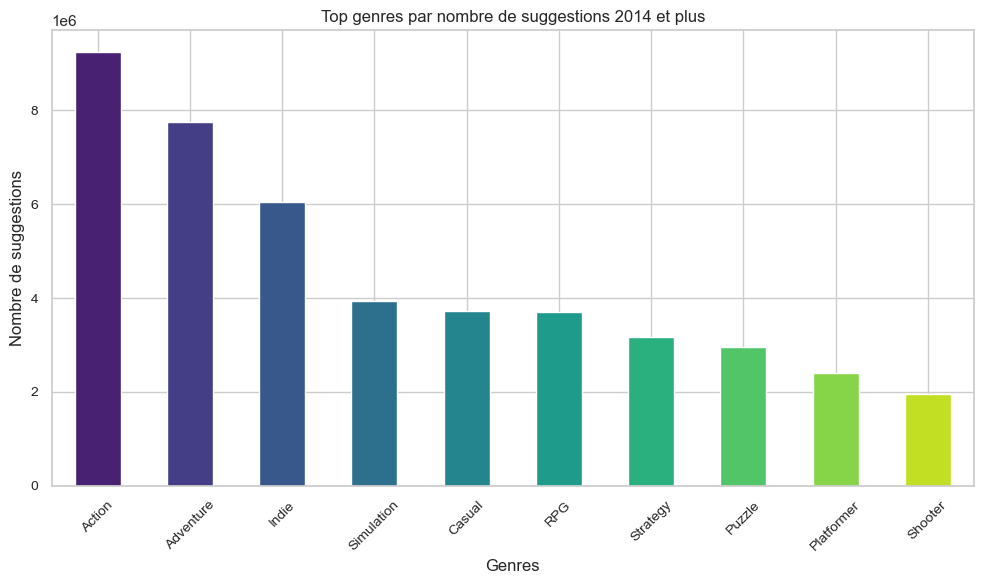

In [393]:
# --------------------------------------------------------
# Top genres par nombre de suggestions 
# --------------------------------------------------------

# Étape 1 : Combiner toutes les colonnes de genres en une seule série
# --------------------------------------------------------
# Objectif : Regrouper toutes les colonnes de genres en une seule série, en excluant "Non spécifié"
genres_combined = pd.concat(
    [df_14[col] for col in df_14.columns if col.startswith('Genre')]
).dropna()

# Filtrer "Non spécifié" de la série combinée
genres_combined = genres_combined[genres_combined != "Non spécifié"]

# --------------------------------------------------------
# Étape 2 : Calculer la somme des suggestions pour chaque genre
# --------------------------------------------------------
# Objectif : Obtenir la somme des suggestions pour tous les genres, même s'ils apparaissent dans plusieurs colonnes,
# en excluant "Non spécifié"
suggestions_sum = {}
for col in df_14.columns:
    if col.startswith('Genre'):
        # Filtrer les lignes où le genre n'est pas "Non spécifié"
        df_temp = df_14[df_14[col] != "Non spécifié"]
        suggestions_sum[col] = df_temp.groupby(col)['suggestions_count'].sum()

# Combiner les suggestions des genres à travers toutes les colonnes
total_suggestions = pd.concat(suggestions_sum.values(), axis=0).groupby(level=0).sum()

# S'assurer que "Non spécifié" n'est pas présent
total_suggestions = total_suggestions.drop("Non spécifié", errors='ignore')

# --------------------------------------------------------
# Étape 3 : Trier les genres par le total des suggestions
# --------------------------------------------------------
total_suggestions = total_suggestions.sort_values(ascending=False)

# Afficher les 10 genres avec le plus grand nombre de suggestions
print("Top genres par nombre de suggestions :")
print(total_suggestions.head(10))

# --------------------------------------------------------
# Étape 4 : Créer un graphique
# --------------------------------------------------------
# Objectif : Visualiser les genres avec le plus grand nombre de suggestions
total_suggestions_top = total_suggestions.head(10)

# Palette de couleurs pour les genres
colors = sns.color_palette("viridis", len(total_suggestions_top))

# Création du graphique
plt.figure(figsize=(10, 6))
ax = total_suggestions_top.plot(
    kind='bar',
    color=colors,
    title='Top genres par nombre de suggestions 2014 et plus'
)

# Ajouter les labels et personnalisation
ax.set_xlabel("Genres", fontsize=12)
ax.set_ylabel("Nombre de suggestions", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


#####  Classement des genres par notes

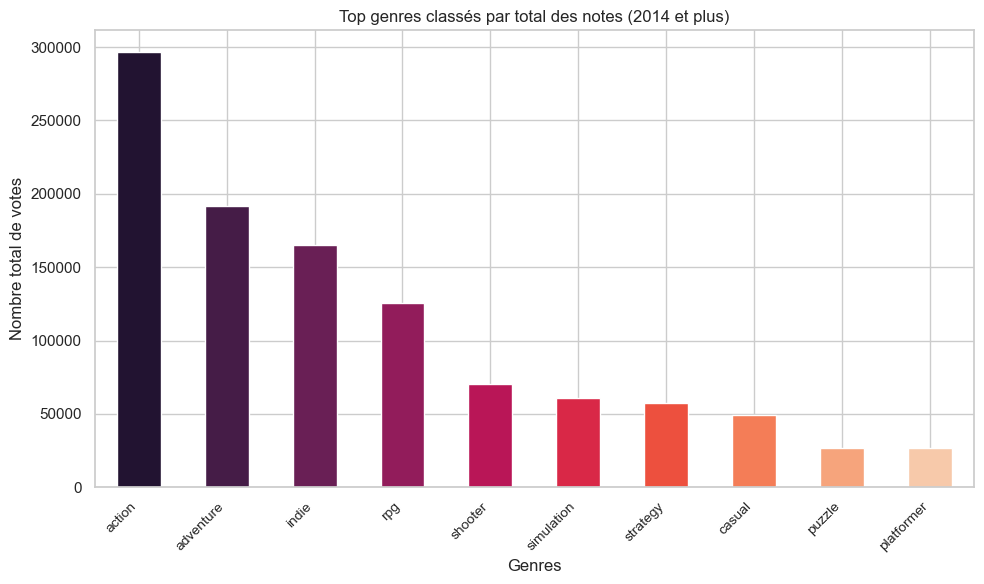

In [394]:
# Top genres classés par notes
#--------------------------------------------------------
# Étape 1 : Charger et prétraiter les données
#--------------------------------------------------------

# Diviser les genres combinés dans 'all_genres' en lignes distinctes
genres_exploded = df_14['all_genres'].str.split(', ').explode()

# Conserver uniquement les colonnes pertinentes
df_genres_ratings = pd.DataFrame({
    'Genre': genres_exploded,
    'rating': df_14.loc[genres_exploded.index, 'rating'],
    'ratings_count': df_14.loc[genres_exploded.index, 'ratings_count']
})

#--------------------------------------------------------
# Étape 2 : Nettoyer les données
#--------------------------------------------------------

# Filtrer les données : Exclure les genres vides et les lignes où 'ratings_count' <= 0
df_genres_ratings = df_genres_ratings[
    (df_genres_ratings['Genre'].notnull()) &
    (df_genres_ratings['ratings_count'] > 0)
]

#--------------------------------------------------------
# Étape 3 : Classer les genres par popularité (nombre total de votes)
#--------------------------------------------------------

# Calculer le nombre total de votes (ratings_count) par genre
genre_total_votes = df_genres_ratings.groupby('Genre')['ratings_count'].sum().sort_values(ascending=False)

# Garder les 10 genres les plus populaires
top_genres_votes = genre_total_votes.head(10)

#--------------------------------------------------------
# Étape 4 : Visualiser les résultats
#--------------------------------------------------------

# Palette de couleurs dégradée pour les genres
colors_genre_votes = sns.color_palette("rocket", len(top_genres_votes))

# Création du graphique pour les genres classés par popularité
plt.figure(figsize=(10, 6))
ax = top_genres_votes.plot(
    kind='bar',
    color=colors_genre_votes,
    title='Top genres classés par total des notes (2014 et plus)'
)

# Ajouter des étiquettes de données
#for i, value in enumerate(top_genres_votes):
    #plt.text(i, value, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Ajouter des labels et personnaliser le graphique
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Nombre total de votes', fontsize=12)
ax.set_xticklabels(top_genres_votes.index, rotation=45, ha='right', fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()


🎯 Top 10 jeux par total des notes :

🎮 Kara no Shojo — Total des notes : 4.83
🎮 Persona 5 Royal — Total des notes : 4.81
🎮 Shovel Knight: Shovel of Hope — Total des notes : 4.78
🎮 The Witcher 3: Game of the Year — Total des notes : 4.77
🎮 METAL GEAR SOLID V: THE DEFINITIVE EXPERIENCE — Total des notes : 4.75
🎮 Cataclysm: Dark Days Ahead — Total des notes : 4.75
🎮 The Witcher 3: Wild Hunt - Blood and Wine — Total des notes : 4.75
🎮 The Witcher 3: Wild Hunt - Hearts of Stone — Total des notes : 4.74
🎮 Yakuza: Like a Dragon — Total des notes : 4.73
🎮 Harvest Moon: Friends of Mineral Town — Total des notes : 4.71


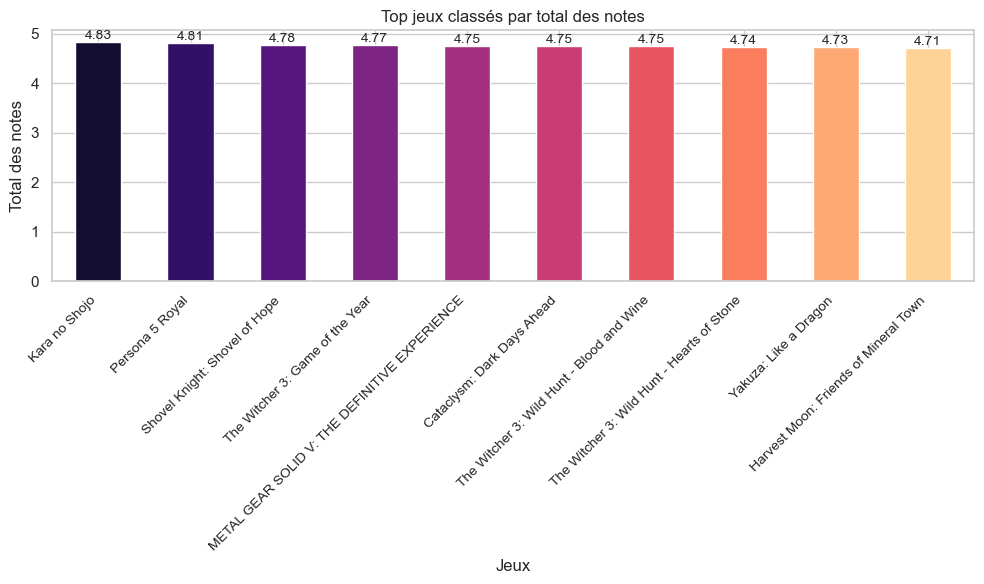

In [395]:
# Top jeux classés par total des notes
# --------------------------------------------------------
# Étape 1 : Charger et prétraiter les données
# --------------------------------------------------------

# Garder uniquement les colonnes pertinentes
df_games_ratings = df_14[['name', 'rating', 'ratings_count']].copy()

# Convertir les notes en valeurs numériques
df_games_ratings.loc[:, 'rating'] = pd.to_numeric(df_games_ratings['rating'], errors='coerce')

# Supprimer les lignes invalides
df_games_ratings = df_games_ratings[
    (df_games_ratings['name'].apply(lambda x: isinstance(x, str))) &
    (df_games_ratings['name'].notnull()) &
    (df_games_ratings['ratings_count'] > 0) &
    (df_games_ratings['rating'].notna())
]

# --------------------------------------------------------
# Étape 2 : Calculer le total des notes par jeu
# --------------------------------------------------------

# Regrouper par nom de jeu et calculer la somme des notes
game_total_rating = df_games_ratings.groupby('name')['rating'].sum().sort_values(ascending=False)

# Garder les 10 jeux les mieux notés (somme des notes)
top_games_total_rating = game_total_rating.head(10)

# --------------------------------------------------------
# Étape 3 : Afficher les résultats textuellement
# --------------------------------------------------------

print("🎯 Top 10 jeux par total des notes :\n")
for game, total in top_games_total_rating.items():
    print(f"🎮 {game} — Total des notes : {total:.2f}")

# --------------------------------------------------------
# Étape 4 : Visualiser les résultats
# --------------------------------------------------------

# Palette de couleurs dégradée
colors_game_total_rating = sns.color_palette("magma", len(top_games_total_rating))

# Création du graphique
plt.figure(figsize=(10, 6))
ax = top_games_total_rating.plot(
    kind='bar',
    color=colors_game_total_rating,
    title='Top jeux classés par total des notes'
)

# Ajouter les valeurs au-dessus des barres
for i, value in enumerate(top_games_total_rating):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Personnalisation du graphique
ax.set_xlabel('Jeux', fontsize=12)
ax.set_ylabel('Total des notes', fontsize=12)
ax.set_xticklabels(top_games_total_rating.index, rotation=45, ha='right', fontsize=10)

# Affichage final
plt.tight_layout()
plt.show()


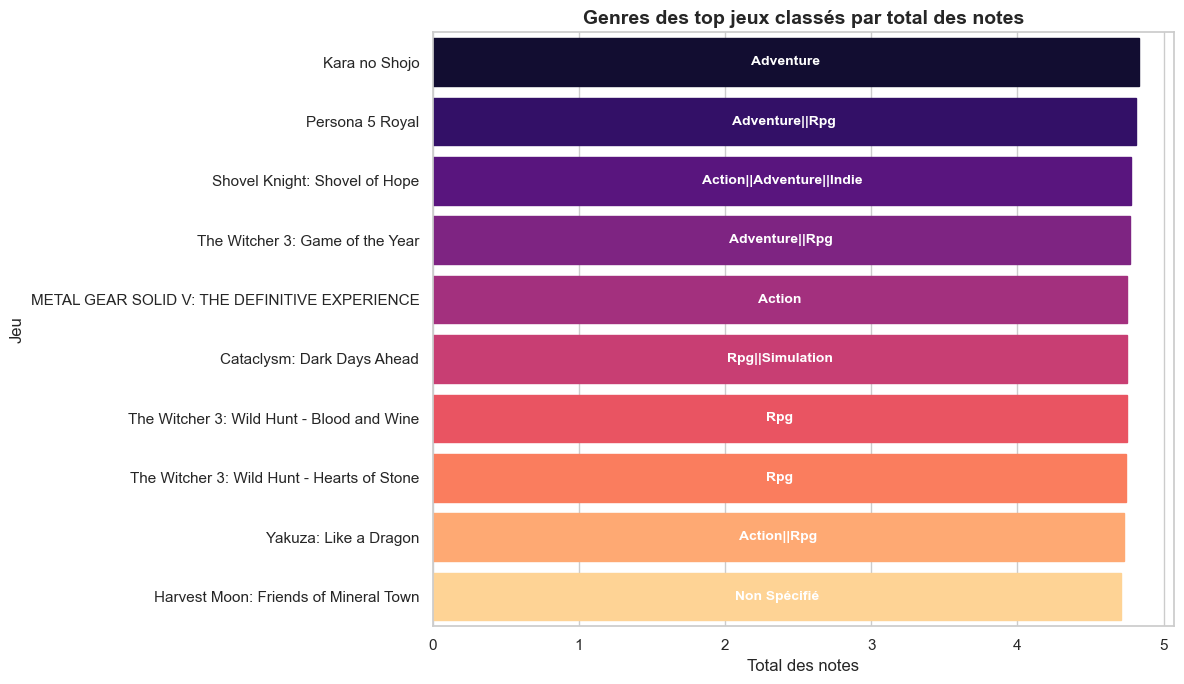

In [396]:
# Genres des top 10 jeux classés par total des notes
# --------------------------------------------------------
# 1. Préparation des données (à partir de df_14)
# --------------------------------------------------------

# Sélection des colonnes nécessaires
df_games_ratings = df_14[['name', 'rating', 'ratings_count', 'genres']].copy()

# Conversion des notes en numérique
df_games_ratings['rating'] = pd.to_numeric(df_games_ratings['rating'], errors='coerce')

# Nettoyage des lignes invalides
df_games_ratings = df_games_ratings[
    (df_games_ratings['name'].apply(lambda x: isinstance(x, str))) &
    (df_games_ratings['name'].notnull()) &
    (df_games_ratings['ratings_count'] > 0) &
    (df_games_ratings['rating'].notna())
]

# --------------------------------------------------------
# 2. Nettoyage et fusion des genres
# --------------------------------------------------------

# Séparer les genres dans plusieurs colonnes
df_split_genres = df_games_ratings['genres'].str.split(',', expand=True)

# Nettoyer chaque genre (majuscules et suppression d'espaces)
for col in df_split_genres.columns:
    df_split_genres[col] = df_split_genres[col].str.title().str.strip()

# Fusionner en une seule chaîne séparée par '||'
df_games_ratings['all_genres'] = df_split_genres.apply(lambda row: '||'.join(row.dropna().unique()), axis=1)

# --------------------------------------------------------
# 3. Sélection du Top 10 des jeux par total de notes
# --------------------------------------------------------

# Agréger les notes par nom de jeu
total_ratings = df_games_ratings.groupby('name')['rating'].sum().sort_values(ascending=False)

# Sélection des 10 premiers jeux
top_10_names = total_ratings.head(10).index

# Extraire les lignes correspondantes
top_10_df = df_games_ratings[df_games_ratings['name'].isin(top_10_names)].drop_duplicates(subset='name')

# Ajouter la colonne 'total_rating'
top_10_df['total_rating'] = top_10_df['name'].map(total_ratings)

# Tri décroissant
top_10_df = top_10_df.sort_values('total_rating', ascending=False)

# --------------------------------------------------------
# 4. Visualisation : Barplot horizontal avec genres centrés
# --------------------------------------------------------

def plot_top_games_with_genres(df):
    """Affiche un barplot horizontal des meilleurs jeux avec leurs genres centrés dans les barres."""

    # Initialisation du style
    plt.figure(figsize=(12, 7))
    sns.set(style="whitegrid")

    # Palette de couleurs
    colors = sns.color_palette("magma", len(df))

    # Barplot horizontal
    barplot = sns.barplot(
        x='total_rating',
        y='name',
        data=df,
        dodge=False
    )

    # Application des couleurs manuellement
    for patch, color in zip(barplot.patches, colors):
        patch.set_color(color)

    # Affichage des genres centrés dans les barres
    for i, (value, genre) in enumerate(zip(df['total_rating'], df['all_genres'])):
        barplot.text(
            value / 2, i,
            genre,
            ha='center',
            va='center',
            fontsize=10,
            color='white',
            fontweight='bold'
        )

    # Personnalisation du graphique
    plt.title("Genres des top jeux classés par total des notes", fontsize=14, fontweight='bold')
    plt.xlabel("Total des notes", fontsize=12)
    plt.ylabel("Jeu", fontsize=12)

    plt.tight_layout()
    plt.show()

# --------------------------------------------------------
# 5. Lancement de la visualisation
# --------------------------------------------------------

plot_top_games_with_genres(top_10_df)


### L'évolution des genres

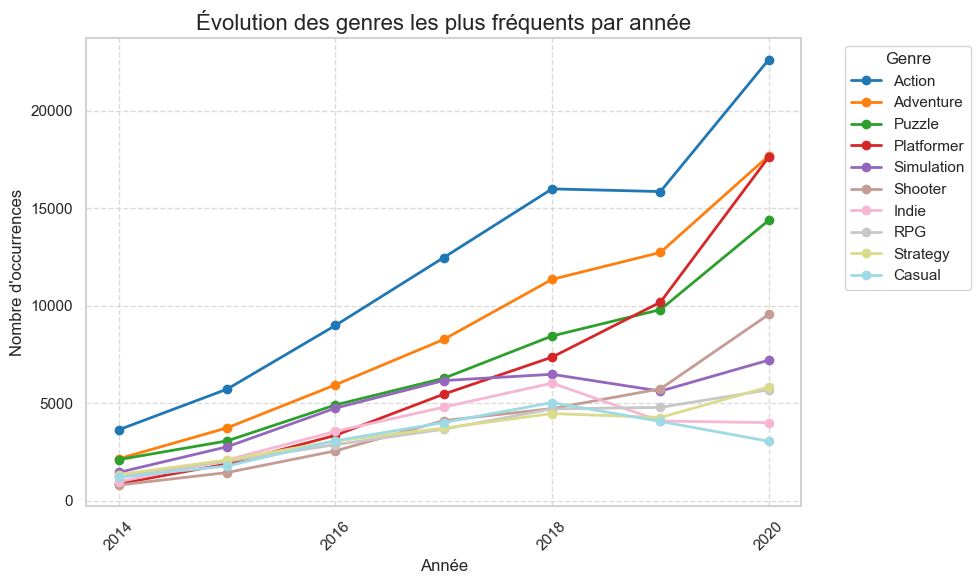

In [397]:
# Évolution des genres les plus fréquents par année
# --------------------------------------------------------
# Étape 1 : Concaténer toutes les colonnes de genres avec l'année
# --------------------------------------------------------
# Objectif : Combiner toutes les colonnes de genres (Genre_1, Genre_2, etc.) en une seule structure exploitable avec l'année.
genre_columns = [col for col in df_14.columns if col.startswith('Genre')]
df_concat = pd.melt(
    df_14, 
    id_vars=['Annee'], 
    value_vars=genre_columns, 
    var_name='all_genres', 
    value_name='Genre'
).dropna(subset=['Genre'])

# Exclure le genre "Non spécifié"
df_concat = df_concat[df_concat['Genre'] != "Non spécifié"]

# --------------------------------------------------------
# Étape 2 : Groupby sur 'Annee' et 'Genre' pour compter les occurrences
# --------------------------------------------------------
# Objectif : Compter combien de fois chaque genre apparaît chaque année.
nb_occurrences = df_concat.groupby(['Annee', 'Genre']).size().unstack(fill_value=0)

# --------------------------------------------------------
# Étape 3 : Filtrer les genres les plus fréquents
# --------------------------------------------------------
# Objectif : Sélectionner les 10 genres les plus fréquents sur toutes les années.
top_genres = nb_occurrences.sum().sort_values(ascending=False).head(10).index
occurrences_top_genres = nb_occurrences[top_genres]

# --------------------------------------------------------
# Étape 4 : Tracer le graphique en courbe
# --------------------------------------------------------
# Objectif : Visualiser l'évolution des occurrences des genres les plus fréquents par année.
plt.figure(figsize=(10, 6))

# Générer une liste de couleurs contrastées automatiquement
colors = plt.cm.tab20(np.linspace(0, 1, len(top_genres)))

# Tracer chaque genre avec une courbe différente
for i, genre in enumerate(occurrences_top_genres.columns):
    plt.plot(
        occurrences_top_genres.index, 
        occurrences_top_genres[genre], 
        label=genre, 
        color=colors[i], 
        linewidth=2, 
        marker='o'
    )

# --------------------------------------------------------
# Étape 5 : Ajouter les labels et la légende
# --------------------------------------------------------
# Objectif : Ajouter des informations claires pour interpréter le graphique.
plt.title("Évolution des genres les plus fréquents par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajuster les ticks pour l'axe des années
plt.xticks(
    ticks=np.arange(
        occurrences_top_genres.index.min(), 
        occurrences_top_genres.index.max() + 1, 
        2
    ), 
    rotation=45
)

# --------------------------------------------------------
# Étape 6 : Afficher le graphique
# --------------------------------------------------------
# Objectif : Rendre le graphique propre et lisible.
plt.tight_layout()
plt.show()


## Analyse des préférences des joueurs sur les consoles actuelles

In [398]:
# --------------------------------------------------------
# Étape 1 : Définir la liste des consoles récentes
# --------------------------------------------------------
# Objectif : Regrouper les consoles des générations récentes dans une liste pour une utilisation ultérieure.
consoles_récentes = ["PlayStation 4", "PlayStation 5", "Nintendo Switch", "Xbox One", "Xbox Series S/X"]

# --------------------------------------------------------
# Étape 2 : Affichage de la liste pour vérification
# --------------------------------------------------------
# Objectif : Vérifier le contenu de la liste des consoles récentes.
print("Consoles récentes sélectionnées :")
for console in consoles_récentes:
    print(f"- {console}")


Consoles récentes sélectionnées :
- PlayStation 4
- PlayStation 5
- Nintendo Switch
- Xbox One
- Xbox Series S/X


In [399]:
df_platforms = df_14[df_14['platforms'].str.contains('|'.join(consoles_récentes), na=False)]

# Afficher les premières lignes pour vérifier
df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6097 entries, 0 to 432916
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  6097 non-null   int64         
 1   slug                6097 non-null   object        
 2   name                6097 non-null   object        
 3   metacritic          6097 non-null   float64       
 4   released            6097 non-null   datetime64[ns]
 5   Annee               6097 non-null   int64         
 6   reviews_count       6097 non-null   int32         
 7   suggestions_count   6097 non-null   int32         
 8   rating              6097 non-null   float64       
 9   ratings_count       6097 non-null   int32         
 10  developers          6097 non-null   object        
 11  publishers          6097 non-null   object        
 12  genres              6097 non-null   object        
 13  platforms           6097 non-null   object        


In [400]:
df_platforms.columns

Index(['id', 'slug', 'name', 'metacritic', 'released', 'Annee',
       'reviews_count', 'suggestions_count', 'rating', 'ratings_count',
       'developers', 'publishers', 'genres', 'platforms', 'PC', 'macOS', 'iOS',
       'Web', 'Linux', 'Xbox One', 'Android', 'PS Vita', 'PlayStation 4',
       'Nintendo Switch', 'PlayStation 2', 'Wii U', 'PlayStation 3', 'Xbox 36',
       'GameCube', 'Wii', 'Xbox', 'Genesis', 'Neo Geo', 'Nintendo 3DS',
       'PlayStation', 'PSP', 'Nintendo DS', 'Game Boy Advance',
       'Game Boy Color', 'Game Boy', 'Nintendo DSi', 'SNES',
       'SEGA Master System', 'Nintendo 64', 'Classic Macintosh', 'Apple II',
       'NES', 'Dreamcast', 'PlayStation 5', 'Xbox Series S/X',
       'Commodore / Amiga', 'Atari 26', 'Atari ST', 'Atari 78', 'SEGA Saturn',
       'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6',
       'Genre_7', 'Genre_8', 'Genre_9', 'Genre_10', 'Genre_11', 'all_genres'],
      dtype='object')

In [401]:
# supprimer les colonnes inutiles
columns_to_remove = ['platforms', 'PC', 'macOS', 'iOS', 'Web',
       'Linux', 'Android', 'PS Vita', 'PlayStation 2', 'Wii U', 'PlayStation 3', 'Xbox 36',
       'GameCube', 'Wii', 'Xbox', 'Genesis', 'Neo Geo', 'Nintendo 3DS',
       'PlayStation', 'PSP', 'Nintendo DS', 'Game Boy Advance',
       'Game Boy Color', 'Game Boy', 'Nintendo DSi', 'SNES',
       'SEGA Master System', 'Nintendo 64', 'Classic Macintosh', 'Apple II',
       'NES', 'Dreamcast',  'Commodore / Amiga', 'Atari 26', 'Atari ST', 'Atari 78', 'SEGA Saturn', 'Genre_10', 'Genre_11']

df_platforms = df_platforms.drop(columns=columns_to_remove, errors='ignore')

In [402]:
df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6097 entries, 0 to 432916
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 6097 non-null   int64         
 1   slug               6097 non-null   object        
 2   name               6097 non-null   object        
 3   metacritic         6097 non-null   float64       
 4   released           6097 non-null   datetime64[ns]
 5   Annee              6097 non-null   int64         
 6   reviews_count      6097 non-null   int32         
 7   suggestions_count  6097 non-null   int32         
 8   rating             6097 non-null   float64       
 9   ratings_count      6097 non-null   int32         
 10  developers         6097 non-null   object        
 11  publishers         6097 non-null   object        
 12  genres             6097 non-null   object        
 13  Xbox One           6097 non-null   int32         
 14  PlayStation

In [403]:
# Réinitialiser l'index du DataFrame filtré
df_platforms.reset_index(drop=True, inplace=True)
df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 6097 non-null   int64         
 1   slug               6097 non-null   object        
 2   name               6097 non-null   object        
 3   metacritic         6097 non-null   float64       
 4   released           6097 non-null   datetime64[ns]
 5   Annee              6097 non-null   int64         
 6   reviews_count      6097 non-null   int32         
 7   suggestions_count  6097 non-null   int32         
 8   rating             6097 non-null   float64       
 9   ratings_count      6097 non-null   int32         
 10  developers         6097 non-null   object        
 11  publishers         6097 non-null   object        
 12  genres             6097 non-null   object        
 13  Xbox One           6097 non-null   int32         
 14  PlayStat

Top genres par occurrences (platforms) :
Genre
Action        2943
Indie         2516
Adventure     2044
Casual        1007
RPG            924
Simulation     712
Strategy       635
Sports         448
Puzzle         433
Shooter        412
Name: count, dtype: int64


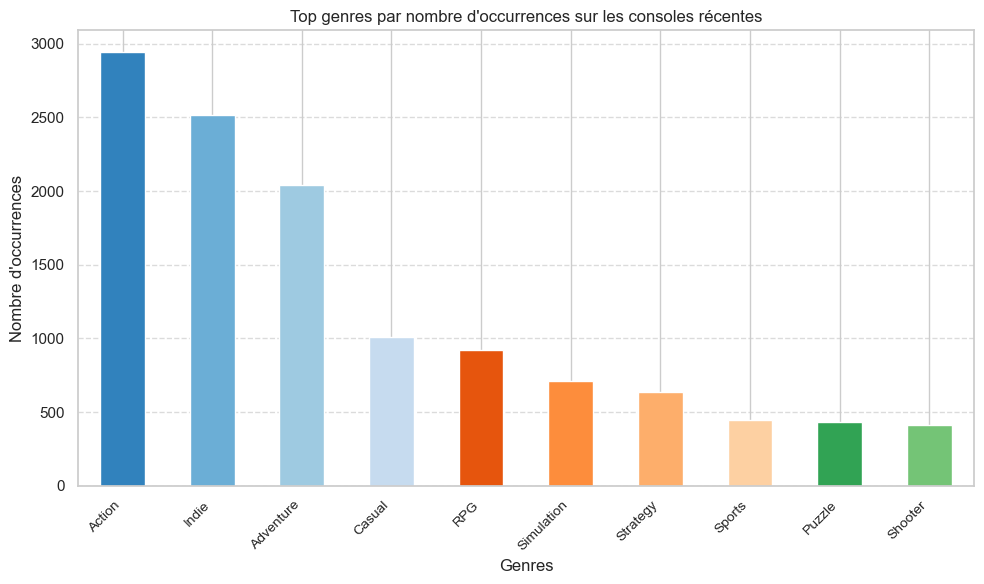

In [404]:
# Top genres par nombre d'occurrences (platforms 2014-2020) 
# --------------------------------------------------------
# Étape 1 : Préparation des données
# --------------------------------------------------------
# Transformation des colonnes de genres en une seule colonne avec les années correspondantes
genre_columns = [col for col in df_platforms.columns if col.startswith('Genre')]
df_concat_platforms = pd.melt(
    df_platforms, 
    id_vars=['Annee'], 
    value_vars=genre_columns, 
    var_name='all_genres', 
    value_name='Genre'
)

# Suppression des valeurs nulles dans la colonne 'Genre'
df_concat_platforms.dropna(subset=['Genre'], inplace=True)

# Exclure le genre "Non spécifié"
df_concat_platforms = df_concat_platforms[df_concat_platforms['Genre'] != "Non spécifié"]

# --------------------------------------------------------
# Étape 2 : Compter les occurrences par genre
# --------------------------------------------------------
# Calcul des occurrences pour chaque genre et sélection des 10 genres les plus fréquents
nb_occurrences = (
    df_concat_platforms['Genre']
    .value_counts()
    .head(10)
)

# Afficher les genres les plus fréquents
print("Top genres par occurrences (platforms) :")
print(nb_occurrences)

# --------------------------------------------------------
# Étape 3 : Création du graphique
# --------------------------------------------------------
plt.figure(figsize=(10, 6))

# Générer une palette de couleurs dynamique
colors = plt.cm.tab20c(range(len(nb_occurrences)))

# Tracer un graphique en barres
nb_occurrences.plot(
    kind='bar',
    color=colors,
    title="Top genres par nombre d'occurrences sur les consoles récentes"
)

# Ajouter des labels
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --------------------------------------------------------
# Étape 4 : Affichage du graphique
# --------------------------------------------------------
plt.tight_layout()
plt.show()


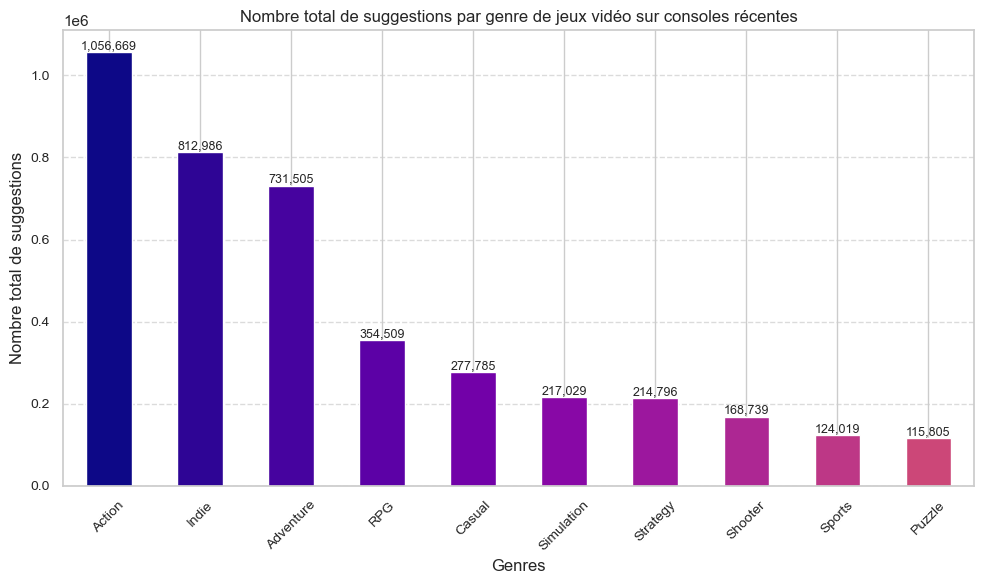

In [405]:
# --------------------------------------------------------
# Nombre total de suggestions par genre de jeux vidéo (platforms 2014-2020) en excluant "Non spécifié"
# --------------------------------------------------------
# Étape 1 : Concaténer toutes les colonnes 'Genre_1', 'Genre_2', etc., avec le nombre total de suggestions
# --------------------------------------------------------

# Identifier les colonnes de genres
genre_columns = [col for col in df_platforms.columns if col.startswith('Genre')]

# Transformer les colonnes de genres en une seule colonne 'Genre' tout en conservant le nombre de suggestions
df_genres_concat = pd.melt(
    df_platforms, 
    id_vars=['suggestions_count'],  # Colonnes à conserver
    value_vars=genre_columns,       # Colonnes de genres à transformer
    var_name='all_genres', 
    value_name='Genre'
).dropna(subset=['Genre'])  # Supprimer les lignes où le genre est manquant

# Exclure le genre "Non spécifié"
df_genres_concat = df_genres_concat[df_genres_concat['Genre'] != "Non spécifié"]

# --------------------------------------------------------
# Étape 2 : Calculer le nombre total de suggestions par genre
# --------------------------------------------------------

# Grouper par genre et calculer le nombre total de suggestions
total_suggestions_by_genre = (
    df_genres_concat
    .groupby('Genre')['suggestions_count']
    .sum()
    .sort_values(ascending=False)
)

# --------------------------------------------------------
# Étape 3 : Tracer le graphique des suggestions totales par genre
# --------------------------------------------------------

plt.figure(figsize=(10, 8))

# Générer des couleurs pour les genres
colors = plt.cm.plasma(np.linspace(0, 1, len(total_suggestions_by_genre)))

# Sélectionner les 10 genres ayant le plus grand nombre de suggestions
top_10_suggestions = total_suggestions_by_genre.head(10)

# Créer un graphique en barres pour les 10 genres
ax = top_10_suggestions.plot(
    kind='bar', 
    color=colors[:10], 
    title='Nombre total de suggestions par genre de jeux vidéo sur consoles récentes',
    figsize=(10, 6)
)

# --------------------------------------------------------
# Étape 4 : Ajouter les labels
# --------------------------------------------------------

plt.xlabel("Genres", fontsize=12)
plt.ylabel("Nombre total de suggestions", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotation des noms des genres pour une meilleure lisibilité
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille horizontale pour une meilleure lisibilité

# Ajouter les étiquettes de données sur les barres
for index, value in enumerate(top_10_suggestions):
    plt.text(index, value, f'{int(value):,}', ha='center', va='bottom', fontsize=9)

# --------------------------------------------------------
# Étape 5 : Afficher le graphique
# --------------------------------------------------------

plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()


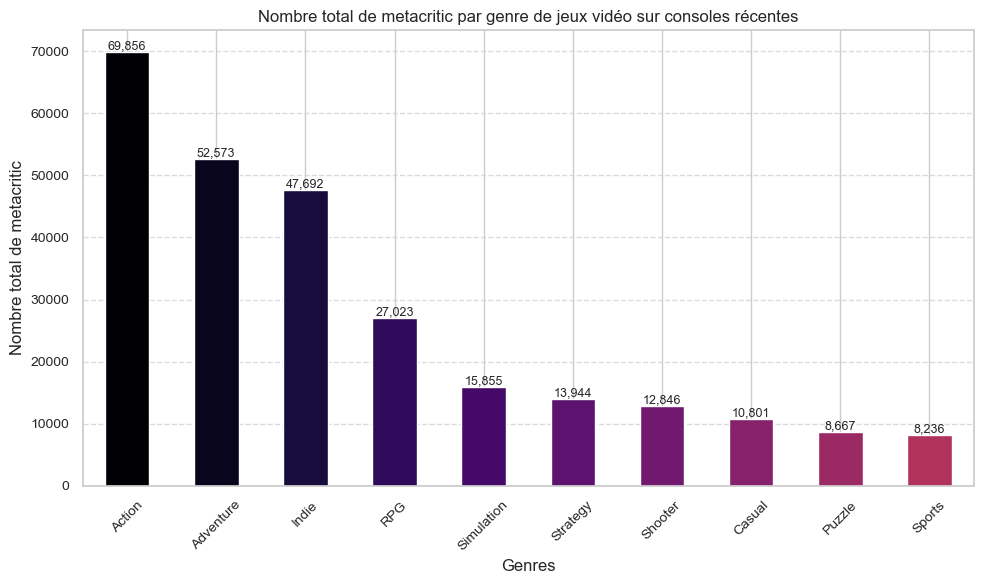

In [406]:
# Nombre moyen de metacritic par genre de jeux vidéo (Top 10)
# --------------------------------------------------------
# Étape 1 : Concaténer toutes les colonnes 'Genre_1', 'Genre_2', etc., avec les metacritics totaux
# --------------------------------------------------------

# Identifier les colonnes de genres
genre_columns = [col for col in df_platforms.columns if col.startswith('Genre')]

# Transformer les colonnes de genres en une seule colonne 'Genre' tout en conservant les scores metacritic
df_genres_concat = pd.melt(
    df_platforms, 
    id_vars=['metacritic'],  # Colonnes à conserver
    value_vars=genre_columns,      # Colonnes de genres à transformer
    var_name='all_genres', 
    value_name='Genre'
).dropna(subset=['Genre'])  # Supprimer les lignes où le genre est manquant

# --------------------------------------------------------
# Étape 2 : Calculer le total de metacritic par genre
# --------------------------------------------------------

# Grouper par genre et calculer le total des scores metacritic
total_metacritic_by_genre = (
    df_genres_concat
    .groupby('Genre')['metacritic']
    .sum()
    .sort_values(ascending=False)
)

# --------------------------------------------------------
# Étape 3 : Tracer le graphique des scores totaux de metacritic par genre
# --------------------------------------------------------

plt.figure(figsize=(8, 6))

# Générer des couleurs pour les genres
colors = plt.cm.inferno(np.linspace(0, 1, len(total_metacritic_by_genre)))

# Sélectionner les 10 genres ayant le plus grand total de metacritic
top_10_metacritic = total_metacritic_by_genre.head(10)

# Créer un graphique en barres pour les 10 genres
ax = top_10_metacritic.plot(
    kind='bar', 
    color=colors[:10], 
    title='Nombre total de metacritic par genre de jeux vidéo sur consoles récentes',
    figsize=(10, 6)
)

# --------------------------------------------------------
# Étape 4 : Ajouter les labels
# --------------------------------------------------------

plt.xlabel("Genres", fontsize=12)
plt.ylabel("Nombre total de metacritic", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotation des noms des genres pour une meilleure lisibilité
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille horizontale pour une meilleure lisibilité

# Ajouter les étiquettes de données sur les barres
for index, value in enumerate(top_10_metacritic):
    plt.text(index, value, f'{int(value):,}', ha='center', va='bottom', fontsize=9)

# --------------------------------------------------------
# Étape 5 : Afficher le graphique
# --------------------------------------------------------

plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()


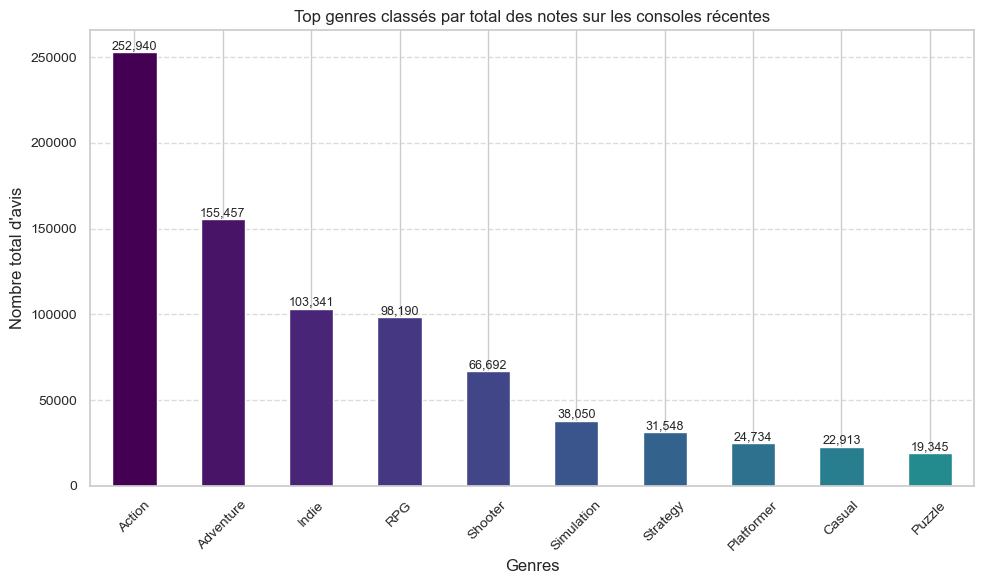

In [407]:
# Nombre d'avis par genre de jeux vidéo (platforms 2014-2020)
# --------------------------------------------------------
# Étape 1 : Concaténer toutes les colonnes 'Genre_1', 'Genre_2', etc., avec le nombre d'avis
# --------------------------------------------------------

# Identifier les colonnes de genres
genre_columns = [col for col in df_platforms.columns if col.startswith('Genre')]

# Transformer les colonnes de genres en une seule colonne 'Genre' tout en conservant le nombre d'avis
df_genres_concat = pd.melt(
    df_platforms, 
    id_vars=['rating', 'ratings_count'],  # Colonnes à conserver
    value_vars=genre_columns,            # Colonnes de genres à transformer
    var_name='all_genres', 
    value_name='Genre'
).dropna(subset=['Genre'])  # Supprimer les lignes où le genre est manquant

# --------------------------------------------------------
# Étape 2 : Calculer le nombre total d'avis par genre
# --------------------------------------------------------

# Grouper par genre et calculer le nombre total d'avis
total_ratings_by_genre = df_genres_concat.groupby('Genre')['ratings_count'].sum().sort_values(ascending=False)

# --------------------------------------------------------
# Étape 3 : Tracer le graphique des genres par popularité (nombre d'avis)
# --------------------------------------------------------

plt.figure(figsize=(6, 4))

# Générer des couleurs pour les genres
colors = plt.cm.viridis(np.linspace(0, 1, len(total_ratings_by_genre)))

# Sélectionner les 10 premiers genres et leurs nombres d'avis
top_10_genres = total_ratings_by_genre.head(10)

# Créer un graphique en barres
ax = top_10_genres.plot(
    kind='bar', 
    color=colors[:10],  # Utiliser les couleurs pour les 10 genres
    title='Top genres classés par total des notes sur les consoles récentes',
    figsize=(10, 6)
)

# --------------------------------------------------------
# Étape 4 : Ajouter les labels
# --------------------------------------------------------

plt.xlabel("Genres", fontsize=12)
plt.ylabel("Nombre total d'avis", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotation des noms des genres pour une meilleure lisibilité
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille horizontale pour une meilleure lisibilité

# Ajouter les étiquettes de données sur les barres
for index, value in enumerate(top_10_genres):
    plt.text(index, value, f'{value:,}', ha='center', va='bottom', fontsize=9)

# --------------------------------------------------------
# Étape 5 : Afficher le graphique
# --------------------------------------------------------

plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()


🎯 Top 10 jeux par total des notes et leurs genres :

🎮 METAL GEAR SOLID V: THE DEFINITIVE EXPERIENCE
   ➤ Total des notes : 4.75
   ➤ Genres : action

🎮 The Witcher 3: Game of the Year
   ➤ Total des notes : 4.77
   ➤ Genres : adventure||rpg

🎮 The Witcher 3: Wild Hunt
   ➤ Total des notes : 4.67
   ➤ Genres : action||adventure||rpg

🎮 Persona 5 Royal
   ➤ Total des notes : 4.81
   ➤ Genres : adventure||rpg

🎮 The Last Of Us Remastered
   ➤ Total des notes : 4.70
   ➤ Genres : action||adventure

🎮 Yakuza: Like a Dragon
   ➤ Total des notes : 4.73
   ➤ Genres : action||rpg

🎮 Dark Souls III: The Ringed City
   ➤ Total des notes : 4.70
   ➤ Genres : action||rpg

🎮 Shovel Knight: Shovel of Hope
   ➤ Total des notes : 4.78
   ➤ Genres : action||adventure||indie

🎮 The Witcher 3: Wild Hunt - Hearts of Stone
   ➤ Total des notes : 4.74
   ➤ Genres : rpg

🎮 The Witcher 3: Wild Hunt - Blood and Wine
   ➤ Total des notes : 4.75
   ➤ Genres : rpg



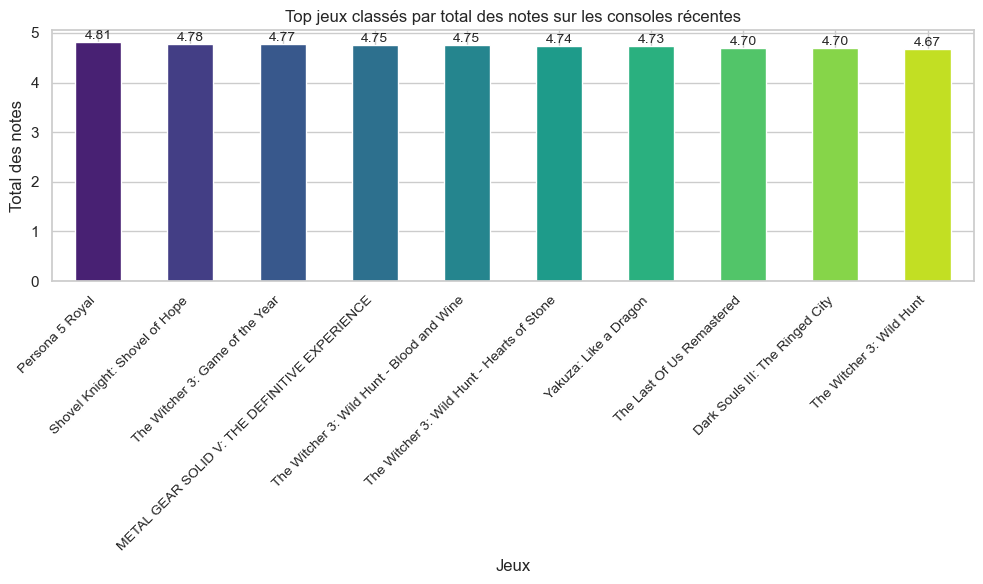

In [408]:
# Top 10 jeux par total des notes et leurs genres
# --------------------------------------------------------
# Étape 1 : Charger et prétraiter les données
# --------------------------------------------------------

# Garder uniquement les colonnes utiles
df_games_ratings = df_platforms[['name', 'rating', 'ratings_count', 'genres']].copy()

# Nettoyer la colonne 'rating'
df_games_ratings.loc[:, 'rating'] = pd.to_numeric(df_games_ratings['rating'], errors='coerce')

# Supprimer les lignes invalides
df_games_ratings = df_games_ratings[
    (df_games_ratings['name'].apply(lambda x: isinstance(x, str))) &
    (df_games_ratings['name'].notnull()) &
    (df_games_ratings['ratings_count'] > 0) &
    (df_games_ratings['rating'].notna())
]

# --------------------------------------------------------
# Étape 2 : Nettoyer les genres
# --------------------------------------------------------

# Séparer les genres si c’est une chaîne de type "Action, Aventure, RPG"
df_split_genres = df_games_ratings['genres'].str.split(',', expand=True)

# Nettoyer : minuscule + retirer les espaces
for col in df_split_genres.columns:
    df_split_genres[col] = df_split_genres[col].str.lower().str.strip()

# Fusionner toutes les colonnes en une seule chaîne "action, aventure, rpg"
df_games_ratings['all_genres'] = df_split_genres.apply(lambda row: ', '.join(row.dropna().unique()), axis=1)

# --------------------------------------------------------
# Étape 3 : Calculer le total des notes par jeu
# --------------------------------------------------------

# Regrouper par nom de jeu et sommer les notes
game_total_rating = df_games_ratings.groupby('name')['rating'].sum().sort_values(ascending=False)

# Garder les 10 jeux avec le total le plus élevé
top_games_total_rating = game_total_rating.head(10)

# --------------------------------------------------------
# Étape 4 : Extraire les genres des jeux sélectionnés
# --------------------------------------------------------

# Créer un DataFrame avec les jeux du top 10
top_games_df = df_games_ratings[df_games_ratings['name'].isin(top_games_total_rating.index)]

# Supprimer les doublons (au cas où un jeu serait listé plusieurs fois sur plusieurs plateformes)
top_games_df = top_games_df.drop_duplicates(subset='name')

# --------------------------------------------------------
# Étape 5 : Afficher les jeux et leurs genres
# --------------------------------------------------------

print("🎯 Top 10 jeux par total des notes et leurs genres :\n")
for index, row in top_games_df.iterrows():
    print(f"🎮 {row['name']}")
    print(f"   ➤ Total des notes : {top_games_total_rating[row['name']]:.2f}")
    print(f"   ➤ Genres : {row['all_genres']}\n")

# --------------------------------------------------------
# Étape 6 : Visualiser les résultats
# --------------------------------------------------------

# Palette de couleurs pour les jeux
colors_game_total_rating = sns.color_palette("viridis", len(top_games_total_rating))

# Créer le graphique
plt.figure(figsize=(10, 6))
ax = top_games_total_rating.plot(
    kind='bar',
    color=colors_game_total_rating,
    title='Top jeux classés par total des notes sur les consoles récentes'
)

# Ajouter les valeurs au-dessus des barres
for i, value in enumerate(top_games_total_rating):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Étiquettes
ax.set_xlabel('Jeux', fontsize=12)
ax.set_ylabel('Total des notes', fontsize=12)
ax.set_xticklabels(top_games_total_rating.index, rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()


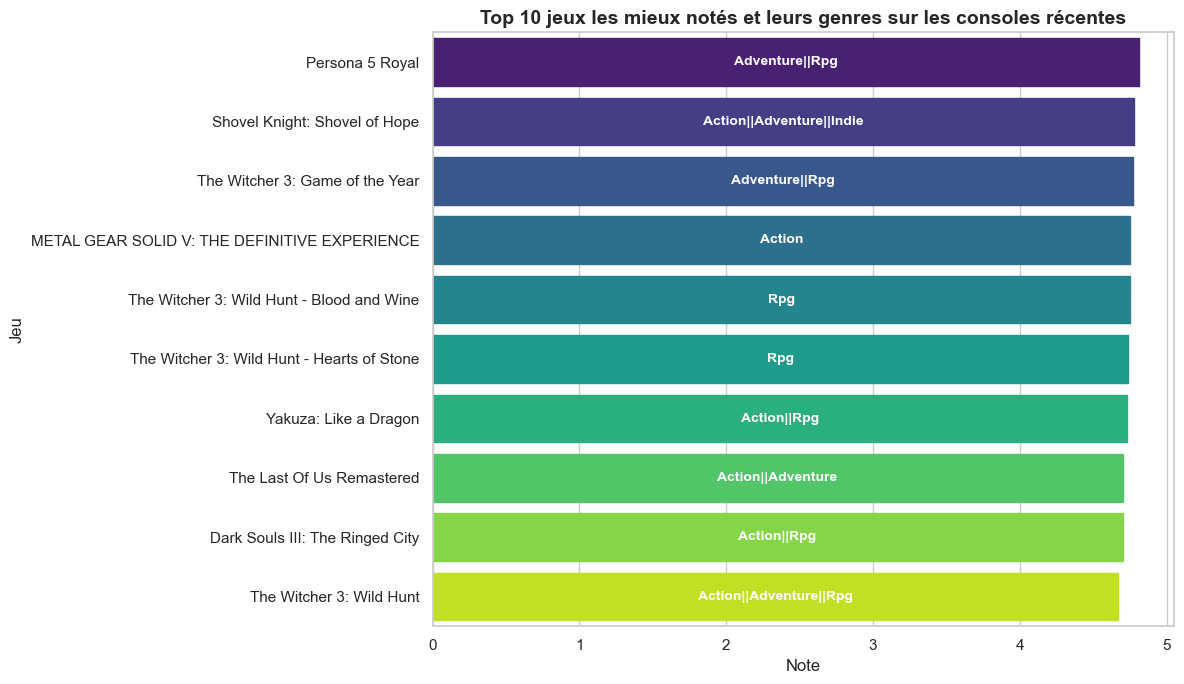

In [409]:
# --------------------------------------------------------
# 1. Préparation des données (à adapter si nécessaire)
# --------------------------------------------------------

# Sélection des colonnes utiles
df_games_ratings = df_platforms[['name', 'rating', 'ratings_count', 'genres']].copy()

# Nettoyage des valeurs de notes
df_games_ratings['rating'] = pd.to_numeric(df_games_ratings['rating'], errors='coerce')

# Filtrage des données valides
df_games_ratings = df_games_ratings[
    (df_games_ratings['name'].apply(lambda x: isinstance(x, str))) &
    (df_games_ratings['name'].notnull()) &
    (df_games_ratings['ratings_count'] > 0) &
    (df_games_ratings['rating'].notna())
]

# Nettoyage des genres
df_split_genres = df_games_ratings['genres'].str.split(',', expand=True)
for col in df_split_genres.columns:
    df_split_genres[col] = df_split_genres[col].str.title().str.strip()

# Création d'une chaîne unique de genres
df_games_ratings['all_genres'] = df_split_genres.apply(lambda row: '||'.join(row.dropna().unique()), axis=1)

# --------------------------------------------------------
# 2. Extraction du Top 10 des jeux par total de notes
# --------------------------------------------------------

# Agrégation des notes par jeu
total_ratings = df_games_ratings.groupby('name')['rating'].sum().sort_values(ascending=False)

# Sélection des 10 meilleurs jeux
top_10_names = total_ratings.head(10).index
top_10_df = df_games_ratings[df_games_ratings['name'].isin(top_10_names)].drop_duplicates(subset='name')

# Ajout de la colonne 'total_rating'
top_10_df['total_rating'] = top_10_df['name'].map(total_ratings)

# Tri décroissant pour affichage
top_10_df = top_10_df.sort_values('total_rating', ascending=False)

# --------------------------------------------------------
# 3. Visualisation des résultats
# --------------------------------------------------------

def plot_top_games_barh(df):
    """Affiche un barplot horizontal des meilleurs jeux avec genres au centre des barres."""
    
    # Préparation de la figure
    plt.figure(figsize=(12, 7))
    sns.set(style="whitegrid")

    # Génération des couleurs
    colors = sns.color_palette("viridis", len(df))

    # Création du barplot sans `palette` (évite le warning)
    barplot = sns.barplot(
        x='total_rating',
        y='name',
        data=df,
        dodge=False
    )

    # Application manuelle des couleurs
    for patch, color in zip(barplot.patches, colors):
        patch.set_color(color)

    # Insertion des genres au centre des barres
    for i, (value, genre) in enumerate(zip(df['total_rating'], df['all_genres'])):
        barplot.text(
            value / 2, i,           # Position centrale dans la barre
            genre,                  # Texte = genres
            va='center',
            ha='center',
            fontsize=10,
            color='white',
            fontweight='bold'
        )

    # Titre et axes
    plt.title("Top 10 jeux les mieux notés et leurs genres sur les consoles récentes", fontsize=14, fontweight='bold')
    plt.xlabel("Note", fontsize=12)
    plt.ylabel("Jeu", fontsize=12)

    plt.tight_layout()
    plt.show()

# --------------------------------------------------------
# 4. Lancement de la visualisation
# --------------------------------------------------------

plot_top_games_barh(top_10_df)


### Conclusion sur les analyses des genres

Le classement repose sur une échelle de notes allant jusqu’à 5.

Le genre RPG (Role Playing Game) est le plus récurrent : présent dans 8 des 10 jeux classés.

Les jeux combinant plusieurs genres sont également très présents, notamment :

Action + RPG

Adventure + RPG

Action + Adventure + RPG

Parmi les exemples marquants :

The Witcher 3 (et ses extensions) est cité 3 fois dans ce top 10.

Persona 5 Royal, Yakuza: Like a Dragon et Dark Souls III combinent tous une forte dimension RPG.

Les données analysées suggèrent qu’un positionnement optimal pour un jeu Triple A combinerait un gameplay d’action avec des éléments issus des genres RPG et/ou aventure.

##### L'évolution des genres

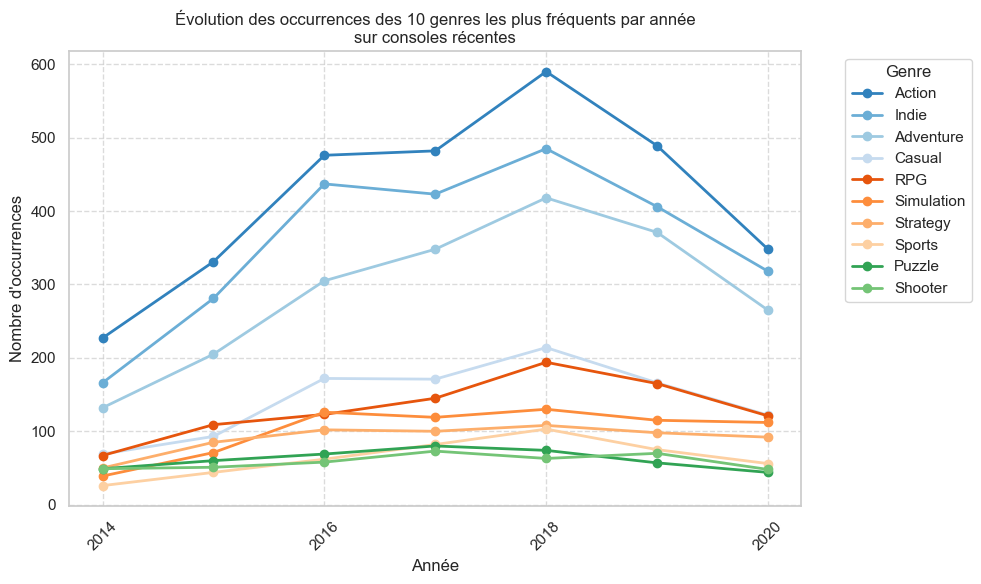

In [410]:
# --------------------------------------------------------
# Évolution des occurrences des 10 genres les plus fréquents par année 2014-2020 (hors "Non spécifié")
# --------------------------------------------------------
# Étape 1 : Concaténer toutes les colonnes 'Genre_1', 'Genre_2', etc., avec 'Annee'
# --------------------------------------------------------
# Identifier les colonnes des genres
genre_columns = [col for col in df_platforms.columns if col.startswith('Genre')]

# Transformer les colonnes des genres en une seule colonne tout en conservant l'année
df_genres_concat = pd.melt(
    df_platforms, 
    id_vars=['Annee'], 
    value_vars=genre_columns, 
    var_name='all_genres', 
    value_name='Genre'
).dropna(subset=['Genre'])  # Supprimer les lignes avec des valeurs manquantes

# Exclure le genre "Non spécifié"
df_genres_concat = df_genres_concat[df_genres_concat['Genre'] != "Non spécifié"]

# --------------------------------------------------------
# Étape 2 : Compter les occurrences de chaque genre par année
# --------------------------------------------------------
# Grouper par année et genre, puis compter les occurrences
occurrences_par_genre = df_genres_concat.groupby(['Annee', 'Genre']).size().unstack(fill_value=0)

# --------------------------------------------------------
# Étape 3 : Filtrer les 10 genres les plus fréquents
# --------------------------------------------------------
# Identifier les 10 genres les plus fréquents sur l'ensemble des années
top_10_genres = occurrences_par_genre.sum().sort_values(ascending=False).head(10).index

# Extraire uniquement les données des 10 genres les plus fréquents
occurrences_top_genres = occurrences_par_genre[top_10_genres]

# --------------------------------------------------------
# Étape 4 : Tracer le graphique de l'évolution des occurrences par genre
# --------------------------------------------------------
plt.figure(figsize=(10, 6))

# Définir une palette de couleurs pour chaque genre
colors = plt.cm.tab20c.colors  # Palette tab20c pour des couleurs distinctes

# Tracer une courbe pour chaque genre
for i, genre in enumerate(occurrences_top_genres.columns):
    plt.plot(
        occurrences_top_genres.index, 
        occurrences_top_genres[genre], 
        label=genre, 
        color=colors[i % len(colors)], 
        linewidth=2, 
        marker='o'
    )

# --------------------------------------------------------
# Étape 5 : Personnalisation du graphique
# --------------------------------------------------------
plt.title("Évolution des occurrences des 10 genres les plus fréquents par année\nsur consoles récentes", fontsize=12)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajuster les ticks de l'axe des années (X)
plt.xticks(ticks=np.arange(occurrences_top_genres.index.min(), occurrences_top_genres.index.max() + 1, 2), rotation=45)

# --------------------------------------------------------
# Étape 6 : Ajustement et affichage du graphique
# --------------------------------------------------------
plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()


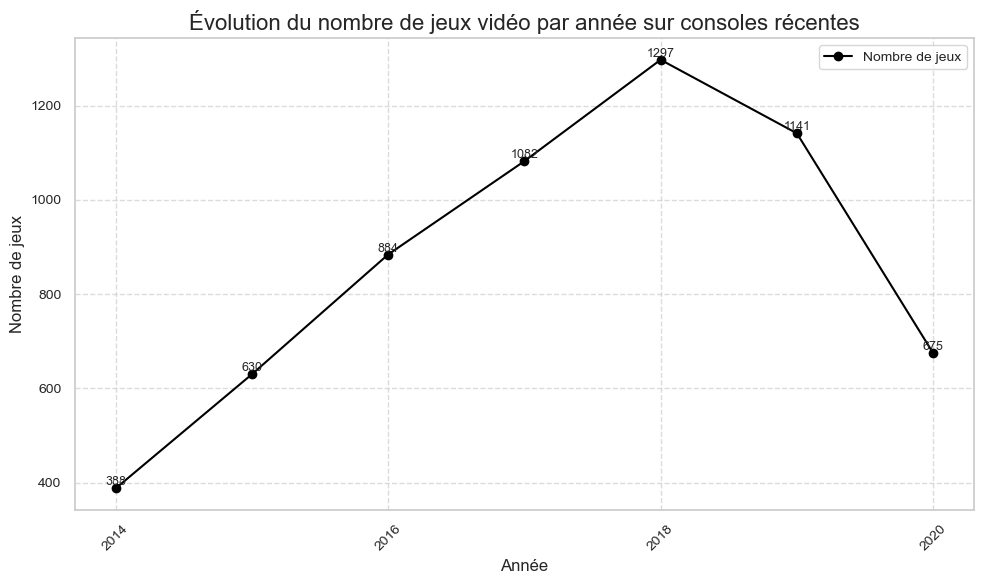

In [411]:
# Évolution du nombre de jeux vidéo par année (paltforms 2014-2020)
# --------------------------------------------------------
# Étape 1 : Compter le nombre de jeux vidéo par année
# --------------------------------------------------------
# Calculer le nombre de jeux vidéo par année en triant par ordre chronologique
games_by_year = df_platforms['Annee'].value_counts().sort_index()

# --------------------------------------------------------
# Étape 2 : Tracer le graphique de l'évolution du nombre de jeux par année
# --------------------------------------------------------
plt.figure(figsize=(10, 6))  # Définir la taille de la figure

# Tracer une ligne avec des marqueurs pour représenter l'évolution
plt.plot(
    games_by_year.index,  # Années
    games_by_year.values,  # Nombre de jeux
    color='black',          # Couleur de la ligne
    marker='o',            # Marqueur pour chaque point
    linestyle='-',         # Style de la ligne
    label="Nombre de jeux" # Légende
)

# --------------------------------------------------------
# Étape 3 : Ajouter les étiquettes de données
# --------------------------------------------------------
# Afficher les valeurs exactes sur chaque point
for year, value in zip(games_by_year.index, games_by_year.values):
    plt.text(year, value, str(value), fontsize=9, ha='center', va='bottom')

# --------------------------------------------------------
# Étape 4 : Ajouter les labels et personnaliser le graphique
# --------------------------------------------------------
# Ajouter un titre et les labels des axes
plt.title("Évolution du nombre de jeux vidéo par année sur consoles récentes", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de jeux", fontsize=12)

# Ajouter une grille pour une meilleure lisibilité
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Ajuster les ticks pour l'axe des années afin de ne montrer que les années pertinentes
plt.xticks(
    ticks=np.arange(games_by_year.index.min(), games_by_year.index.max() + 1, 2),
    rotation=45,
    fontsize=10
)

# Ajuster les ticks de l'axe Y
plt.yticks(fontsize=10)

# --------------------------------------------------------
# Étape 5 : Afficher le graphique
# --------------------------------------------------------
plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.legend(fontsize=10)  # Ajouter une légende
plt.show()  # Afficher le graphique


L’année 2020 marque une rupture brutale dans la croissance de la production de jeux vidéo sur consoles récentes. Cette cassure s’explique largement par les conséquences de la pandémie de COVID-19, qui a perturbé toute la chaîne de développement, de production et de publication.

# Données de ventes des consoles

## Préparation et nettoyage des données de ventes des consoles

In [412]:
df_console.head(2)

Console Constructeur  Date de Sortie  Vente (en million)
0  PlayStation 2         Sony            2000            158.0000
1    Nintendo DS     Nintendo            2004            157.1004

In [413]:
df_console.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Console             20 non-null     object 
 1   Constructeur        20 non-null     object 
 2   Date de Sortie      20 non-null     int64  
 3   Vente (en million)  20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


In [414]:
df_console.columns

Index(['Console', 'Constructeur', 'Date de Sortie', 'Vente (en million)'], dtype='object')

In [415]:
df_console.describe()

Date de Sortie  Vente (en million)
count       20.000000           20.000000
mean      2000.900000           80.748635
std         11.465738           40.745223
min       1977.000000           24.000000
25%       1993.000000           46.194000
50%       2002.500000           80.112300
75%       2007.250000          106.525500
max       2020.000000          158.000000

In [416]:
# --------------------------------------------------------
# Étape 1 : Arrondir les valeurs de la colonne spécifiée
# --------------------------------------------------------
# Arrondir les valeurs de la colonne 'vente (en million)' à deux chiffres après la virgule
df_console['Vente (en million)'] = df_console['Vente (en million)'].round(2)

# --------------------------------------------------------
# Étape 2 : Vérifier les modifications
# --------------------------------------------------------
# Afficher les premières lignes du DataFrame pour confirmer les changements
print("Aperçu des données après arrondi :")
print(df_console.head(3))


Aperçu des données après arrondi :
         Console Constructeur  Date de Sortie  Vente (en million)
0  PlayStation 2         Sony            2000              158.00
1    Nintendo DS     Nintendo            2004              157.10
2         Switch     Nintendo            2017              126.88


In [417]:
# --------------------------------------------------------
# Étape 1 : Définir les colonnes à vérifier
# --------------------------------------------------------
columns_to_check = ['Console', 'Constructeur', 'Date de Sortie', 'Vente (en million)']

# --------------------------------------------------------
# Étape 2 : Parcourir chaque colonne et afficher les valeurs uniques
# --------------------------------------------------------
for column in columns_to_check:
    # Afficher le titre de la colonne
    print(f"Valeurs uniques dans la colonne '{column}':")
    
    # Afficher les valeurs uniques dans la colonne
    print(df_console[column].unique())
    
    # Ajouter une ligne séparatrice pour une meilleure lisibilité
    print('=' * 70)


Valeurs uniques dans la colonne 'Console':
['PlayStation 2' 'Nintendo DS' 'Switch' 'Game Boy (avec Color)'
 'PlayStation 4' 'PlayStation' 'Wii' 'PlayStation 3' 'Xbox 360' 'PSP'
 'Game Boy Advance' 'Nintendo 3DS' 'NES' 'Xbox One' 'Super Nintendo'
 'PlayStation 5' 'Nintendo 64' 'Mega Drive' 'Atari 2600' 'Xbox']
Valeurs uniques dans la colonne 'Constructeur':
['Sony' 'Nintendo' 'Microsoft' 'Sega' 'Atari']
Valeurs uniques dans la colonne 'Date de Sortie':
[2000 2004 2017 1989 2013 1994 2006 2005 2001 2011 1983 1990 2020 1996
 1988 1977]
Valeurs uniques dans la colonne 'Vente (en million)':
[158.   157.1  126.88 118.69 115.83 103.42  99.6   87.9   83.2   81.98
  78.25  75.94  60.67  59.74  47.14  43.37  31.61  31.06  30.6   24.  ]


## Analyse des données de ventes des consoles

#### Analyse des ventes par console

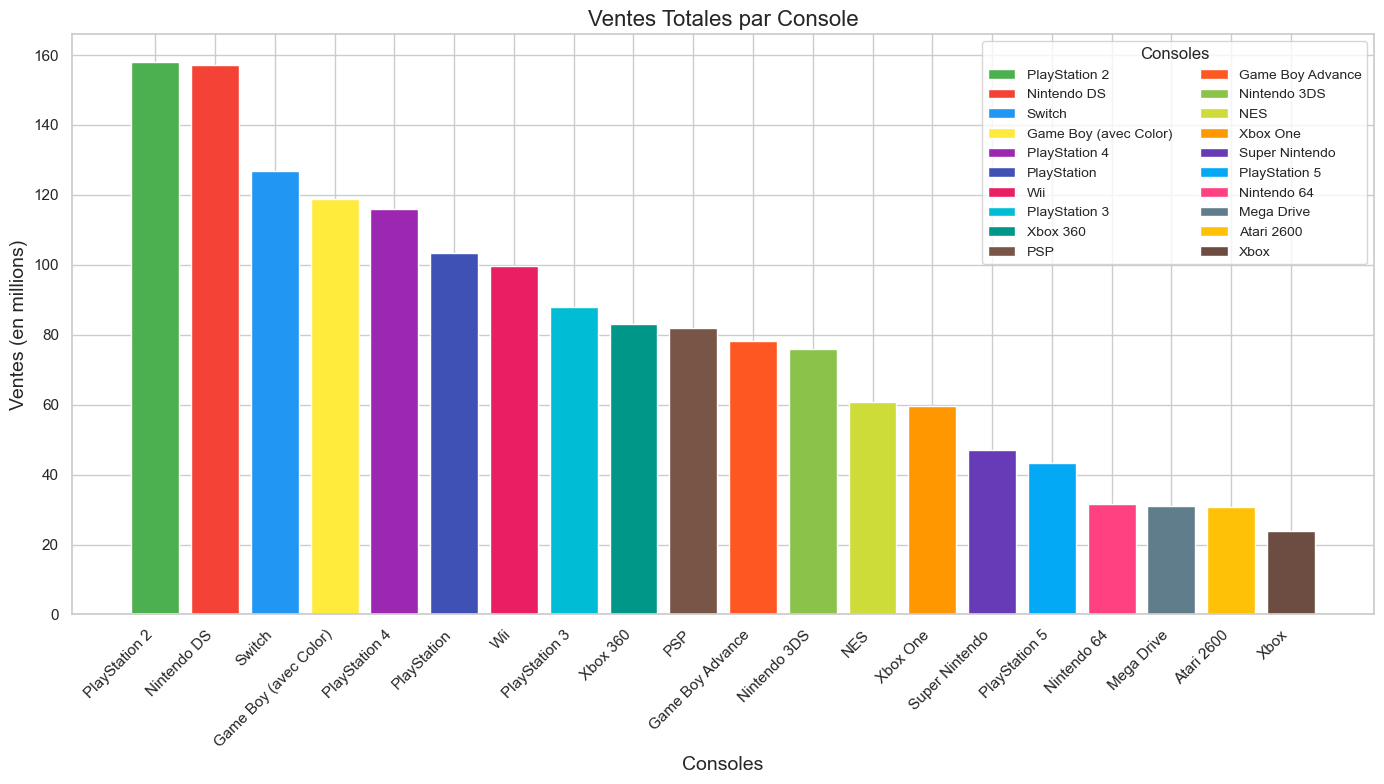

In [418]:
# Ventes Totales par Console
# --------------------------------------------------------
# Étape 1 : Définir une palette avec des couleurs uniques
# --------------------------------------------------------
# Palette étendue avec 20 couleurs uniques
couleurs = ['#4caf50', '#f44336', '#2196f3', '#ffeb3b', '#9c27b0', 
            '#3f51b5', '#e91e63', '#00bcd4', '#009688', '#795548', 
            '#ff5722', '#8bc34a', '#cddc39', '#ff9800', '#673ab7', 
            '#03a9f4', '#ff4081', '#607d8b', '#ffc107', '#6d4c41']

# Vérification : Le nombre de consoles ne doit pas dépasser le nombre de couleurs
if len(df_console['Console'].unique()) > len(couleurs):
    raise ValueError("Ajoutez plus de couleurs pour correspondre au nombre de consoles !")

# --------------------------------------------------------
# Étape 2 : Assigner une couleur unique à chaque console
# --------------------------------------------------------
# Associer une couleur à chaque console unique
console_colors = {console: couleurs[i] for i, console in enumerate(df_console['Console'].unique())}

# Appliquer ces couleurs à chaque barre en mappant les consoles aux couleurs
bar_colors = df_console['Console'].map(console_colors)

# --------------------------------------------------------
# Étape 3 : Tracer l'histogramme
# --------------------------------------------------------
plt.figure(figsize=(14, 8))  # Ajuster la taille du graphique

# Tracer les barres avec les couleurs associées
plt.bar(df_console['Console'], df_console['Vente (en million)'], color=bar_colors)

# Ajouter des titres et labels
plt.title('Ventes Totales par Console', fontsize=16)
plt.xlabel('Consoles', fontsize=14)
plt.ylabel('Ventes (en millions)', fontsize=14)

# Rotation des étiquettes pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# --------------------------------------------------------
# Étape 4 : Ajouter une légende personnalisée
# --------------------------------------------------------
# Ajouter une légende avec une barre invisible pour chaque console
for console, color in console_colors.items():
    plt.bar(0, 0, color=color, label=console)  # Barres invisibles pour la légende

# Personnalisation de la légende
plt.legend(title="Consoles", loc='upper right', fontsize=10, ncol=2)

# --------------------------------------------------------
# Étape 5 : Ajuster l'affichage
# --------------------------------------------------------
# Ajuster l'espacement pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


#### Analyse des ventes par date de sortie

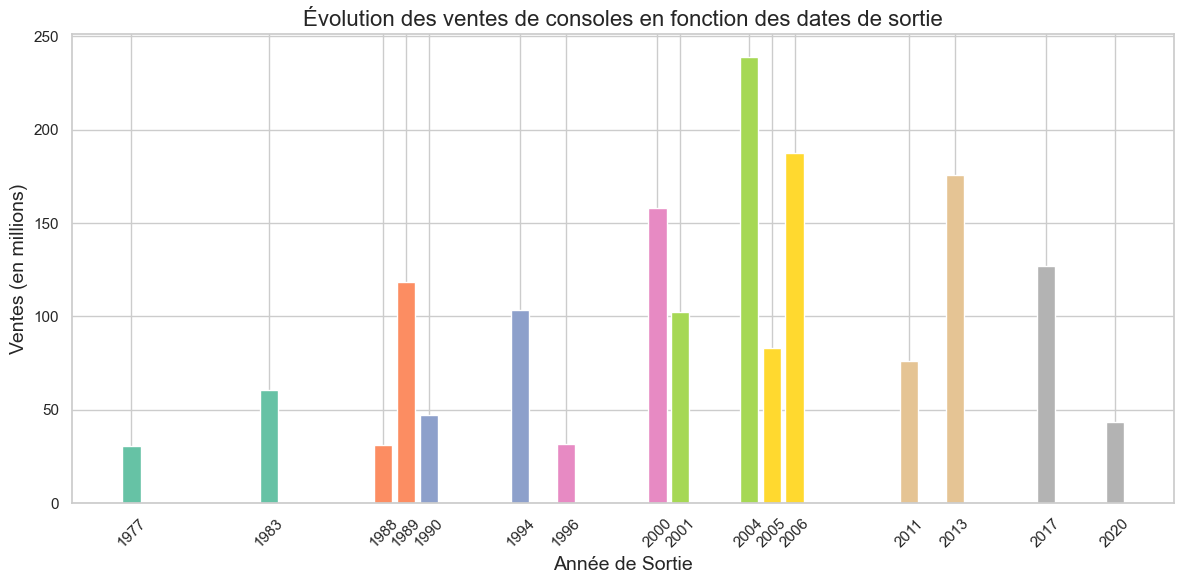

In [419]:
# Évolution des ventes de consoles en fonction des dates de sortie
# --------------------------------------------------------
# Étape 1 : Regrouper les ventes par année
# --------------------------------------------------------
sales_by_year = df_console.groupby('Date de Sortie')['Vente (en million)'].sum().reset_index()

# --------------------------------------------------------
# Étape 2 : Générer une palette de couleurs dynamique
# --------------------------------------------------------
# Utiliser la méthode recommandée pour récupérer la palette Set2
palette_years = plt.colormaps['Set2']  # Utilisation de la méthode moderne
couleurs_years = [palette_years(i / len(sales_by_year)) for i in range(len(sales_by_year))]

# --------------------------------------------------------
# Étape 3 : Tracer le graphique en barres
# --------------------------------------------------------
plt.figure(figsize=(12, 6))  # Ajuster la taille du graphique

# Tracer les barres avec les couleurs générées
plt.bar(sales_by_year['Date de Sortie'], sales_by_year['Vente (en million)'], color=couleurs_years)

# --------------------------------------------------------
# Étape 4 : Ajouter des titres et labels
# --------------------------------------------------------
plt.title('Évolution des ventes de consoles en fonction des dates de sortie', fontsize=16)
plt.xlabel('Année de Sortie', fontsize=14)
plt.ylabel('Ventes (en millions)', fontsize=14)

# Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(sales_by_year['Date de Sortie'], rotation=45)

# --------------------------------------------------------
# Étape 5 : Ajuster l'affichage
# --------------------------------------------------------
plt.tight_layout()

# Afficher le graphique
plt.show()


#### Analyse des ventes par constructeur

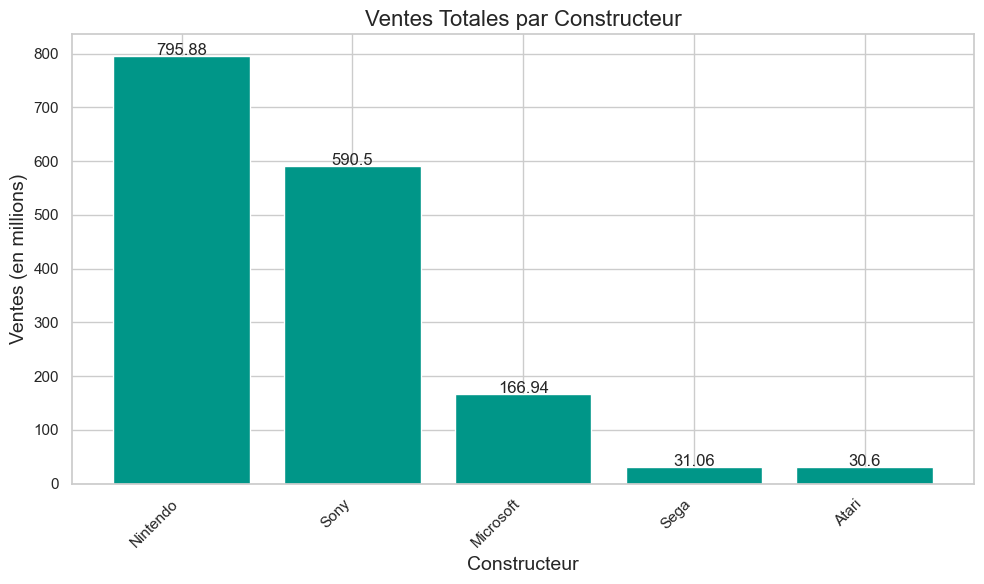

In [420]:
# Ventes Totales par Constructeur
# --------------------------------------------------------
# 📊 Étape 1 : Agréger les ventes par constructeur
# --------------------------------------------------------
df_agg = df_console.groupby('Constructeur', as_index=False)['Vente (en million)'].sum()

# Trier les constructeurs par ventes décroissantes
df_agg = df_agg.sort_values(by='Vente (en million)', ascending=False)

# --------------------------------------------------------
# 🖼️ Étape 2 : Tracer l'histogramme
# --------------------------------------------------------
plt.figure(figsize=(10, 6))  # Taille du graphique

# Création du graphique en barres
plt.bar(df_agg['Constructeur'], df_agg['Vente (en million)'], color='#009688')

# Titre et axes
plt.title('Ventes Totales par Constructeur', fontsize=16)
plt.xlabel('Constructeur', fontsize=14)
plt.ylabel('Ventes (en millions)', fontsize=14)

# Rotation des étiquettes de l’axe X pour éviter le chevauchement
plt.xticks(rotation=45, ha='right')

# Meilleur ajustement des éléments dans la figure
plt.tight_layout()

# --------------------------------------------------------
# 🪄 Étape 3 : Afficher les valeurs au-dessus des barres (optionnel)
# --------------------------------------------------------
for i, v in enumerate(df_agg['Vente (en million)']):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

# --------------------------------------------------------
# 🪞 Étape 4 : Affichage final
# --------------------------------------------------------
plt.show()


### Analyse des tendances actuelles (2014_2020)

In [421]:
# Les Principeaux constructeurs (2013-2020)
# --------------------------------------------------------
# Étape 1 : Définir les constructeurs et la période d'analyse
# --------------------------------------------------------
constructeurs_interesses = ['nintendo', 'sony', 'microsoft']  # Constructeurs à analyser
periode_min = 2013  # Année de début
periode_max = 2020  # Année de fin

# --------------------------------------------------------
# Étape 2 : Filtrer les données
# --------------------------------------------------------
# Appliquer des filtres sur les colonnes 'Date de Sortie' et 'Constructeur'
df_console_cons = df_console[
    (df_console['Date de Sortie'] >= periode_min) &
    (df_console['Date de Sortie'] <= periode_max) &
    (df_console['Constructeur'].str.lower().isin(constructeurs_interesses))  # Assurer une comparaison insensible à la casse
].copy()

# --------------------------------------------------------
# Étape 3 : Afficher le DataFrame filtré
# --------------------------------------------------------
print("Données filtrées pour les constructeurs intéressés (2013-2020) :")
print(df_console_cons)


Données filtrées pour les constructeurs intéressés (2013-2020) :
          Console Constructeur  Date de Sortie  Vente (en million)
2          Switch     Nintendo            2017              126.88
4   PlayStation 4         Sony            2013              115.83
13       Xbox One    Microsoft            2013               59.74
15  PlayStation 5         Sony            2020               43.37


#### Analyse des Ventes des Consoles de la Génération Actuelle

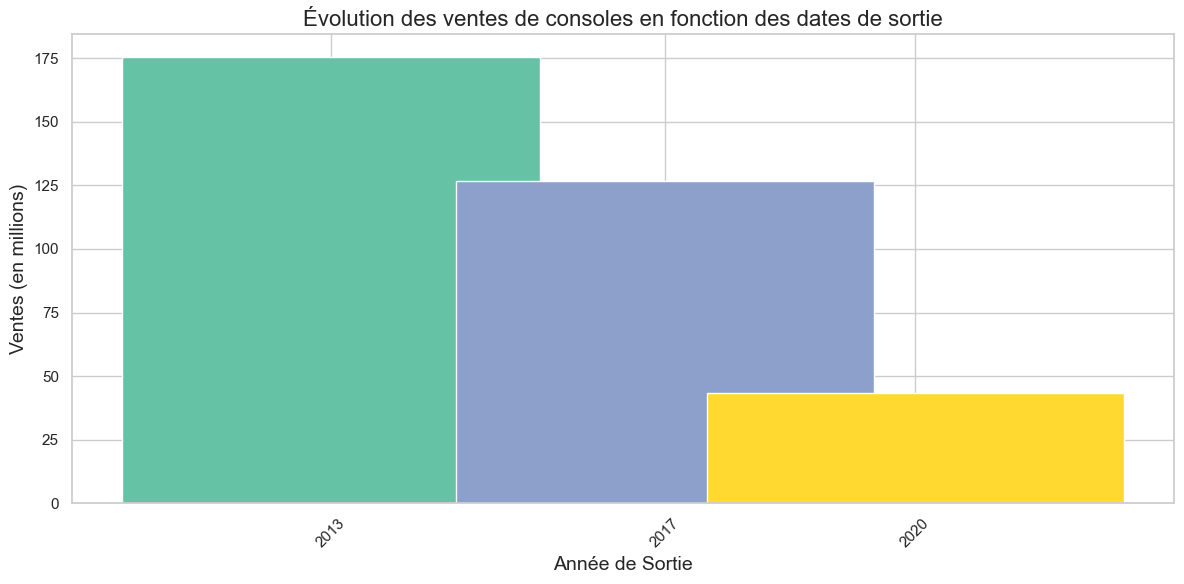

In [422]:
# Évolution des ventes de consoles en fonction des dates de sortie
# --------------------------------------------------------
# Étape 1 : Regrouper les ventes par année
# --------------------------------------------------------
sales_by_year = df_console_cons.groupby('Date de Sortie')['Vente (en million)'].sum().reset_index()

# --------------------------------------------------------
# Étape 2 : Générer une palette de couleurs dynamique
# --------------------------------------------------------
# Utiliser la méthode recommandée pour récupérer la palette Set2
palette_years = plt.colormaps['Set2']  # Utilisation de la méthode moderne
couleurs_years = [palette_years(i / len(sales_by_year)) for i in range(len(sales_by_year))]

# --------------------------------------------------------
# Étape 3 : Tracer le graphique en barres
# --------------------------------------------------------
plt.figure(figsize=(12, 6))  # Ajuster la taille du graphique

# Tracer les barres avec les couleurs générées et ajuster la largeur des barres
plt.bar(sales_by_year['Date de Sortie'], sales_by_year['Vente (en million)'], color=couleurs_years, width=5)

# --------------------------------------------------------
# Étape 4 : Ajouter des titres et labels
# --------------------------------------------------------
plt.title('Évolution des ventes de consoles en fonction des dates de sortie', fontsize=16)
plt.xlabel('Année de Sortie', fontsize=14)
plt.ylabel('Ventes (en millions)', fontsize=14)

# Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(sales_by_year['Date de Sortie'], rotation=45)

# --------------------------------------------------------
# Étape 5 : Ajuster l'affichage
# --------------------------------------------------------
plt.tight_layout()

# Afficher le graphique
plt.show()


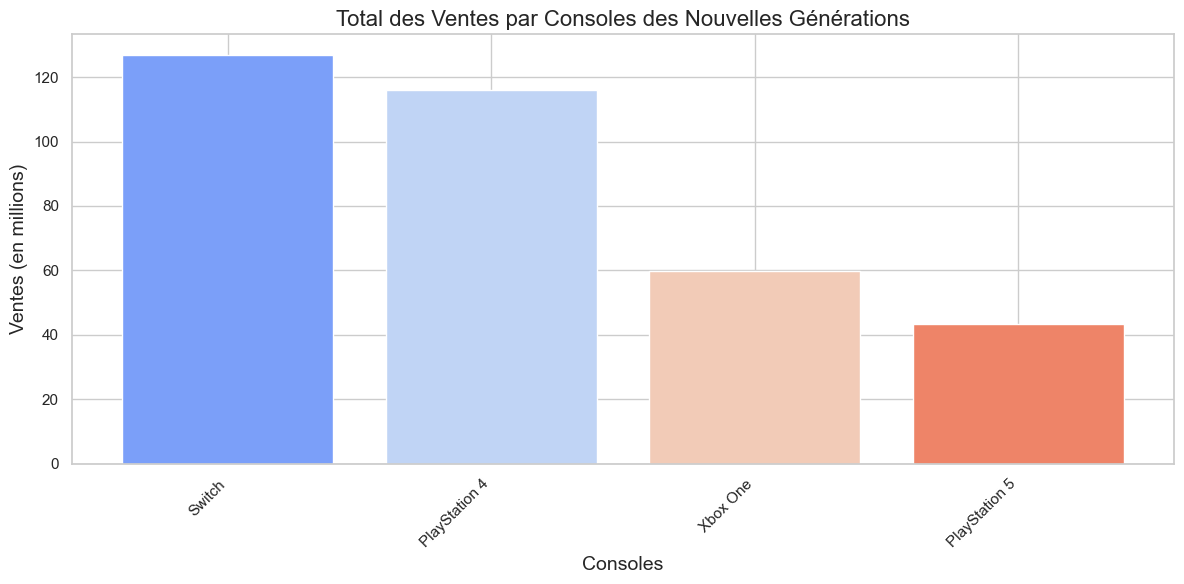

In [423]:
# Total des Ventes par Consoles des Nouvelles Générations
# --------------------------------------------------------
# Étape 1 : Générer une palette de couleurs unique pour chaque console
# --------------------------------------------------------
# Extraire les consoles uniques
consoles_uniques = df_console_cons['Console'].unique()

# Générer une palette de couleurs "coolwarm"
palette = sns.color_palette("coolwarm", len(consoles_uniques))

# Mapper les consoles à leurs couleurs respectives
couleurs = dict(zip(consoles_uniques, palette))

# --------------------------------------------------------
# Étape 2 : Tracer l'histogramme des ventes par console
# --------------------------------------------------------
plt.figure(figsize=(12, 6))  # Définir la taille de la figure

# Créer le graphique en barres
plt.bar(
    df_console_cons['Console'], 
    df_console_cons['Vente (en million)'], 
    color=[couleurs[console] for console in df_console_cons['Console']]
)

# --------------------------------------------------------
# Étape 3 : Ajouter des titres et labels
# --------------------------------------------------------
plt.title('Total des Ventes par Consoles des Nouvelles Générations', fontsize=16)
plt.xlabel('Consoles', fontsize=14)
plt.ylabel('Ventes (en millions)', fontsize=14)

# Rotation des étiquettes pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# --------------------------------------------------------
# Étape 4 : Ajuster l'affichage
# --------------------------------------------------------
plt.tight_layout()  # Ajuster les marges pour éviter les chevauchements
plt.show()


Ce graphique met en lumière les différences de performance entre les consoles de la génération actuelle. Pour UOI Games, ces informations sont cruciales pour :
- Cibler les bonnes plateformes : Se concentrer sur les consoles avec les plus grandes bases installées.
- Adapter la stratégie marketing : En fonction des forces et des limitations de chaque console.
- Planifier le développement technique : Choisir une plateforme adaptée aux ambitions et aux contraintes du jeu Triple A.

Pour maximiser les ventes, le jeu pourrait être développé pour plusieurs plateformes (Switch, PS5/PS4, Xbox).
Cela permettrait de toucher différents segments de consommateurs tout en répartissant les coûts de développement.

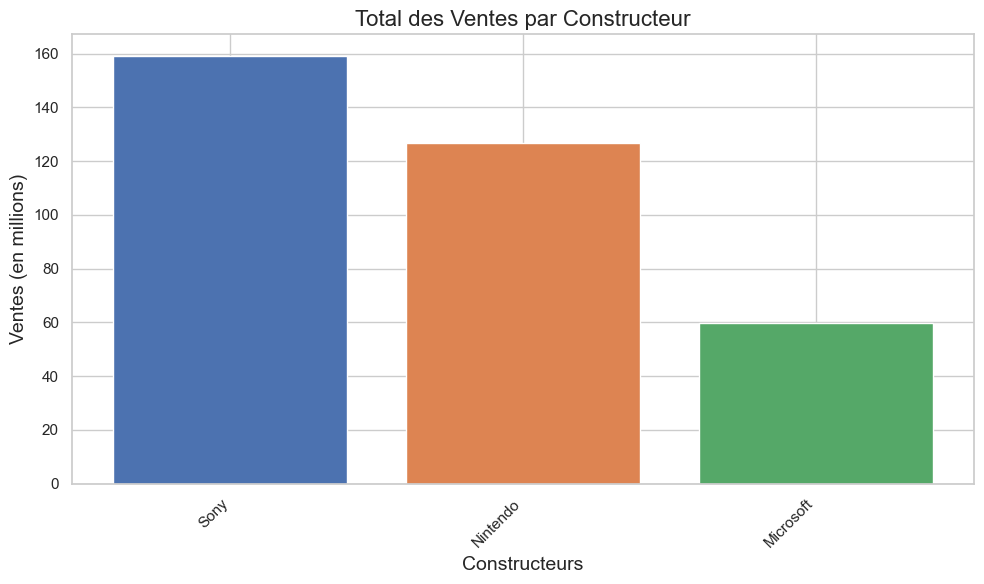

In [424]:
# Total des Ventes par Constructeur
# --------------------------------------------------------
# Étape 1 : Calculer les ventes totales par constructeur
# --------------------------------------------------------
# Groupement par constructeur et somme des ventes
ventes_par_constructeur = df_console_cons.groupby('Constructeur')['Vente (en million)'].sum().reset_index()

# Trier les données par ventes totales (ordre décroissant)
ventes_par_constructeur = ventes_par_constructeur.sort_values(by='Vente (en million)', ascending=False)

# --------------------------------------------------------
# Étape 2 : Générer une palette de couleurs
# --------------------------------------------------------
# Identifier les constructeurs uniques
constructeurs_uniques = ventes_par_constructeur['Constructeur'].unique()

# Créer une palette de couleurs "Deep"
palette = sns.color_palette("deep", len(constructeurs_uniques))

# Associer chaque constructeur à une couleur
couleurs = dict(zip(constructeurs_uniques, palette))

# --------------------------------------------------------
# Étape 3 : Tracer l'histogramme
# --------------------------------------------------------
plt.figure(figsize=(10, 6))  # Définir la taille de la figure

# Tracer le graphique en barres avec des couleurs par constructeur
plt.bar(
    ventes_par_constructeur['Constructeur'], 
    ventes_par_constructeur['Vente (en million)'], 
    color=[couleurs[constructeur] for constructeur in ventes_par_constructeur['Constructeur']]
)

# --------------------------------------------------------
# Étape 4 : Ajouter des titres et labels
# --------------------------------------------------------
plt.title('Total des Ventes par Constructeur', fontsize=16)
plt.xlabel('Constructeurs', fontsize=14)
plt.ylabel('Ventes (en millions)', fontsize=14)

# Rotation des étiquettes pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# --------------------------------------------------------
# Étape 5 : Ajuster l'affichage
# --------------------------------------------------------
plt.tight_layout()  # Ajuster les marges pour éviter les chevauchements

# Afficher le graphique
plt.show()


Ce graphique met en lumière les différences significatives dans les performances des constructeurs de consoles. Pour UOI Games, il serait judicieux de :

- Prioriser les partenariats avec Sony, Nintendo et Microsoft.
- Adapter le style de jeu au public cible des consoles les plus performnetes.

Développer un jeu compatible avec plusieurs plateformes peut maximiser les ventes et toucher différents segments.

# Données de ventes des jeux vidéo

## Préparation et nettoyage des données de ventes des jeux vidéo

In [425]:
df_sales_16.head(2)

Rank               Name Platform    Year     Genre Publisher Constructeur  \
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     Nintendo   
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     Nintendo   

  Portable   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0       Non   41.4900   27.8592    3.6569       8.2908       81.2969  
1       Non   29.9524    3.4726    6.6738       0.8085       40.9073

In [426]:
df_sales_16.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16545 entries, 0 to 16544
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16545 non-null  int64  
 1   Name          16545 non-null  object 
 2   Platform      16545 non-null  object 
 3   Year          16274 non-null  float64
 4   Genre         16545 non-null  object 
 5   Publisher     16487 non-null  object 
 6   Constructeur  16545 non-null  object 
 7   Portable      16545 non-null  object 
 8   NA_Sales      16545 non-null  float64
 9   EU_Sales      16545 non-null  float64
 10  JP_Sales      16545 non-null  float64
 11  Other_Sales   16545 non-null  float64
 12  Global_Sales  16545 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.6+ MB


In [427]:
#----------------------------------------------
# 1. Standardiser les noms de colonnes de df_sales_16
#----------------------------------------------
df_sales_16.rename(
    columns={
        'Name': 'title',
        'Platform': 'console',
        'Genre': 'genre',
        'Publisher': 'publisher',
        'NA_Sales': 'na_sales',
        'EU_Sales': 'pal_sales',
        'JP_Sales': 'jp_sales',
        'Other_Sales': 'other_sales',
        'Global_Sales': 'total_sales'
    },
    inplace=True
)

#----------------------------------------------
# 2. Vérifier que le renommage a bien été effectué
#----------------------------------------------
print("Noms de colonnes après renommage dans df_sales_16 :")
print(df_sales_16.columns)


Noms de colonnes après renommage dans df_sales_16 :
Index(['Rank', 'title', 'console', 'Year', 'genre', 'publisher',
       'Constructeur', 'Portable ', 'na_sales', 'pal_sales', 'jp_sales',
       'other_sales', 'total_sales'],
      dtype='object')


In [428]:
#----------------------------------------
# 1. # Supprimer l'espace dans la colonne 'Portable '
#----------------------------------------
df_sales_16.rename(
    columns={'Portable ': 'Portable'},  # Renomme 'Portable ' en 'Portable'
    inplace=True
)

#----------------------------------------
# 3. Vérifier le résultat
#----------------------------------------
print("Colonnes après nettoyage :", df_sales_16.columns)


Colonnes après nettoyage : Index(['Rank', 'title', 'console', 'Year', 'genre', 'publisher',
       'Constructeur', 'Portable', 'na_sales', 'pal_sales', 'jp_sales',
       'other_sales', 'total_sales'],
      dtype='object')


In [429]:
# Vérifier et traiter les valeurs manquantes
df_sales_16.isnull().sum()

Rank              0
title             0
console           0
Year            271
genre             0
publisher        58
Constructeur      0
Portable          0
na_sales          0
pal_sales         0
jp_sales          0
other_sales       0
total_sales       0
dtype: int64

In [430]:
#----------------------------------
# 1. Remplacer les valeurs manquantes dans la colonne Year par la médiane
#----------------------------------
df_sales_16['Year'] = df_sales_16['Year'].fillna(df_sales_16['Year'].median())

#----------------------------------
# 2. Convertir la colonne Year en entier
#----------------------------------
df_sales_16['Year'] = df_sales_16['Year'].astype(int)

#----------------------------------
# 3. Vérifier les modifications
#----------------------------------
# (a) Vérifier s'il reste des valeurs manquantes
missing_years = df_sales_16['Year'].isnull().sum()
print("Nombre de valeurs manquantes dans Year :", missing_years)

# (b) Vérifier le type de la colonne
year_dtype = df_sales_16['Year'].dtype
print("Type de la colonne Year :", year_dtype)


Nombre de valeurs manquantes dans Year : 0
Type de la colonne Year : int32


In [431]:
#------------------------------------------------
# 1. Remplacer les valeurs manquantes par 'Non spécifié' pour la colonne publisher
#------------------------------------------------
df_sales_16['publisher'] = df_sales_16['publisher'].fillna('Non spécifié')

#------------------------------------------------
# 3. Arrondir les colonnes numériques à deux décimales
#------------------------------------------------
df_sales_16[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = df_sales_16[
    ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
].round(2)

#------------------------------------------------
# 5. Vérifier le résultat
#------------------------------------------------
print("Résumé des valeurs manquantes après traitement :")
print(df_sales_16.isnull().sum())
print("\nAperçu des données :")
print(df_sales_16.head())


Résumé des valeurs manquantes après traitement :
Rank            0
title           0
console         0
Year            0
genre           0
publisher       0
Constructeur    0
Portable        0
na_sales        0
pal_sales       0
jp_sales        0
other_sales     0
total_sales     0
dtype: int64

Aperçu des données :
   Rank                     title console  Year         genre publisher  \
0     1                Wii Sports     Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.     NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii     Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort     Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue      GB  1996  Role-Playing  Nintendo   

  Constructeur Portable  na_sales  pal_sales  jp_sales  other_sales  \
0     Nintendo      Non     41.49      27.86      3.66         8.29   
1     Nintendo      Non     29.95       3.47      6.67         0.81   
2     Nintendo    

In [432]:
#----------------------------------------------
# Vérifier les doublons dans la colonne 'Rank'
#----------------------------------------------
doublons_rank = df_sales_16[df_sales_16['Rank'].duplicated(keep=False)]

# Afficher les doublons
print(f"Nombre de doublons dans la colonne 'Rank' : {doublons_rank.shape[0]}")
print(doublons_rank)


Nombre de doublons dans la colonne 'Rank' : 0
Empty DataFrame
Columns: [Rank, title, console, Year, genre, publisher, Constructeur, Portable, na_sales, pal_sales, jp_sales, other_sales, total_sales]
Index: []


In [433]:
#----------------------------------------
# 5. Vérifier le résultat
#----------------------------------------
print("Taille de df_sales_16 :", len(df_sales_16))
df_sales_16.head(2)


Taille de df_sales_16 : 16545


Rank              title console  Year     genre publisher Constructeur  \
0     1         Wii Sports     Wii  2006    Sports  Nintendo     Nintendo   
1     2  Super Mario Bros.     NES  1985  Platform  Nintendo     Nintendo   

  Portable  na_sales  pal_sales  jp_sales  other_sales  total_sales  
0      Non     41.49      27.86      3.66         8.29        81.30  
1      Non     29.95       3.47      6.67         0.81        40.91

In [434]:
# Vérifier les types de colonnes
print(df_sales_16.dtypes)

Rank              int64
title            object
console          object
Year              int32
genre            object
publisher        object
Constructeur     object
Portable         object
na_sales        float64
pal_sales       float64
jp_sales        float64
other_sales     float64
total_sales     float64
dtype: object


In [435]:
#----------------------------------------------
# 1. Définir les colonnes à vérifier
#----------------------------------------------
columns_to_check = ['console', 'genre', 'Constructeur', 'Portable']

#----------------------------------------------
# 2. Afficher les valeurs uniques pour chaque colonne
#----------------------------------------------
for column in columns_to_check:
    print(f"Valeurs uniques dans la colonne '{column}':")
    print(df_sales_16[column].unique())  # Affiche les valeurs uniques dans la colonne
    print('=' * 70)  # Séparateur pour plus de lisibilité


Valeurs uniques dans la colonne 'console':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS2' 'PS3' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PSP' 'PC' 2600 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT' '3DO'
 'GG']
Valeurs uniques dans la colonne 'genre':
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Valeurs uniques dans la colonne 'Constructeur':
['Nintendo' 'Microsoft' 'Sony' 'PC' 'Atati' 'Sega' 'Dreamcast' 'Saturne'
 '3DO' 'Game Gear']
Valeurs uniques dans la colonne 'Portable':
['Non' 'Oui' 'oUI']


In [436]:
#----------------------------------------------
# 2. Corriger les erreurs typographiques dans la colonne 'Constructeur'
#----------------------------------------------
df_sales_16['Constructeur'] = df_sales_16['Constructeur'].replace('Atati', 'Atari')


#----------------------------------------------
# 3. Convertir la colonne 'Portable' en minuscules pour corriger les erreurs typographiques 
#----------------------------------------------
df_sales_16['Portable'] = df_sales_16['Portable'].str.lower()


#----------------------------------------------
# 4. Afficher les valeurs uniques de la colonne 'Constructeur'
#---------------------------------------------- 
print("Valeurs uniques dans la colonne 'Constructeur' après modifications :")
print(df_sales_16['Constructeur'].unique())


#----------------------------------------------
# 5. Afficher les valeurs uniques de la colonne 'Portable'
#----------------------------------------------
print("Valeurs uniques dans la colonne 'Portable' après modifications :")
print(df_sales_16['Portable'].unique())


Valeurs uniques dans la colonne 'Constructeur' après modifications :
['Nintendo' 'Microsoft' 'Sony' 'PC' 'Atari' 'Sega' 'Dreamcast' 'Saturne'
 '3DO' 'Game Gear']
Valeurs uniques dans la colonne 'Portable' après modifications :
['non' 'oui']


In [437]:
# Vérification
df_sales_16.head(2)

Rank              title console  Year     genre publisher Constructeur  \
0     1         Wii Sports     Wii  2006    Sports  Nintendo     Nintendo   
1     2  Super Mario Bros.     NES  1985  Platform  Nintendo     Nintendo   

  Portable  na_sales  pal_sales  jp_sales  other_sales  total_sales  
0      non     41.49      27.86      3.66         8.29        81.30  
1      non     29.95       3.47      6.67         0.81        40.91

## Analyse des données de ventes de jeux vidéo

### Analyse de genre des jeux

In [438]:
df_sales_16['genre'].value_counts()

genre
Action          3313
Sports          2345
Misc            1737
Role-Playing    1482
Shooter         1309
Adventure       1262
Racing          1248
Platform         885
Simulation       867
Fighting         837
Strategy         678
Puzzle           582
Name: count, dtype: int64

#### Les genres avec les ventes les plus élevées

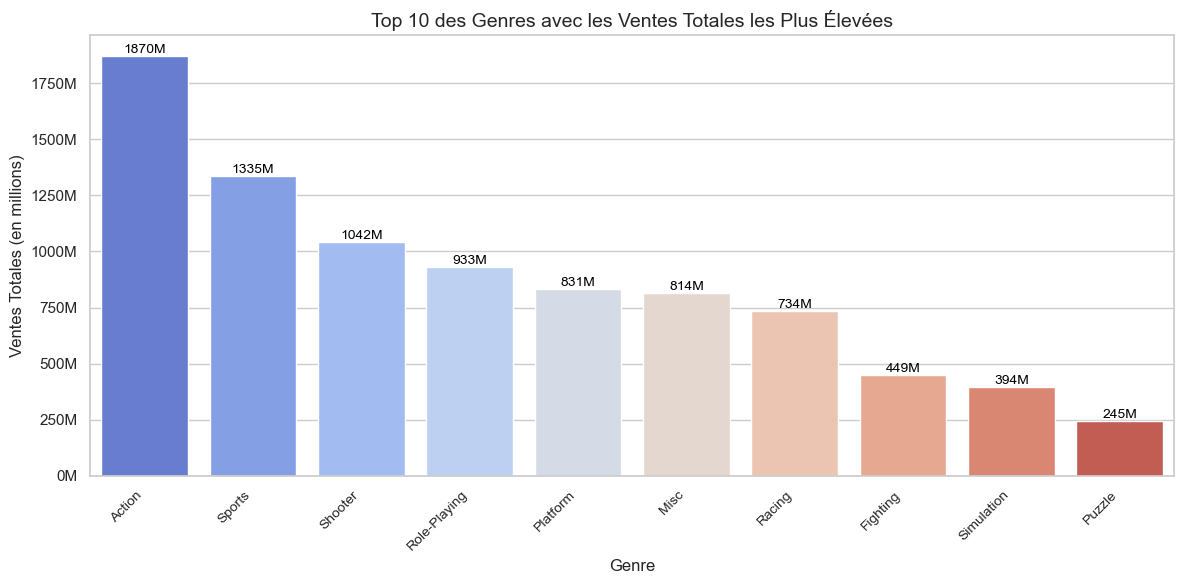

In [439]:
#----------------------------------
# 1. Calculer les ventes totales par genre
#----------------------------------
genre_stats = (
    df_sales_16
    .groupby('genre')
    .agg({'total_sales': 'sum'})
)

#----------------------------------
# 2. Trier les genres par ventes totales et sélectionner
#    les 10 genres les plus vendus
#----------------------------------
top_10_genres_by_sales = (
    genre_stats
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)

#----------------------------------
# 3. Définir une palette de couleurs
#----------------------------------
custom_palette = sns.color_palette("coolwarm", n_colors=len(top_10_genres_by_sales))

#----------------------------------
# 4. Créer le graphique en barres
#----------------------------------
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=top_10_genres_by_sales.reset_index(),
    x='genre',
    y='total_sales',
    palette=custom_palette,
    hue='genre',    # On associe la variable genre à la couleur
    dodge=False,    # Désactive le décalage des barres
    legend=False    # Désactive la légende auto car on n’en a pas forcément besoin ici
)

#----------------------------------
# 5. Ajouter des étiquettes sur chaque barre
#----------------------------------
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[
            f"{round(v.get_height(), 0):.0f}M"  # Formaté comme 'XXM'
            for v in container
        ],
        label_type='edge',  # Étiquettes alignées sur la longueur des barres
        fontsize=10,
        color='black'
    )

#----------------------------------
# 6. Formater l’axe des Y pour afficher les valeurs en millions
#----------------------------------
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:.0f}M')
)

#----------------------------------
# 7. Titres et labels d’axes
#----------------------------------
plt.title('Top 10 des Genres avec les Ventes Totales les Plus Élevées', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Ventes Totales (en millions)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

#----------------------------------
# 8. Ajuster la disposition puis afficher
#----------------------------------
plt.tight_layout()
plt.show()


Les genres "Action," "Sports," et "Shooter" représentent la majorité des ventes totales. 
Cela indique une tendance des joueurs vers des expériences compétitives ou immersives.

Le genre "Action" semble être le plus prometteur pour développer un jeu vidéo triple A.
Son audience large garantit des ventes importantes si le produit est bien conçu.

#### Les genres de jeu les plus publiés en une seule année 

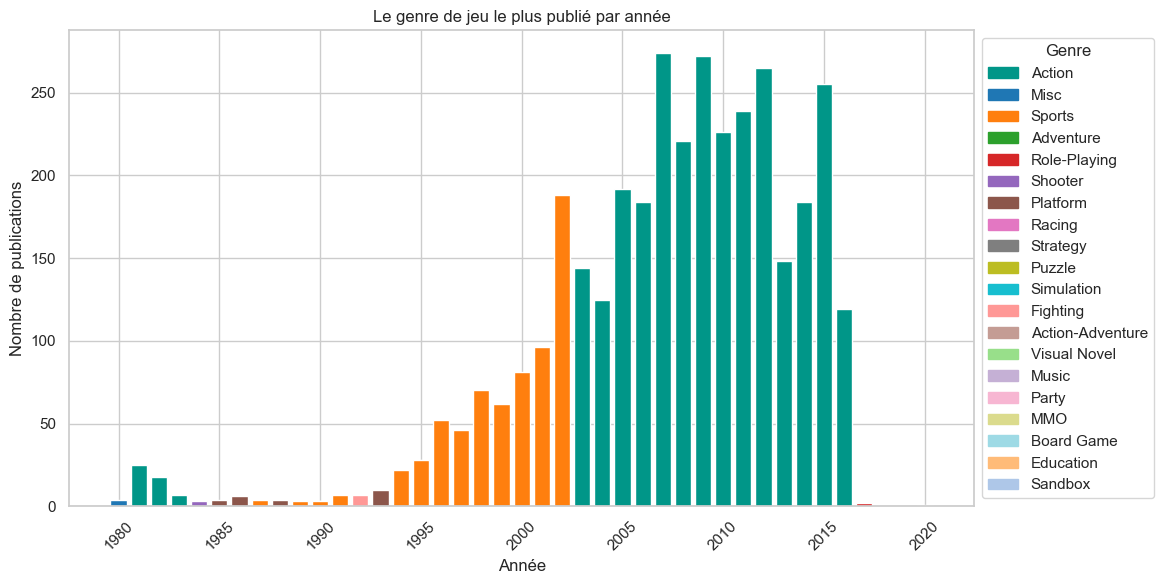

In [440]:
#-----------------------------
# 1. Calcul du nombre de publications par Année et Genre
#-----------------------------
year_count_dx = df_sales_16.groupby(['Year', 'genre'])['title'].count().reset_index()

#-----------------------------
# 2. Sélection des 10 genres les plus publiés (toutes années confondues)
#-----------------------------
top_genres = (
    year_count_dx
    .groupby('genre')['title']
    .sum()
    .nlargest(10)          # On prend les 10 genres ayant le plus grand total de publications
    .index
)

# On filtre year_count_dx pour ne garder que ces 10 genres
year_count_dx = year_count_dx[year_count_dx['genre'].isin(top_genres)]

#-----------------------------
# 3. Pour chaque année, sélectionner le genre qui a le plus de publications
#-----------------------------
# On repère la valeur maximale de 'title' (i.e. le nombre de publications) pour chaque année
year_count = year_count_dx.groupby('Year')['title'].transform('max') == year_count_dx['title']

# On garde uniquement les lignes correspondant à ces valeurs maximales
year_count_max = year_count_dx[year_count].reset_index(drop=True)

#-----------------------------
# 4. Filtrer les années pour lesquelles il existe au moins 1 publication
#-----------------------------
year_count_max = year_count_max[year_count_max['title'] > 0]

#-----------------------------
# 5. Palette de couleurs par genre (personnalisée ou par défaut)
#-----------------------------
genre_colors = {
    'Action': '#009688',            
    'Misc': '#1f77b4',              
    'Sports': '#ff7f0e',            
    'Adventure': '#2ca02c',         
    'Role-Playing': '#d62728',      
    'Shooter': '#9467bd',           
    'Platform': '#8c564b',          
    'Racing': '#e377c2',            
    'Strategy': '#7f7f7f',          
    'Puzzle': '#bcbd22',            
    'Simulation': '#17becf',        
    'Fighting': '#ff9896',          
    'Action-Adventure': '#c49c94',  
    'Visual Novel': '#98df8a',      
    'Music': '#c5b0d5',             
    'Party': '#f7b6d2',             
    'MMO': '#dbdb8d',               
    'Board Game': '#9edae5',        
    'Education': '#ffbb78',         
    'Sandbox': '#aec7e8',           
}

#-----------------------------
# 6. Création de la figure
#-----------------------------
plt.figure(figsize=(10, 6))

# Dessiner les barres avec des couleurs associées au genre
bars = plt.bar(
    year_count_max['Year'], 
    year_count_max['title'], 
    color=[genre_colors.get(genre, '#7f7f7f') for genre in year_count_max['genre']]
)

#-----------------------------
# 8. Personnaliser le graphique
#-----------------------------
plt.xticks(rotation=45)
plt.xlabel("Année")
plt.ylabel("Nombre de publications")
plt.title("Le genre de jeu le plus publié par année")
plt.tight_layout()

#-----------------------------
# 9. Ajouter une légende à droite
#-----------------------------
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in genre_colors.values()]
plt.legend(
    handles, 
    genre_colors.keys(), 
    title="Genre", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

#-----------------------------
# 10. Afficher le graphique
#-----------------------------
plt.show()


Les genres comme Action et Sports dominent certaines périodes.
Cela peut indiquer les tendances de popularité historique, suggérant les genres qui attirent une large audience.
La dominance des genres comme Action et Sports suggère que les joueurs sont attirés par des expériences dynamiques et compétitives.

#### Les genres de jeu les plus vendus en une seule année 

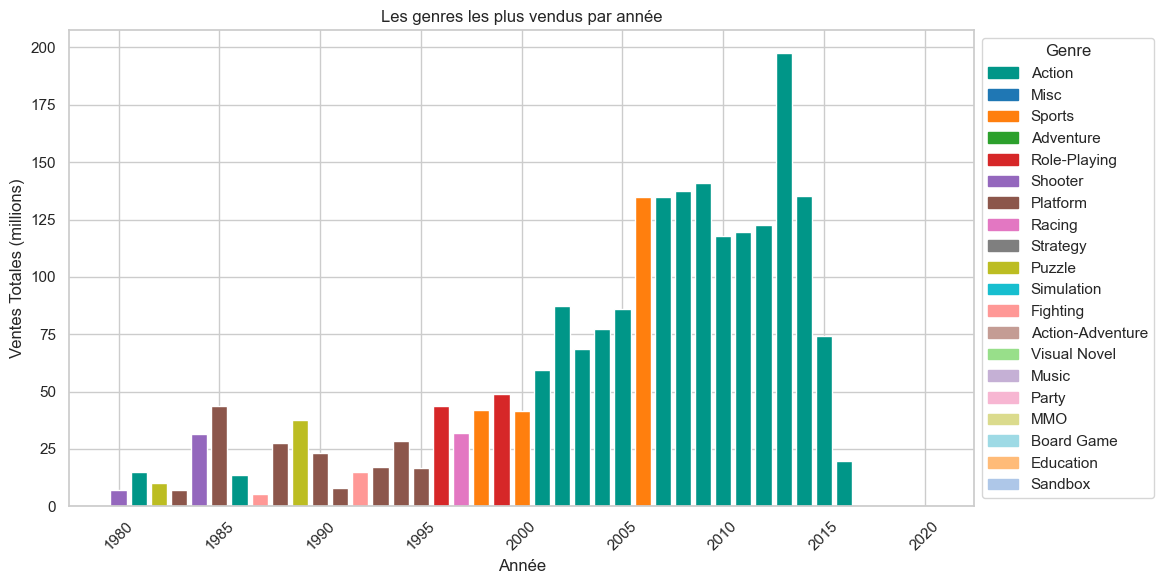

In [441]:
#----------------------------------
# 1. Calculer les ventes totales par Année et Genre
#----------------------------------
year_sale_dx = (
    df_sales_16
    .groupby(by=['Year', 'genre'])['total_sales']
    .sum()
    .reset_index()
)

#----------------------------------
# 2. Filtrer pour les 10 genres les plus vendus 
#----------------------------------
top_genres = (
    year_sale_dx
    .groupby('genre')['total_sales']
    .sum()
    .nlargest(10)   # On prend les 10 genres ayant le plus grand total de ventes
    .index
)
# On filtre year_sale_dx pour ne garder que ces 10 genres
year_sale_dx = year_sale_dx[year_sale_dx['genre'].isin(top_genres)]

#----------------------------------
# 3. Identifier le genre ayant la vente maximale chaque année
#----------------------------------
# On repère la valeur de 'total_sales' la plus élevée pour chaque année
max_per_year = year_sale_dx.groupby('Year')['total_sales'].transform('max')

# Sélectionner les lignes où 'total_sales' == max_per_year
year_sale_max = year_sale_dx[max_per_year == year_sale_dx['total_sales']].reset_index(drop=True)

#----------------------------------
# 4. Filtrer les ventes supérieures à 0
#----------------------------------
year_sale_max = year_sale_max[year_sale_max['total_sales'] > 0]

#----------------------------------
# 5. Définir une palette de couleurs pour chaque genre (dictionnaire)
#----------------------------------
genre_colors = {
    'Action': '#009688',           
    'Misc': '#1f77b4',             
    'Sports': '#ff7f0e',           
    'Adventure': '#2ca02c',        
    'Role-Playing': '#d62728',     
    'Shooter': '#9467bd',          
    'Platform': '#8c564b',         
    'Racing': '#e377c2',           
    'Strategy': '#7f7f7f',         
    'Puzzle': '#bcbd22',           
    'Simulation': '#17becf',       
    'Fighting': '#ff9896',         
    'Action-Adventure': '#c49c94',
    'Visual Novel': '#98df8a',     
    'Music': '#c5b0d5',            
    'Party': '#f7b6d2',            
    'MMO': '#dbdb8d',              
    'Board Game': '#9edae5',       
    'Education': '#ffbb78',        
    'Sandbox': '#aec7e8',          
   
}

#----------------------------------
# 6. Création du graphique
#----------------------------------
plt.figure(figsize=(10, 6))

# Tracer les barres pour chaque (Année, Genre max)
bars = plt.bar(
    year_sale_max['Year'], 
    year_sale_max['total_sales'],
    color=[genre_colors.get(g, '#7f7f7f') for g in year_sale_max['genre']]
)

#----------------------------------
# 7. Ajouter des étiquettes au-dessus de chaque barre
#----------------------------------
# for bar, row in zip(bars, year_sale_max.itertuples()):
#     x = bar.get_x() + bar.get_width() / 2
#     y = bar.get_height() + 0.5
#     # Affichage formaté : Genre - ventes arrondies + 'M'
#     plt.text(
#         x, y,
#         f"{row.genre} - {round(row.total_sales):,}M",
#         ha='center',  # Centre horizontal
#         va='bottom',  # Écrit au-dessus de la barre
#         rotation=90,  # Texte en vertical
#         fontsize=8
#     )

#----------------------------------
# 8. Personnaliser les axes et le titre
#----------------------------------
plt.xticks(rotation=45)
plt.xlabel("Année")
plt.ylabel("Ventes Totales (millions)")
plt.title("Les genres les plus vendus par année")
plt.tight_layout()

#----------------------------------
# 9. Ajouter une légende à l’extérieur du graphique
#----------------------------------
# On crée une "handle" (petit carré) pour chaque couleur du dictionnaire
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in genre_colors.values()]
plt.legend(
    handles, 
    genre_colors.keys(),
    title="Genre",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

#----------------------------------
# 10. Afficher le graphique
#----------------------------------
plt.show()



Genres dominants :

Action (vert foncé) : Le genre Action devient dominant après 2000, avec une très forte progression, culminant autour de 2005-2010.
Sports (orange) : Ce genre montre un pic significatif dans les mêmes années, rivalisant avec Action en termes de ventes totales.


Conclusion :

Ce graphique met en évidence l'évolution de l'industrie des jeux vidéo et des préférences des consommateurs. Les genres Action et Sports dominent clairement les ventes, en particulier dans la période de forte croissance des années 2000. La diversification des genres reste néanmoins une constante, même si certains types de jeux (comme les Platform et Puzzle) sont devenus moins populaires avec le temps.

#### Analysez les préférences de genres dans différentes régions

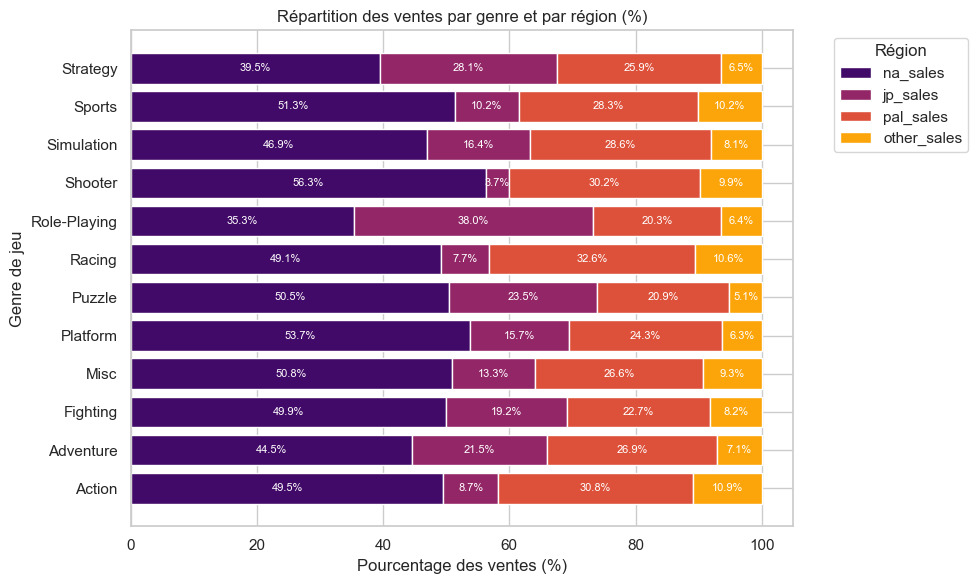

In [442]:
# calcule des ventes totales par région
#----------------------------------
# 1. Regrouper les données par genre et calculer les ventes totales par région
#----------------------------------
genre_sales = df_sales_16.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

#----------------------------------
# 2. Normaliser les données pour obtenir des pourcentages
#   On divise chaque ligne par la somme totale de ses ventes,
#   puis on multiplie par 100 pour obtenir un pourcentage.
#----------------------------------
genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

#----------------------------------
# 3. Définir une palette de couleurs
#----------------------------------
colors = sns.color_palette("inferno", n_colors=4)

#----------------------------------
# 4. Préparer la figure et les variables
#----------------------------------
plt.figure(figsize=(10, 6))

genres = genre_sales_normalized.index       # Noms des genres (axe Y)
regions = genre_sales_normalized.columns    # Régions : na_sales, jp_sales, etc.

# On crée un tableau de zéros servant de "base" pour empiler les barres
bottom = np.zeros(len(genres))

#----------------------------------
# 5. Tracer des barres empilées horizontalement
#----------------------------------
for i, region in enumerate(regions):
    plt.barh(
        y=genres,
        width=genre_sales_normalized[region],
        left=bottom,
        color=colors[i],
        label=region
    )
    # On met à jour "bottom" pour la prochaine région
    bottom += genre_sales_normalized[region].values

#----------------------------------
# 6. Ajouter des étiquettes (pourcentages) au milieu de chaque portion
#----------------------------------
for i, region in enumerate(regions):
    for j, val in enumerate(genre_sales_normalized[region]):
        if val > 0:  # Éviter d'ajouter des étiquettes pour des valeurs 0
            # Calculer la position horizontale du texte : 
            # la somme des barres précédentes + la moitié de la barre courante
            left_val = genre_sales_normalized[regions[:i]].iloc[j].sum() if i > 0 else 0
            plt.text(
                x=left_val + val / 2,   # Position horizontale (moitié de la barre)
                y=j,                    # Position verticale (index du genre)
                s=f'{val:.1f}%',       # Étiquette, format xx.x%
                ha='center',
                va='center',
                color='white',
                fontsize=8
            )

#----------------------------------
# 7. Personnaliser les axes et le titre
#----------------------------------
plt.xlabel('Pourcentage des ventes (%)')
plt.ylabel('Genre de jeu')
plt.title('Répartition des ventes par genre et par région (%)')

#----------------------------------
# 8. Ajouter une légende
#----------------------------------
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

#----------------------------------
# 9. Afficher le graphique
#----------------------------------
plt.show()


Répartition par régions :

NA (Amérique du Nord) : Cette région domine la plupart des genres, notamment pour les ventes de jeux d'action, de sport et de tir (Shooter). Cela indique un marché très actif pour ces catégories en Amérique du Nord.

JP (Japon) :Le Japon a une contribution notable dans les genres comme les jeux de rôle (Role-Playing), où il dépasse toutes les autres régions. Cela reflète la popularité des RPGs au Japon.

PAL (Europe, Australie, etc.) : Cette région montre une répartition équilibrée, mais n'est pas majoritaire dans aucun genre.

Other (autres régions) : Cette catégorie est la plus petite contribution, indiquant que les ventes hors des grandes régions sont marginales.

Genres dominants :

Les jeux d'action, de sport, et de tir (Shooter) ont une répartition très élevée en NA.
Les jeux de rôle (Role-Playing) se démarquent par leur forte proportion au Japon.
Des genres comme Puzzle ou Misc (divers) montrent une répartition plus équilibrée, sans domination d'une région spécifique.

Observations spécifiques :

Le genre Shooter a la plus forte dominance régionale en NA, avec environ 56,3 % des ventes venant de cette région.
Le Japon est largement en tête dans les jeux Role-Playing avec 38 % des ventes, ce qui est unique comparé à d'autres genres.
Les jeux de stratégie et de simulation ont une répartition assez équilibrée entre NA et PAL, sans région particulièrement dominante.

Conclusion :
Le graphique montre clairement des préférences régionales pour différents genres de jeux. Les jeux d'action et de tir (Shooter) dominent en Amérique du Nord et les régions PAL (EU), tandis que les jeux de rôle sont plus populaires au Japon. 

### Analyse des platformes

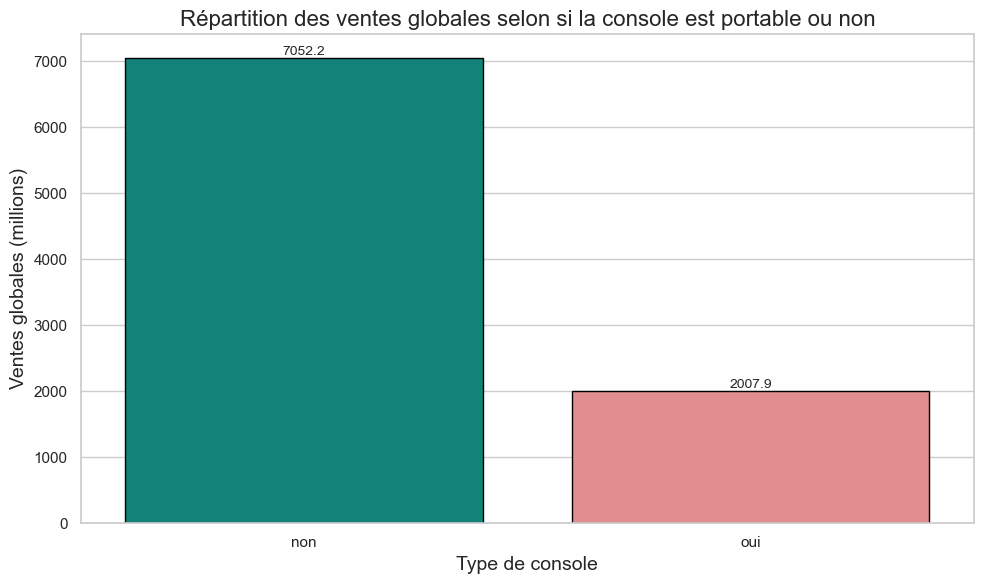

In [443]:
# Répartition des ventes globales selon si la console est portable ou non
#----------------------------------
# 1. Regrouper les ventes totales par type de console (Portable ou Non Portable)
#----------------------------------
ventes_portable = (
    df_sales_16
    .groupby('Portable')['total_sales']
    .sum()
    .reset_index()
)

#----------------------------------
# 2. Ajouter des étiquettes pour clarifier les catégories
#----------------------------------
ventes_portable['Portable'] = ventes_portable['Portable'].replace({0: 'Non Portable', 1: 'Portable'})

#----------------------------------
# 3. Trier les données par ventes décroissantes
#----------------------------------
ventes_portable = ventes_portable.sort_values(by='total_sales', ascending=False)

#----------------------------------
# 4. Créer la figure
#----------------------------------
plt.figure(figsize=(10, 6))

#----------------------------------
# 5. Créer un graphique en barres
#----------------------------------
ax = sns.barplot(
    x="Portable",
    y="total_sales",
    data=ventes_portable,
    hue="Portable",       # Spécifie que les couleurs sont basées sur la colonne Portable 
    palette=['#009688', 'lightcoral'],  # Palette personnalisée
    dodge=False,           # Évite de séparer les barres si hue est utilisé
    edgecolor="black",
    legend=False           # Supprime la légende automatique  
)

#----------------------------------
# 6. Ajouter des annotations au-dessus des barres
#----------------------------------
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f", label_type='edge', fontsize=10)

#----------------------------------
# 7. Ajouter des titres et labels
#----------------------------------
plt.title("Répartition des ventes globales selon si la console est portable ou non", fontsize=16)
plt.xlabel("Type de console", fontsize=14)
plt.ylabel("Ventes globales (millions)", fontsize=14)

#----------------------------------
# 8. Ajuster la mise en page et afficher
#----------------------------------
plt.tight_layout()
plt.show()


Les consoles non portables dominent clairement en termes de ventes globales grâce à leur offre diversifiée, leurs performances techniques, 
et leur adaptation aux expériences de jeu plus longues et immersives.

Les consoles portables, bien que moins performantes en volume, restent populaires pour leur accessibilité et leur capacité à toucher un public 
différent, notamment les jeunes joueurs ou ceux en déplacement.
    
Les données montrent une nette préférence des consommateurs pour les consoles non portables, mais les consoles portables ont tout de même un marché 
de niche solide.
    
Cela met en évidence deux segments de marché distincts avec des besoins et des usages spécifiques.

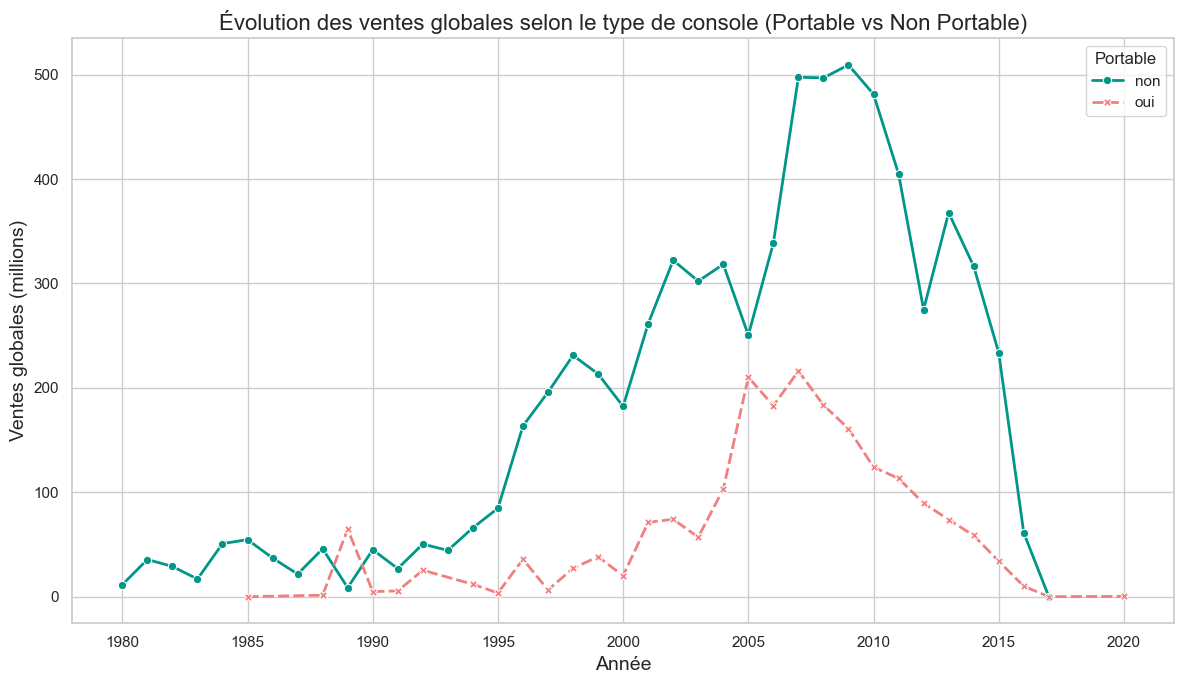

In [444]:
# Évolution des ventes globales selon le type de console (Portable vs Non Portable)
# ----------------------------------
# 1. Regrouper les ventes totales par type de console et par année
# ----------------------------------
ventes_par_annee = (
    df_sales_16
    .groupby(['Year', 'Portable'])['total_sales']
    .sum()
    .reset_index()
)

# ----------------------------------
# 2. Ajouter des étiquettes pour clarifier les catégories
# ----------------------------------
ventes_par_annee['Portable'] = ventes_par_annee['Portable'].replace({0: 'Non Portable', 1: 'Portable'})

# ----------------------------------
# 3. Trier les données par année pour avoir l'évolution correcte
# ----------------------------------
ventes_par_annee = ventes_par_annee.sort_values(by='Year')

# ----------------------------------
# 4. Créer la figure
# ----------------------------------
plt.figure(figsize=(12, 7))

# ----------------------------------
# 5. Créer un graphique en lignes pour visualiser l'évolution des ventes
# ----------------------------------
sns.lineplot(
    data=ventes_par_annee,
    x='Year',
    y='total_sales',
    hue='Portable',  # Spécifie que les couleurs sont basées sur le type de console
    style='Portable', # Utilise des styles différents pour Portable et Non Portable
    markers=True,      # Affiche des marqueurs pour chaque point de vente
    palette=['#009688', 'lightcoral'],  # Palette personnalisée
    linewidth=2
)

# ----------------------------------
# 6. Ajouter des titres et labels
# ----------------------------------
plt.title("Évolution des ventes globales selon le type de console (Portable vs Non Portable)", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Ventes globales (millions)", fontsize=14)

# ----------------------------------
# 7. Ajuster la mise en page et afficher
# ----------------------------------
plt.tight_layout()
plt.show()


Ce graphique montre que les consoles non portables ont largement dominé les ventes globales, avec un pic entre 2005 et 2010 dépassant les 500 millions d’unités. Les consoles portables ont connu leur meilleur moment entre 2005 et 2008, avant un déclin parallèle. Depuis 2015, les ventes chutent pour les deux types, marquant la transition vers d'autres formats (cloud gaming, jeux mobiles).

#### ventes totales par plateforme

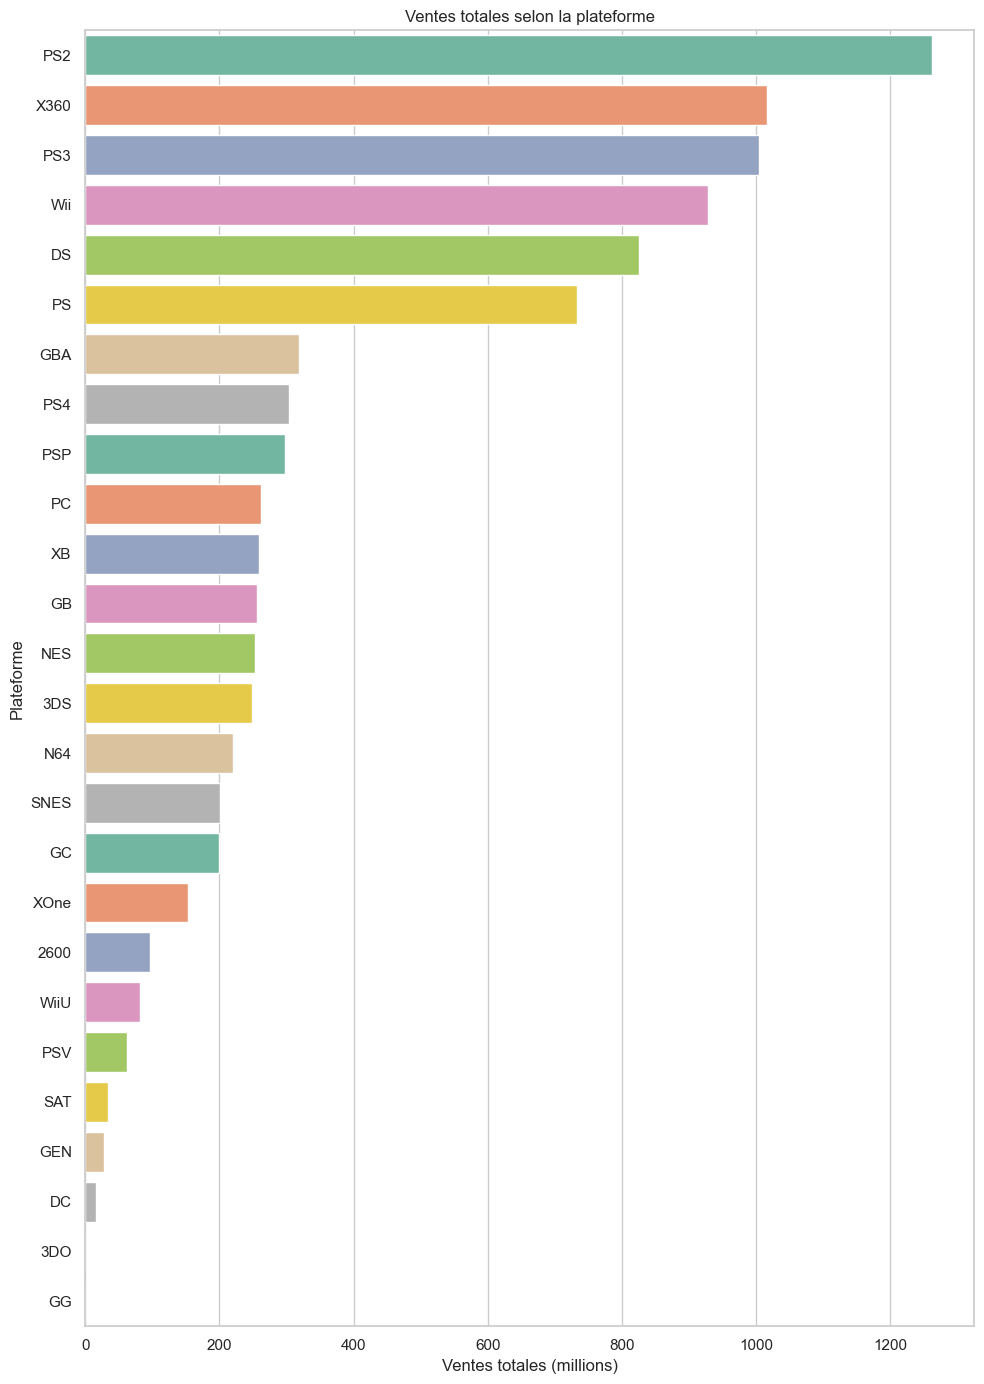

In [445]:
#----------------------------------
# 1. Calcul des ventes totales par plateforme
#----------------------------------
total_sales_per_console = (
    df_sales_16
    .groupby('console')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

#----------------------------------
# 2. Convertir la Series en DataFrame pour pouvoir utiliser 'hue'
#----------------------------------
total_sales_df = total_sales_per_console.reset_index()
total_sales_df.columns = ['console', 'total_sales']

#----------------------------------
# 3. Tracer un graphique en barres
#----------------------------------
plt.figure(figsize=(10, 14))

sns.barplot(
    data=total_sales_df, 
    x='total_sales', 
    y='console', 
    hue='console',     # Affecte une couleur différente pour chaque console
    palette='Set2',    
    dodge=False,       # Barres non décalées
    legend=False       # Pas de légende
)

#----------------------------------
# 4. Personnaliser les axes et le titre
#----------------------------------
plt.xlabel('Ventes totales (millions)')
plt.ylabel('Plateforme')
plt.title('Ventes totales selon la plateforme')

#----------------------------------
# 5. Ajuster la mise en page et afficher
#----------------------------------
plt.tight_layout()
plt.show()


### Analyse des éditeurs

#### Les éditeurs ayant le plus de publications et leurs performances de vente

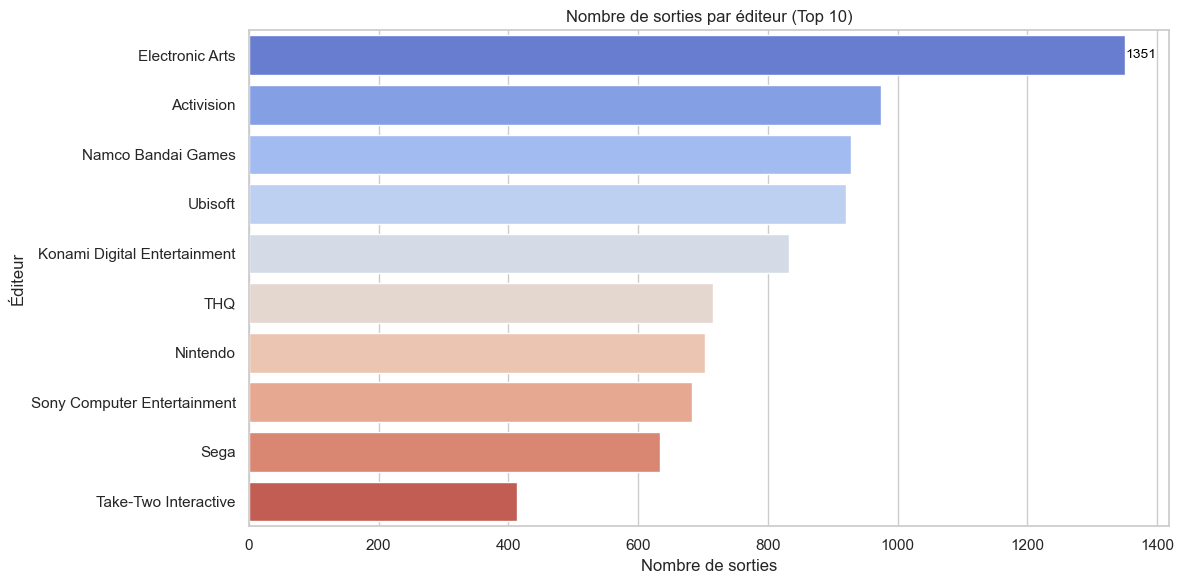

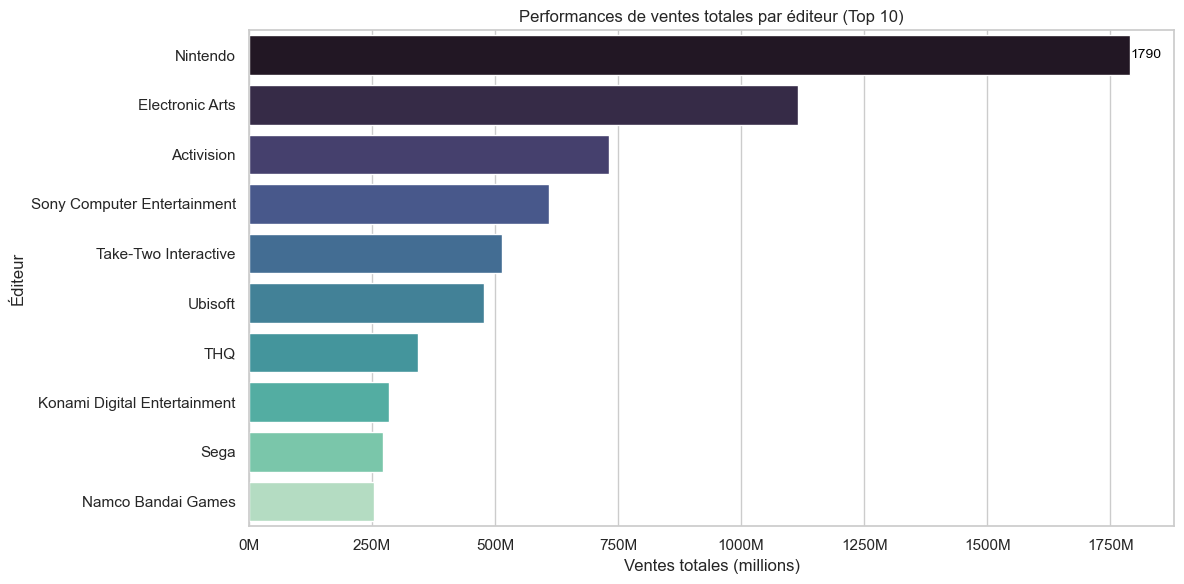

In [446]:
#----------------------------------
# 1. Calculer le nombre de titres et les ventes totales par éditeur
#----------------------------------
publisher_stats = (
    df_sales_16
    .groupby('publisher')
    .agg({
        'title': 'count',        # Nombre de titres (jeux) publiés
        'total_sales': 'sum'     # Somme des ventes totales
    })
    .reset_index()
)

#----------------------------------
# 2. Sélectionner les éditeurs Top 10 en nombre de publications
#----------------------------------
sorted_publishers_by_num = (
    publisher_stats
    .sort_values(by='title', ascending=False)
    .head(10)
)

#----------------------------------
# 3. Sélectionner les éditeurs Top 10 en ventes totales
#----------------------------------
sorted_publishers_by_sales = (
    publisher_stats
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)

#----------------------------------
# 4. Graphique : Nombre de publications par éditeur (Top 10)
#----------------------------------
# Définir une palette de couleurs
palette_num = sns.color_palette("coolwarm", n_colors=len(sorted_publishers_by_num))

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='title', 
    y='publisher', 
    data=sorted_publishers_by_num, 
    hue='publisher',
    palette=palette_num,
    dodge=False,    # Barres non décalées
    legend=False    # Pas de légende multiple
)

# Ajouter des étiquettes (nombre de sorties) sur chaque barre
ax.bar_label(
    ax.containers[0], 
    label_type='edge', 
    fontsize=10, 
    color='black',
    fmt='%.0f'  # Format sans décimale (ex: 12, 34, etc.)
)

plt.title("Nombre de sorties par éditeur (Top 10)")
plt.xlabel("Nombre de sorties")
plt.ylabel("Éditeur")
plt.tight_layout()
plt.show()

#----------------------------------
# 5. Graphique : Performances de ventes totales par éditeur (Top 10)
#----------------------------------
palette_sales = sns.color_palette("mako", n_colors=len(sorted_publishers_by_sales))

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='total_sales', 
    y='publisher', 
    data=sorted_publishers_by_sales, 
    hue='publisher',
    palette=palette_sales,
    dodge=False,
    legend=False
)

# Ajouter des étiquettes (ventes) sur chaque barre
ax.bar_label(
    ax.containers[0],
    label_type='edge',
    fontsize=10,
    color='black',
    fmt='%.0f'  # Format sans décimale (ex: 50M, 100M, etc., voir plus bas pour suffixe)
)

# Formater l'axe X pour afficher les ventes en millions (ex: 50M, 100M)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title("Performances de ventes totales par éditeur (Top 10)")
plt.xlabel("Ventes totales (millions)")
plt.ylabel("Éditeur")
plt.tight_layout()
plt.show()


###  Analyse des ventes

#### Ventes totales par région

In [447]:
# Ventes totales par région
#----------------------------------
# 1. Sélectionner les colonnes de ventes régionales
#----------------------------------
top_sale_reg = df_sales_16[['na_sales', 'pal_sales', 'jp_sales', 'other_sales']]

#----------------------------------
# 2. Calculer la somme des ventes par région
#   .sum() va additionner chaque colonne.
#   On obtient ainsi une Series dont l'index correspond
#   aux noms des colonnes (na_sales, pal_sales, etc.)
#----------------------------------
top_sale_reg = top_sale_reg.sum().reset_index()

#----------------------------------
# 3. Renommer les colonnes pour plus de clarté
#   "index" devient "region"
#   et la colonne 0 (valeurs de la Series) devient "sales"
#----------------------------------
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sales"})

#----------------------------------
# 4. Afficher le résultat
#----------------------------------
print(top_sale_reg)


        region    sales
0     na_sales  4454.82
1    pal_sales  2490.09
2     jp_sales  1295.84
3  other_sales   817.27


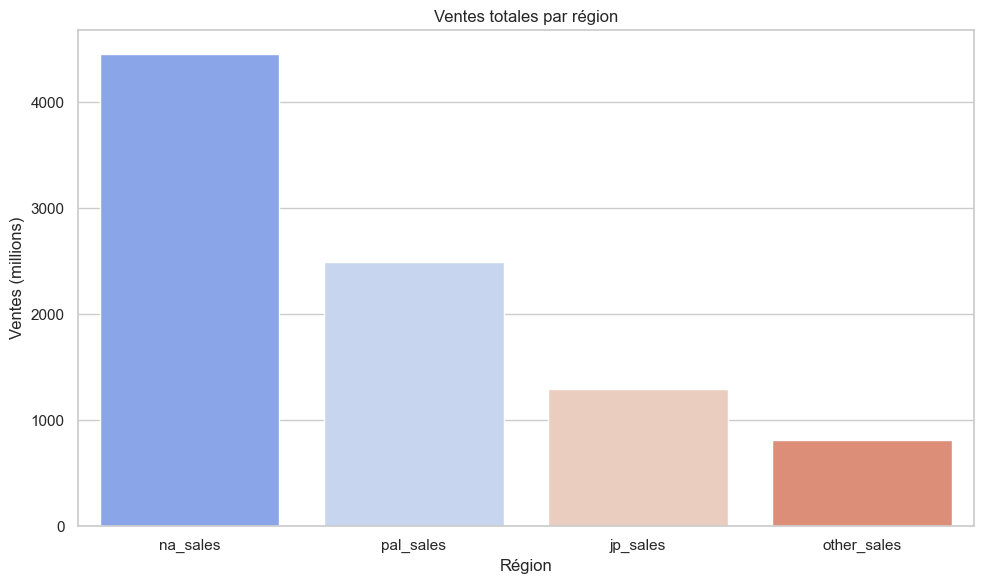

In [448]:
#----------------------------------
# 1. Création du graphique
#----------------------------------
plt.figure(figsize=(10, 6))

# On trace un barplot avec l’axe X = region, l’axe Y = sales
# hue='region' permet d’avoir des couleurs différentes pour chaque région
sns.barplot(
    x='region',
    y='sales',
    data=top_sale_reg,
    hue='region',
    palette='coolwarm',
    legend=False  # Désactive la légende automatique
)

#----------------------------------
# 2. Ajouter des titres et labels
#----------------------------------
plt.title("Ventes totales par région")
plt.xlabel("Région")
plt.ylabel("Ventes (millions)")

#----------------------------------
# 3. Afficher le graphique
#----------------------------------
plt.tight_layout()
plt.show()


Ce graphique montre que la région Amérique du Nord (na_sales) domine largement les ventes mondiales de jeux vidéo, dépassant les 4 000 millions. L’Europe (pal_sales) suit avec environ 2 500 millions, tandis que le Japon (jp_sales) et les autres régions affichent des ventes nettement inférieures. Cela souligne l’importance stratégique du marché nord-américain dans l’industrie.

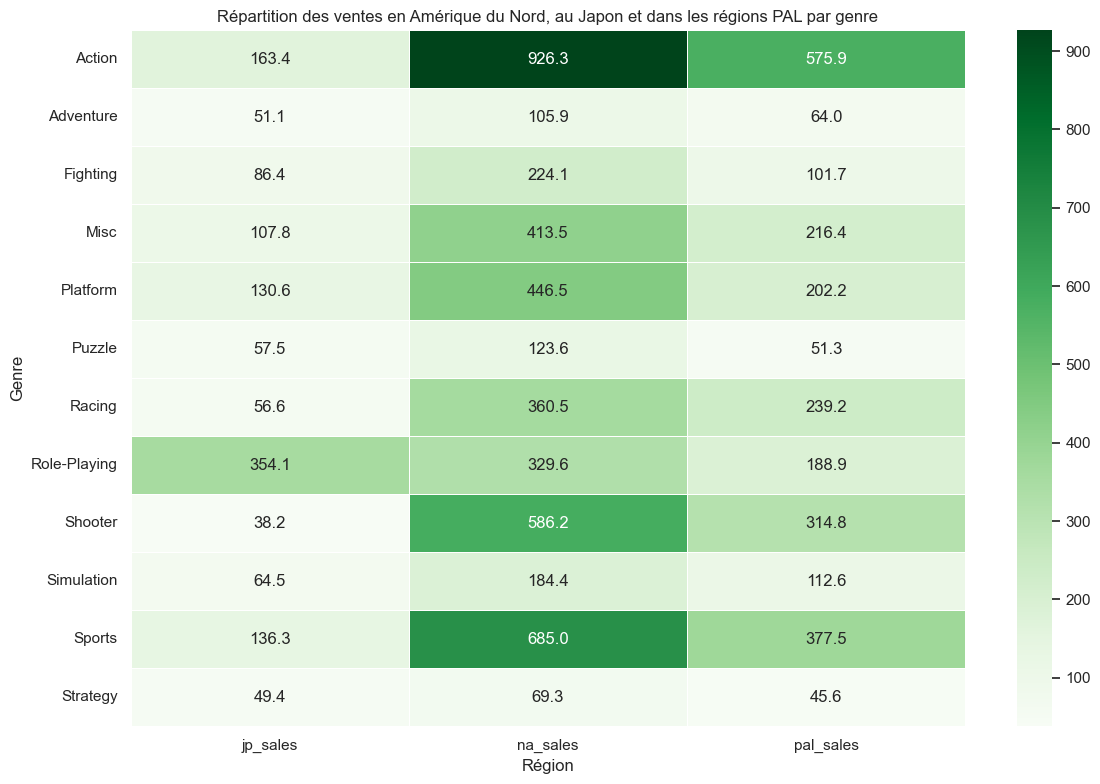

In [449]:
# Examinez la répartition des ventes en Amérique du Nord, au Japon et dans les régions PAL
#----------------------------------
# 1. Extraire les données nécessaires depuis df_sales_16
#----------------------------------
sales_data = df_sales_16[['genre', 'na_sales', 'jp_sales', 'pal_sales']]

#----------------------------------
# 2. Transformer le DataFrame en format long (melt)
#   - id_vars='genre' => on conserve la colonne 'genre'
#   - var_name='region' => nom de la variable contenant la région
#   - value_name='sales' => nom de la variable contenant le volume de ventes
#----------------------------------
sales_data_melted = sales_data.melt(
    id_vars='genre',
    var_name='region',
    value_name='sales'
)

#----------------------------------
# 3. Agréger les ventes par genre et région pour éviter les doublons
#----------------------------------
sales_agg = (
    sales_data_melted
    .groupby(['genre', 'region'], as_index=False)['sales']
    .sum()
)

#----------------------------------
# 4. Créer un tableau croisé (pivot) pour la heatmap
#   - index='genre' => les genres formeront les lignes
#   - columns='region' => les régions formeront les colonnes
#   - values='sales' => chaque cellule contient la somme des ventes
#----------------------------------
sales_pivot = sales_agg.pivot(
    index='genre',
    columns='region',
    values='sales'
)

#----------------------------------
# 5. Tracer la heatmap
#----------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(
    sales_pivot,
    cmap='Greens',      # Palette de couleurs
    annot=True,          # Afficher la valeur numérique dans chaque cellule
    fmt='.1f',           # Format des nombres (1 décimale)
    linewidths=.5        # Espacement entre les cellules
)

plt.title("Répartition des ventes en Amérique du Nord, au Japon et dans les régions PAL par genre")
plt.xlabel("Région")
plt.ylabel("Genre")

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()


Action, Shooter et Sport dominent la région NA (Amérique) et les régions PAL, tandis que les genres RPG et Action dominent au Japon.

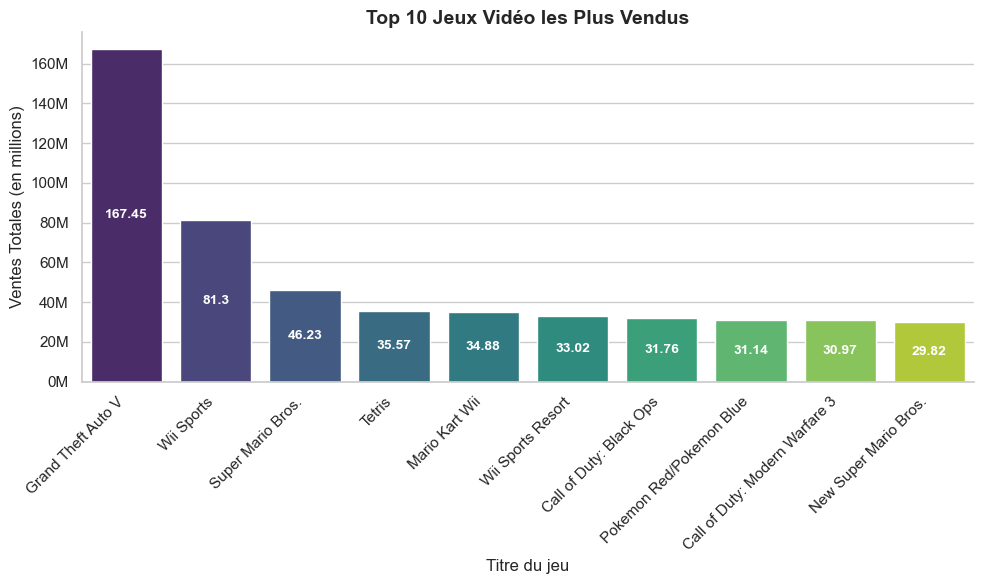

In [450]:
#-----------------------------
# 1. Identifier les 10 jeux les plus vendus
#-----------------------------
top_selling_games = (
    df_sales_16
    .groupby('title')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

#-----------------------------
# 2. Créer la figure
#-----------------------------
plt.figure(figsize=(10, 6))

#-----------------------------
# 3. Tracer un diagramme en barres
#   - x = titre du jeu
#   - y = ventes totales
#   - Utiliser hue pour forcer des couleurs distinctes
#-----------------------------
ax = sns.barplot(
    x=top_selling_games.index,
    y=top_selling_games.values,
    hue=top_selling_games.index,  # Utilise les titres comme légende de couleurs
    palette='viridis',
    legend=False                  # Désactiver la légende (inutile avec hue=index)
)

#-----------------------------
# 4. Ajouter des étiquettes de données (bar_label)
#   - Les étiquettes sont placées au centre des barres
#-----------------------------
for container in ax.containers:
    ax.bar_label(
        container,
        label_type='center',  # Étiquettes au centre
        fontsize=10,
        color='white',
        weight='bold'
    )

#-----------------------------
# 5. Formater l'axe Y (vente en millions)
#-----------------------------
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:.0f}M')
)

#-----------------------------
# 6. Personnaliser les axes et le titre
#-----------------------------
plt.title("Top 10 Jeux Vidéo les Plus Vendus", fontsize=14, weight='bold')
plt.xlabel("Titre du jeu", fontsize=12)
plt.ylabel("Ventes Totales (en millions)", fontsize=12)

# Faire pivoter les titres de jeux sur l'axe X
plt.xticks(rotation=45, ha='right')

#-----------------------------
# 7. Optionnel : supprimer les bordures supérieures et droites
#-----------------------------
sns.despine()

#-----------------------------
# 8. Ajuster la mise en page et afficher
#-----------------------------
plt.tight_layout()
plt.show()


Ce graphique met en évidence le succès phénoménal de Grand Theft Auto V, qui domine largement avec 167,45 millions de ventes, loin devant les autres titres. Wii Sports suit avec 81,3 millions, grâce à sa distribution en bundle avec la console. Le reste du top 10 est composé de classiques Nintendo et de titres populaires comme Call of Duty et Tetris, tous oscillant entre 30 et 46 millions. Cela illustre l’impact des jeux multi-plateformes et des franchises emblématiques sur les ventes mondiales.

### Analyse des Constructeurs

In [451]:
constructeurs = df_sales_16['Constructeur'].value_counts()
constructeurs

Constructeur
Sony         6628
Nintendo     6272
Microsoft    2296
PC            960
Saturne       173
Atari         133
Dreamcast      52
Sega           27
3DO             3
Game Gear       1
Name: count, dtype: int64

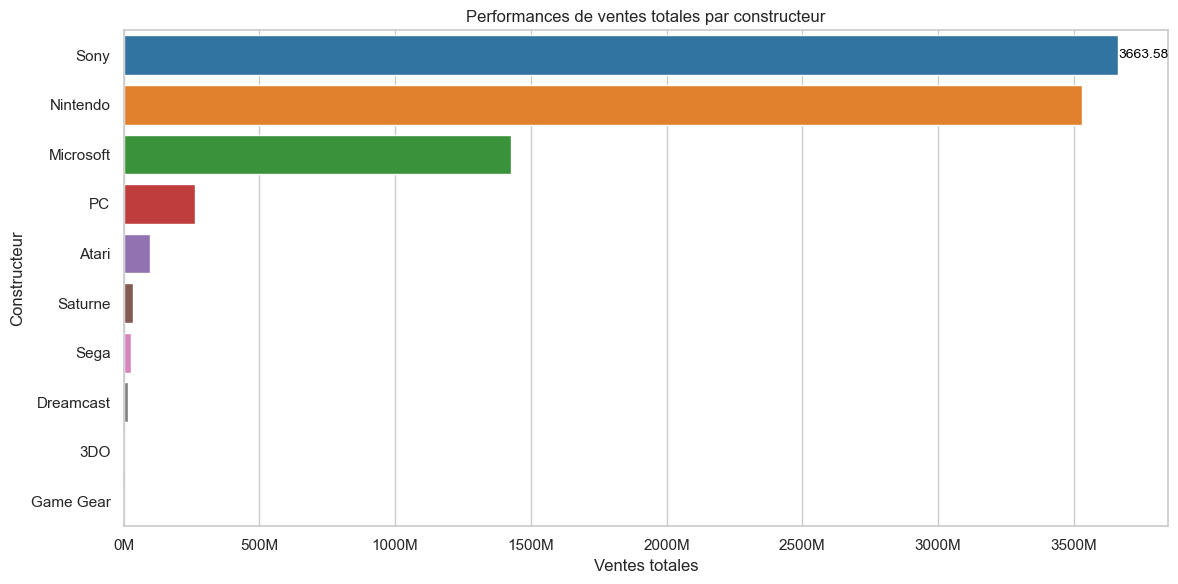

In [452]:
# Performances de ventes totales par constructeur
#----------------------------------
# 1. Agréger les ventes totales par constructeur
#   et trier selon l'ordre décroissant
#----------------------------------
sorted_constructors_by_sales = (
    df_sales_16
    .groupby('Constructeur', as_index=False)['total_sales']
    .sum()
    .sort_values(by='total_sales', ascending=False)
)

#----------------------------------
# 2. Créer la palette de couleurs (personnalisée)
#   Vous pouvez ajuster le nombre de couleurs selon vos besoins
#----------------------------------
palette_sales = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
]

#----------------------------------
# 3. Tracer le diagramme en barres
#   - x = total_sales (ventes), y = Constructeur
#   - On utilise hue='Constructeur' pour colorer chaque barre différemment
#----------------------------------
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='total_sales', 
    y='Constructeur', 
    data=sorted_constructors_by_sales,  
    hue='Constructeur', 
    palette=palette_sales, 
    dodge=False, 
    legend=False
)

#----------------------------------
# 4. Ajouter des étiquettes sur les barres (valeurs de ventes)
#   - label_type='edge' => étiquettes en bout de barre
#----------------------------------
ax.bar_label(
    ax.containers[0],
    label_type='edge',
    fontsize=10,
    color='black'
)

#----------------------------------
# 5. Formater l'axe X pour afficher les ventes en millions ("M")
#----------------------------------
plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:.0f}M')
)

#----------------------------------
# 6. Ajouter un titre et nommer les axes
#----------------------------------
plt.title("Performances de ventes totales par constructeur")
plt.xlabel("Ventes totales")
plt.ylabel("Constructeur")

#----------------------------------
# 7. Ajuster la mise en page et afficher
#----------------------------------
plt.tight_layout()
plt.show()


Ce graphique montre que Sony domine le marché avec plus de 3,6 milliards de ventes, suivi de près par Nintendo, également au-dessus des 3,5 milliards. Microsoft arrive en troisième position avec environ 1,4 milliard, tandis que les autres constructeurs (PC, Atari, Sega, etc.) affichent des performances bien moindres. Cela confirme que le marché est ultra-concentré autour des trois grands acteurs historiques du secteur.

## Analyse des constructeurs actuels (2014-2016)

In [453]:
# Analyse des Constructeurs actuels

#----------------------------------
# 1. Définir la période et les constructeurs d'intérêt
#----------------------------------
constructeurs_interesses = ['Nintendo', 'Sony', 'Microsoft']

#----------------------------------
# 2. Filtrer les données de 2014 à 2016 pour les constructeurs sélectionnés
#----------------------------------
df_console_constru = df_sales_16[
    (df_sales_16['Year'] >= 2014) &
    (df_sales_16['Year'] <= 2016) &
    (df_sales_16['Constructeur'].isin(constructeurs_interesses))
].copy()  # .copy() pour éviter le SettingWithCopyWarning


#----------------------------------
# 5. Afficher les premières lignes du DataFrame résultant
#----------------------------------
df_console_constru.head(2)


Rank                      title console  Year    genre  \
34    34  Call of Duty: Black Ops 3     PS4  2015  Shooter   
42    45         Grand Theft Auto V     PS4  2014   Action   

               publisher Constructeur Portable  na_sales  pal_sales  jp_sales  \
34            Activision         Sony      non      5.77       5.58      0.34   
42  Take-Two Interactive         Sony      non     11.84      18.10      0.95   

    other_sales  total_sales  
34         2.24        13.93  
42         6.06        36.94

In [454]:
df_console_constru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1398 entries, 34 to 16537
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          1398 non-null   int64  
 1   title         1398 non-null   object 
 2   console       1398 non-null   object 
 3   Year          1398 non-null   int32  
 4   genre         1398 non-null   object 
 5   publisher     1398 non-null   object 
 6   Constructeur  1398 non-null   object 
 7   Portable      1398 non-null   object 
 8   na_sales      1398 non-null   float64
 9   pal_sales     1398 non-null   float64
 10  jp_sales      1398 non-null   float64
 11  other_sales   1398 non-null   float64
 12  total_sales   1398 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 147.4+ KB


In [455]:
# Vérifier et traiter les valeurs manquantes
df_console_constru.isnull().sum()

Rank            0
title           0
console         0
Year            0
genre           0
publisher       0
Constructeur    0
Portable        0
na_sales        0
pal_sales       0
jp_sales        0
other_sales     0
total_sales     0
dtype: int64

In [456]:
df_console_constru.head(2)

Rank                      title console  Year    genre  \
34    34  Call of Duty: Black Ops 3     PS4  2015  Shooter   
42    45         Grand Theft Auto V     PS4  2014   Action   

               publisher Constructeur Portable  na_sales  pal_sales  jp_sales  \
34            Activision         Sony      non      5.77       5.58      0.34   
42  Take-Two Interactive         Sony      non     11.84      18.10      0.95   

    other_sales  total_sales  
34         2.24        13.93  
42         6.06        36.94

#### Analyse des genres a partir de 2014

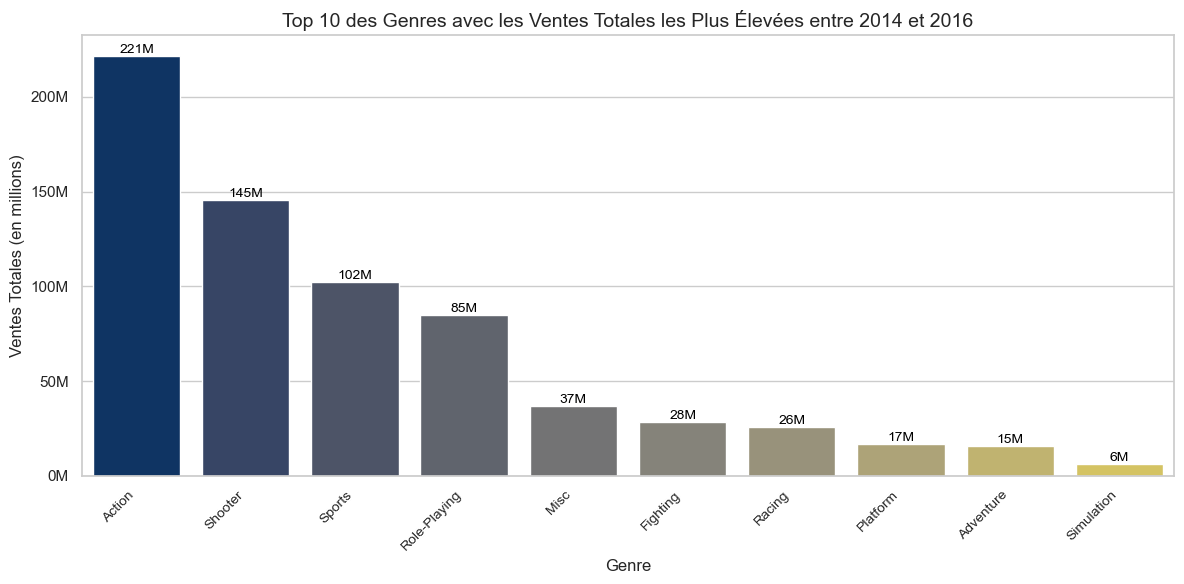

In [457]:
#----------------------------------
# 1. Calculer les ventes totales par genre
#----------------------------------
genre_stats = (
    df_console_constru
    .groupby('genre')
    .agg({'total_sales': 'sum'})
)

#----------------------------------
# 2. Trier les genres par ventes totales et sélectionner
#    les 10 genres les plus vendus
#----------------------------------
top_10_genres_by_sales = (
    genre_stats
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)

#----------------------------------
# 3. Définir une palette de couleurs
#----------------------------------
custom_palette = sns.color_palette("cividis", n_colors=len(top_10_genres_by_sales))

#----------------------------------
# 4. Créer le graphique en barres
#----------------------------------
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=top_10_genres_by_sales.reset_index(),
    x='genre',
    y='total_sales',
    palette=custom_palette,
    hue='genre',    # On associe la variable genre à la couleur
    dodge=False,    # Désactive le décalage des barres
    legend=False    # Désactive la légende auto car on n’en a pas forcément besoin ici
)

#----------------------------------
# 5. Ajouter des étiquettes sur chaque barre
#----------------------------------
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[
            f"{round(v.get_height(), 0):.0f}M"  # Formaté comme 'XXM'
            for v in container
        ],
        label_type='edge',  # Étiquettes alignées sur la longueur des barres
        fontsize=10,
        color='black'
    )

#----------------------------------
# 6. Formater l’axe des Y pour afficher les valeurs en millions
#----------------------------------
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:.0f}M')
)

#----------------------------------
# 7. Titres et labels d’axes
#----------------------------------
plt.title('Top 10 des Genres avec les Ventes Totales les Plus Élevées entre 2014 et 2016', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Ventes Totales (en millions)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

#----------------------------------
# 8. Ajuster la disposition puis afficher
#----------------------------------
plt.tight_layout()
plt.show()


Ce graphique montre que le genre Action domine largement les ventes de jeux vidéo entre 2014 et 2016 avec 221 millions d’unités, suivi par les jeux de tir (Shooter) à 145M et les jeux de sport à 102M. Les genres RPG (Role-Playing) et Misc complètent le top 5. À l’inverse, les genres Simulation, Aventure et Plateforme affichent les ventes les plus faibles, confirmant une préférence marquée du marché pour les jeux dynamiques et compétitifs.

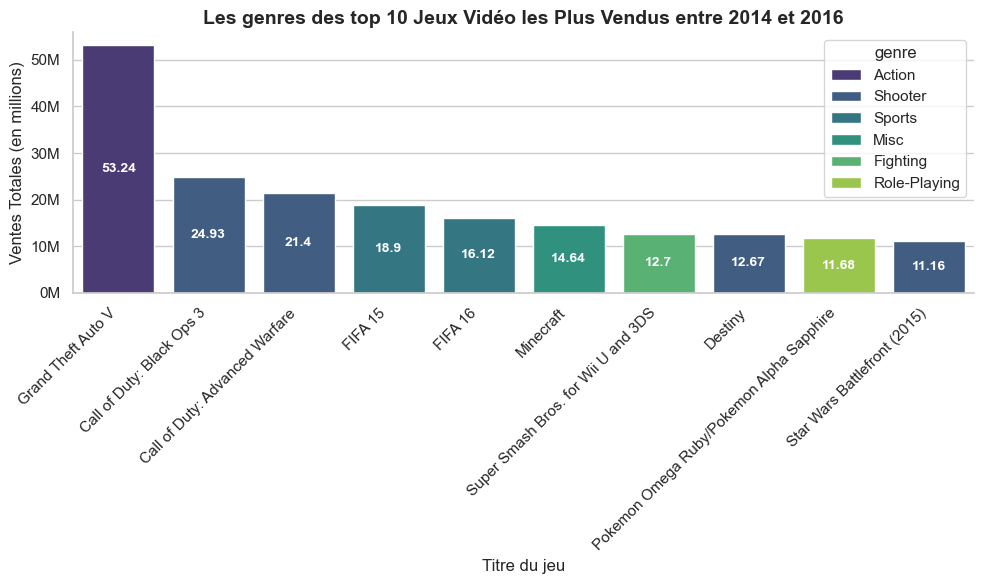

In [458]:
# --------------------------------------------------
# 1. Identifier les 10 jeux les plus vendus (avec leur genre)
# --------------------------------------------------
top_selling_games_genre = (
    df_console_constru
    .groupby(['title', 'genre'])['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)

# --------------------------------------------------
# 2. Création de la figure
# --------------------------------------------------
plt.figure(figsize=(10, 6))

# --------------------------------------------------
# 3. Tracer un diagramme en barres
#    - x = titre du jeu
#    - y = ventes totales
#    - hue = genre (pour afficher la couleur en fonction du genre)
# --------------------------------------------------
ax = sns.barplot(
    data=top_selling_games_genre,
    x='title',
    y='total_sales',
    hue='genre',
    dodge=False,
    palette='viridis'
)

# --------------------------------------------------
# 4. Ajouter des étiquettes de données (bar_label)
#    - Les étiquettes sont placées au centre des barres
# --------------------------------------------------
for container in ax.containers:
    ax.bar_label(
        container,
        label_type='center',
        fontsize=10,
        color='white',
        weight='bold'
    )

# --------------------------------------------------
# 5. Formater l'axe Y (ventes en millions)
# --------------------------------------------------
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:.0f}M')
)

# --------------------------------------------------
# 6. Personnaliser les axes et le titre
# --------------------------------------------------
plt.title("Les genres des top 10 Jeux Vidéo les Plus Vendus entre 2014 et 2016", fontsize=14, weight='bold')
plt.xlabel("Titre du jeu", fontsize=12)
plt.ylabel("Ventes Totales (en millions)", fontsize=12)

# Faire pivoter les titres de jeux sur l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# --------------------------------------------------
# 7. Optionnel : supprimer les bordures supérieures et droites
# --------------------------------------------------
sns.despine()

# --------------------------------------------------
# 8. Ajuster la mise en page et afficher
# --------------------------------------------------
plt.tight_layout()
plt.show()


Ce graphique illustre que Grand Theft Auto V (genre Action) est de loin le jeu le plus vendu entre 2014 et 2016 avec 53,24 millions d’unités, suivi par deux titres Call of Duty (Black Ops 3 et Advanced Warfare) dans le genre Shooter. Les jeux de sports (FIFA 15, FIFA 16) et jeux de rôle (Pokémon) complètent le classement, confirmant que les genres Action, Shooter et Sports ont dominé le marché en termes de ventes sur cette période.

Top 10 genres avec le plus grand nombre de jeux :
genre
Action          524
Role-Playing    191
Adventure       148
Sports          146
Misc             96
Shooter          95
Fighting         56
Racing           54
Platform         33
Simulation       22
Name: count, dtype: int64


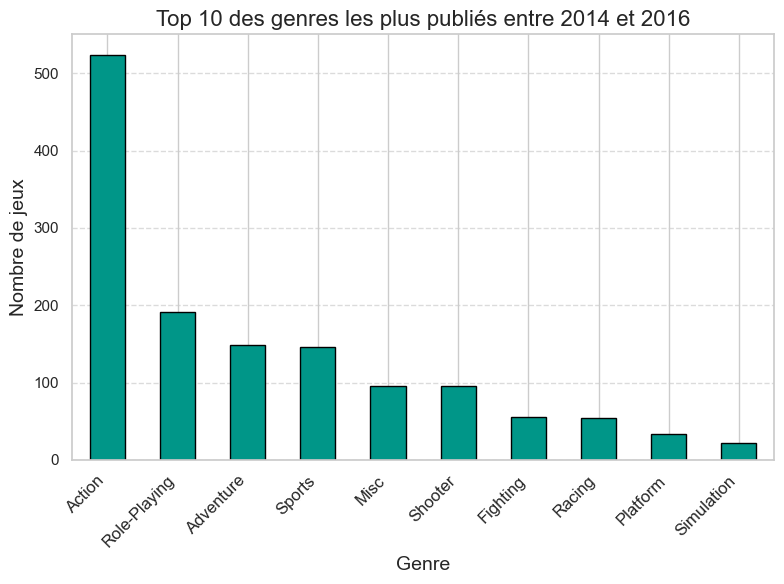

In [459]:
# # Top 10 genres avec le plus grand nombre de jeux
# --------------------------------------------------------------
# Étape 1 : Vérifier la colonne 'genre' dans le DataFrame
# --------------------------------------------------------------
df = df_console_constru  # Remplacez par votre DataFrame réel

if 'genre' not in df.columns:
    raise ValueError("Le DataFrame doit contenir une colonne 'genre'.")

# --------------------------------------------------------------
# Étape 2 : Calculer le nombre de jeux par genre
# --------------------------------------------------------------
games_per_genre = df['genre'].value_counts()

# Extraire les 10 genres les plus fréquents
top_10_genres = games_per_genre.head(10)

# Afficher les résultats dans la console
print("Top 10 genres avec le plus grand nombre de jeux :")
print(top_10_genres)

# --------------------------------------------------------------
# Étape 3 : Visualisation des top 10 genres
# --------------------------------------------------------------
plt.figure(figsize=(8, 6))  # Taille du graphique

# Tracer le graphique en barres pour les top 10 genres
top_10_genres.plot(kind='bar', color='#009688', edgecolor='black')

# Ajouter un titre et des étiquettes aux axes
plt.title('Top 10 des genres les plus publiés entre 2014 et 2016', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Nombre de jeux', fontsize=14)

# Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajouter une grille pour faciliter la lecture
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


Ce graphique montre que le genre Action a été de loin le plus publié entre 2014 et 2016, avec plus de 500 jeux sortis, soit plus du double du genre suivant, Role-Playing. Les genres Adventure, Sports et Shooter suivent, confirmant une forte production dans les catégories populaires. À l’opposé, les jeux Simulation et Platform sont les moins représentés, avec moins de 50 titres publiés chacun sur la période.

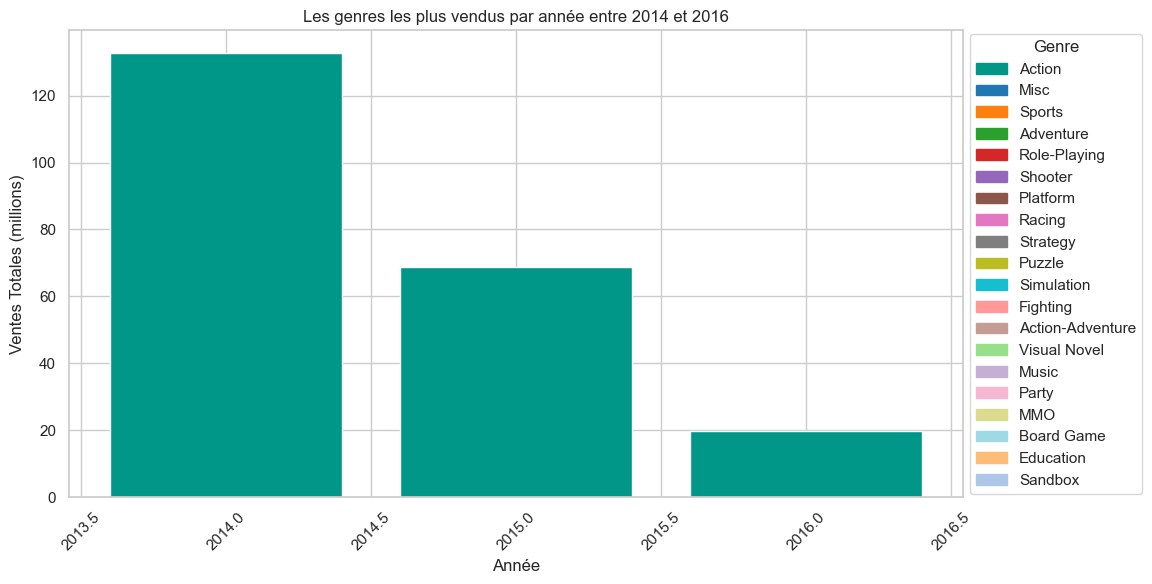

In [460]:
#----------------------------------
# 1. Calculer les ventes totales par Année et Genre
#----------------------------------
year_sale_dx = (
    df_console_constru
    .groupby(by=['Year', 'genre'])['total_sales']
    .sum()
    .reset_index()
)

#----------------------------------
# 2. Filtrer pour les 10 genres les plus vendus 
#----------------------------------
top_genres = (
    year_sale_dx
    .groupby('genre')['total_sales']
    .sum()
    .nlargest(10)   # On prend les 10 genres ayant le plus grand total de ventes
    .index
)
# On filtre year_sale_dx pour ne garder que ces 10 genres
year_sale_dx = year_sale_dx[year_sale_dx['genre'].isin(top_genres)]

#----------------------------------
# 3. Identifier le genre ayant la vente maximale chaque année
#----------------------------------
# On repère la valeur de 'total_sales' la plus élevée pour chaque année
max_per_year = year_sale_dx.groupby('Year')['total_sales'].transform('max')

# Sélectionner les lignes où 'total_sales' == max_per_year
year_sale_max = year_sale_dx[max_per_year == year_sale_dx['total_sales']].reset_index(drop=True)

#----------------------------------
# 4. Filtrer les ventes supérieures à 0
#----------------------------------
year_sale_max = year_sale_max[year_sale_max['total_sales'] > 0]

#----------------------------------
# 5. Définir une palette de couleurs pour chaque genre (dictionnaire)
#----------------------------------
genre_colors = {
    'Action': '#009688',           
    'Misc': '#1f77b4',             
    'Sports': '#ff7f0e',           
    'Adventure': '#2ca02c',        
    'Role-Playing': '#d62728',     
    'Shooter': '#9467bd',          
    'Platform': '#8c564b',         
    'Racing': '#e377c2',           
    'Strategy': '#7f7f7f',         
    'Puzzle': '#bcbd22',           
    'Simulation': '#17becf',       
    'Fighting': '#ff9896',         
    'Action-Adventure': '#c49c94',
    'Visual Novel': '#98df8a',     
    'Music': '#c5b0d5',            
    'Party': '#f7b6d2',            
    'MMO': '#dbdb8d',              
    'Board Game': '#9edae5',       
    'Education': '#ffbb78',        
    'Sandbox': '#aec7e8',          
   
}

#----------------------------------
# 6. Création du graphique
#----------------------------------
plt.figure(figsize=(10, 6))

# Tracer les barres pour chaque (Année, Genre max)
bars = plt.bar(
    year_sale_max['Year'], 
    year_sale_max['total_sales'],
    color=[genre_colors.get(g, '#7f7f7f') for g in year_sale_max['genre']]
)

#----------------------------------
# 7. Ajouter des étiquettes au-dessus de chaque barre
#----------------------------------
# for bar, row in zip(bars, year_sale_max.itertuples()):
#     x = bar.get_x() + bar.get_width() / 2
#     y = bar.get_height() + 0.5
#     # Affichage formaté : Genre - ventes arrondies + 'M'
#     plt.text(
#         x, y,
#         f"{row.genre} - {round(row.total_sales):,}M",
#         ha='center',  # Centre horizontal
#         va='bottom',  # Écrit au-dessus de la barre
#         rotation=90,  # Texte en vertical
#         fontsize=8
#     )

#----------------------------------
# 8. Personnaliser les axes et le titre
#----------------------------------
plt.xticks(rotation=45)
plt.xlabel("Année")
plt.ylabel("Ventes Totales (millions)")
plt.title("Les genres les plus vendus par année entre 2014 et 2016")
plt.tight_layout()

#----------------------------------
# 9. Ajouter une légende à l’extérieur du graphique
#----------------------------------
# On crée une "handle" (petit carré) pour chaque couleur du dictionnaire
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in genre_colors.values()]
plt.legend(
    handles, 
    genre_colors.keys(),
    title="Genre",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

#----------------------------------
# 10. Afficher le graphique
#----------------------------------
plt.show()



Ce graphique montre une baisse continue des ventes totales de jeux vidéo entre 2014 et 2016, passant d’environ 130 millions en 2014 à seulement 20 millions en 2016. Le genre dominant chaque année est l'Action (en vert foncé), ce qui confirme son leadership sur le marché. Cette décroissance peut refléter une saturation du marché, un ralentissement des sorties majeures ou une transition vers de nouvelles plateformes (ex. : mobile, cloud).

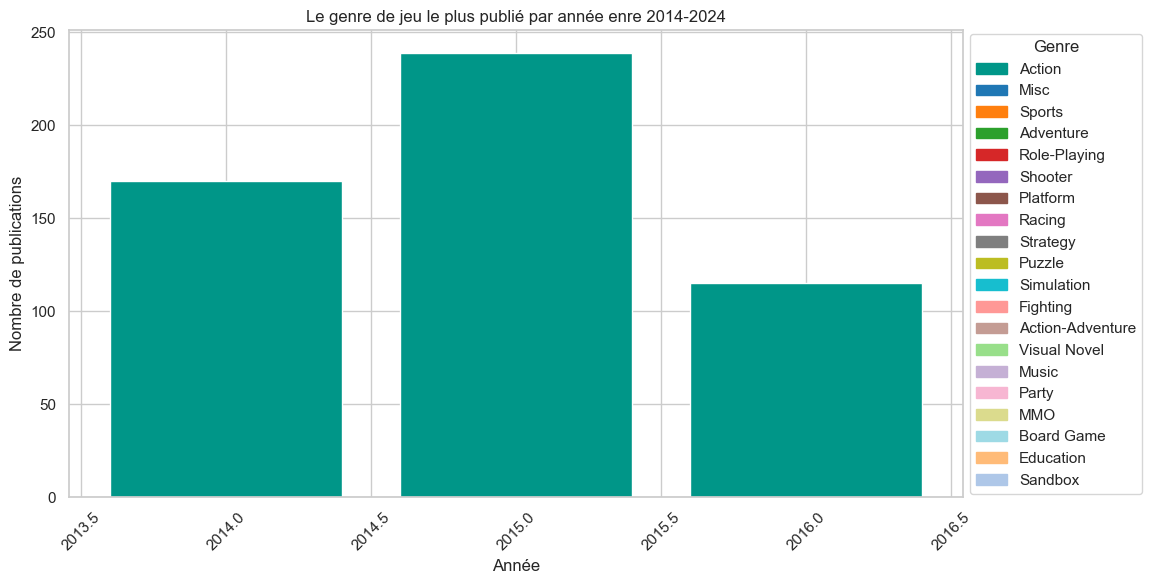

In [461]:
#-----------------------------
# 1. Calcul du nombre de publications par Année et Genre
#-----------------------------
year_count_dx = df_console_constru.groupby(['Year', 'genre'])['title'].count().reset_index()

#-----------------------------
# 2. Sélection des 10 genres les plus publiés (toutes années confondues)
#-----------------------------
top_genres = (
    year_count_dx
    .groupby('genre')['title']
    .sum()
    .nlargest(10)          # On prend les 10 genres ayant le plus grand total de publications
    .index
)

# On filtre year_count_dx pour ne garder que ces 10 genres
year_count_dx = year_count_dx[year_count_dx['genre'].isin(top_genres)]

#-----------------------------
# 3. Pour chaque année, sélectionner le genre qui a le plus de publications
#-----------------------------
# On repère la valeur maximale de 'title' (i.e. le nombre de publications) pour chaque année
year_count = year_count_dx.groupby('Year')['title'].transform('max') == year_count_dx['title']

# On garde uniquement les lignes correspondant à ces valeurs maximales
year_count_max = year_count_dx[year_count].reset_index(drop=True)

#-----------------------------
# 4. Filtrer les années pour lesquelles il existe au moins 1 publication
#-----------------------------
year_count_max = year_count_max[year_count_max['title'] > 0]

#-----------------------------
# 5. Palette de couleurs par genre (personnalisée ou par défaut)
#-----------------------------
genre_colors = {
    'Action': '#009688',            
    'Misc': '#1f77b4',              
    'Sports': '#ff7f0e',            
    'Adventure': '#2ca02c',         
    'Role-Playing': '#d62728',      
    'Shooter': '#9467bd',           
    'Platform': '#8c564b',          
    'Racing': '#e377c2',            
    'Strategy': '#7f7f7f',          
    'Puzzle': '#bcbd22',            
    'Simulation': '#17becf',        
    'Fighting': '#ff9896',          
    'Action-Adventure': '#c49c94',  
    'Visual Novel': '#98df8a',      
    'Music': '#c5b0d5',             
    'Party': '#f7b6d2',             
    'MMO': '#dbdb8d',               
    'Board Game': '#9edae5',        
    'Education': '#ffbb78',         
    'Sandbox': '#aec7e8',           
}

#-----------------------------
# 6. Création de la figure
#-----------------------------
plt.figure(figsize=(10, 6))

# Dessiner les barres avec des couleurs associées au genre
bars = plt.bar(
    year_count_max['Year'], 
    year_count_max['title'], 
    color=[genre_colors.get(genre, '#7f7f7f') for genre in year_count_max['genre']]
)


#-----------------------------
# 8. Personnaliser le graphique
#-----------------------------
plt.xticks(rotation=45)
plt.xlabel("Année")
plt.ylabel("Nombre de publications")
plt.title("Le genre de jeu le plus publié par année enre 2014-2024")
plt.tight_layout()

#-----------------------------
# 9. Ajouter une légende à droite
#-----------------------------
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in genre_colors.values()]
plt.legend(
    handles, 
    genre_colors.keys(), 
    title="Genre", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

#-----------------------------
# 10. Afficher le graphique
#-----------------------------
plt.show()


Ce graphique montre que le genre Action a été le plus publié chaque année entre 2014 et 2016, avec un pic en 2015 (près de 250 jeux). Bien que le nombre de sorties ait légèrement diminué en 2016, le genre reste dominant en volume, traduisant sa popularité constante auprès des studios comme des joueurs. Cela confirme que l’Action est un pilier de la production vidéoludique sur la période 2014–2024.

#### Analyse des constructeurs entre 2014 et 2016

  Constructeur  total_sales
2         Sony       376.32
0    Microsoft       184.53
1     Nintendo       125.83


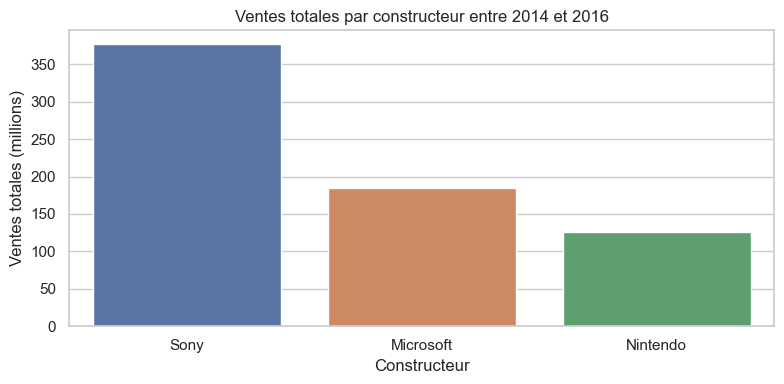

In [462]:
#----------------------------------
# 1. Calculer les ventes totales par constructeur
#----------------------------------
sales_by_constructor = (
    df_console_constru
    .groupby('Constructeur')['total_sales']
    .sum()
    .reset_index()
)

# Renommer les colonnes pour plus de clarté
sales_by_constructor.columns = ['Constructeur', 'total_sales']

# Trier par ventes totales (du plus élevé au plus bas)
sales_by_constructor = sales_by_constructor.sort_values(by='total_sales', ascending=False)

# Afficher le tableau
print(sales_by_constructor)

#----------------------------------
# 2. Visualiser les ventes totales par constructeur (diagramme en barres)
#----------------------------------
plt.figure(figsize=(8, 4))

sns.barplot(
    data=sales_by_constructor,
    x='Constructeur',
    y='total_sales',
    hue='Constructeur',   # On associe le constructeur à la couleur
    dodge=False,              # Les barres ne sont pas décalées
    palette='deep',           # Palette de couleurs
    legend=False              # Supprime la légende car elle est redondante
)

#----------------------------------
# 3. Personnaliser les axes et le titre
#----------------------------------
plt.title("Ventes totales par constructeur entre 2014 et 2016")
plt.xlabel("Constructeur")
plt.ylabel("Ventes totales (millions)")

plt.tight_layout()
plt.show()


Ce graphique montre que Sony domine nettement les ventes totales de consoles entre 2014 et 2016, avec environ 370 millions d’unités, suivi de Microsoft (~180 millions), puis Nintendo (~125 millions). Cela reflète le succès de la PlayStation 4 durant cette période, tandis que Microsoft et Nintendo occupent des parts de marché significativement inférieures.

  Constructeur  title
0         Sony    811
1    Microsoft    307
2     Nintendo    280


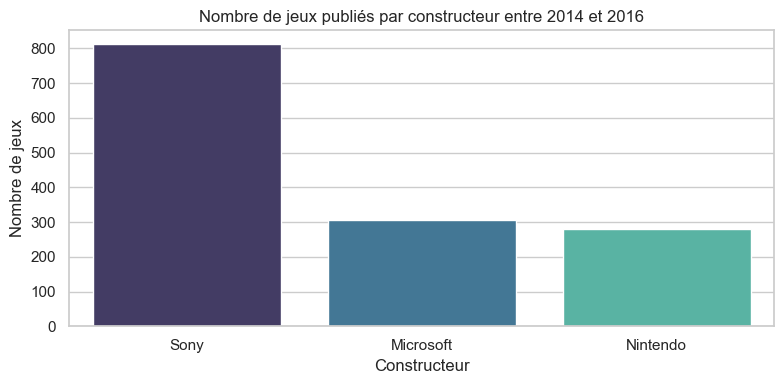

In [463]:
# Nombre de jeux par constructeur
#----------------------------------
# 1. Compter le nombre de jeux par constructeur 
#----------------------------------
games_by_constructor = df_console_constru['Constructeur'].value_counts().reset_index()
games_by_constructor.columns = ['Constructeur', 'title']

# Afficher le tableau
print(games_by_constructor)

#----------------------------------
# 2. Visualiser le nombre de jeux par constructeur (diagramme en barres)
#----------------------------------
plt.figure(figsize=(8, 4))

sns.barplot(
    data=games_by_constructor,
    x='Constructeur',
    y='title',
    hue='Constructeur',   # On associe la variable 'Constructeur_Map' à la couleur
    palette='mako',
    dodge=False,              # Les barres ne sont pas décalées
    legend=False              # Supprime la légende car elle est redondante
)

#----------------------------------
# 3. Personnaliser les axes et le titre
#----------------------------------
plt.title("Nombre de jeux publiés par constructeur entre 2014 et 2016")
plt.xlabel("Constructeur")
plt.ylabel("Nombre de jeux")

plt.tight_layout()
plt.show()


Ce graphique montre que Sony a publié plus de 800 jeux entre 2014 et 2016, soit plus du double de Microsoft (300) et Nintendo (environ 280). Cela reflète une stratégie éditoriale très agressive de Sony en matière de contenu, favorisant la diversité de l’offre sur ses consoles pour attirer un maximum de joueurs et soutenir ses ventes.

In [464]:
#----------------------------------------------------
# ventes par région
# 1. Agréger les ventes par genre
#----------------------------------------------------
df_sales_24 = (
    df_console_constru
    .groupby('genre', as_index=False)
    .agg({
        'na_sales': 'sum',
        'jp_sales': 'sum',
        'pal_sales': 'sum',
        'total_sales': 'sum'
    })
)

#----------------------------------------------------
# 2. Trier par total_sales dans l'ordre décroissant
#----------------------------------------------------
df_sales_24 = df_sales_24.sort_values(by='total_sales', ascending=False)

#----------------------------------------------------
# 3. Afficher les premières lignes pour vérification
#----------------------------------------------------
print(df_sales_24.head(10))

           genre  na_sales  jp_sales  pal_sales  total_sales
0         Action     80.67     28.68      85.09       221.44
8        Shooter     67.65      4.33      54.65       145.42
10        Sports     42.89      3.11      42.23       102.31
7   Role-Playing     26.60     28.26      22.69        84.88
3           Misc     14.65      5.30      12.58        36.71
2       Fighting     12.26      6.38       6.58        28.11
6         Racing      8.38      1.80      12.96        25.86
4       Platform      6.20      2.59       6.29        16.83
1      Adventure      4.99      3.17       5.67        15.49
9     Simulation      1.26      2.28       2.12         6.05


#### Analyse des genres par constructeur entre 2014 et 2016

In [465]:
# Vérifier et traiter les valeurs manquantes
df_console_constru.isnull().sum()

Rank            0
title           0
console         0
Year            0
genre           0
publisher       0
Constructeur    0
Portable        0
na_sales        0
pal_sales       0
jp_sales        0
other_sales     0
total_sales     0
dtype: int64

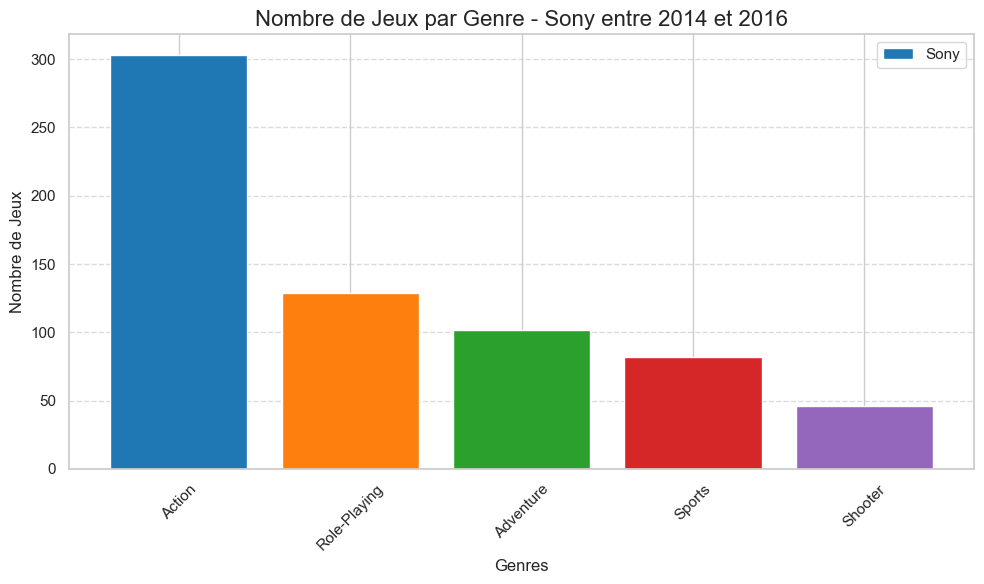

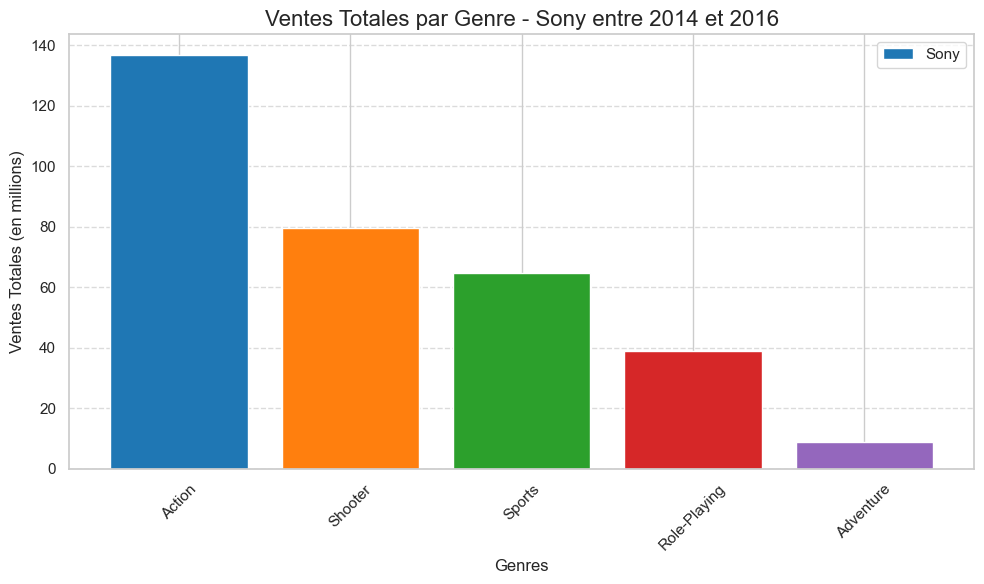

In [466]:
# Analyse des genres par constructeur a partir de 2014
# ------------------------------------------
# 1. Nettoyage et filtrage des données
# ------------------------------------------

# (a) Supprimer les lignes avec NaN dans 'constructeur'
df_console_constru = df_console_constru.dropna(subset=['Constructeur'])


# (b) Ne conserver que certains genres et constructeurs (les plus populaires)
df_constru_genre = df_console_constru[
    (df_console_constru['genre'].isin(['Action', 'Shooter', 'Sports', 'Adventure', 'Role-Playing'])) &
    (df_console_constru['Constructeur'].isin(['Sony', 'Nintendo', 'Microsoft']))
]

# ------------------------------------------
# 2. Calculer le nombre de jeux par (genre, constructeur)
# ------------------------------------------
game_counts = df_constru_genre.groupby(['genre', 'Constructeur']).size().reset_index(name='game_count')

# ------------------------------------------
# 3. Extraire les données pour Sony et trier par nombre de jeux
# ------------------------------------------
game_counts_sony = (
    game_counts[game_counts['Constructeur'] == 'Sony']
    .sort_values(by='game_count', ascending=False)
    .reset_index(drop=True)
)

# ------------------------------------------
# 4. Palette de couleurs pour le graphique
# ------------------------------------------
couleurs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd']

# ------------------------------------------
# 5. Tracer le graphique du nombre de jeux pour Sony
# ------------------------------------------
plt.figure(figsize=(10, 6))

plt.bar(
    x=game_counts_sony['genre'], 
    height=game_counts_sony['game_count'], 
    color=couleurs[:len(game_counts_sony)], 
    label='Sony'
)

plt.title('Nombre de Jeux par Genre - Sony entre 2014 et 2016', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Nombre de Jeux', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# ------------------------------------------
# 2. Calculer le total des ventes par (genre, constructeur)
# ------------------------------------------
sales_totals = df_constru_genre.groupby(['genre', 'Constructeur'])[
    ['na_sales', 'pal_sales', 'jp_sales', 'other_sales']
].sum().reset_index()

# ------------------------------------------
# 3. Extraire les données pour Sony
# ------------------------------------------
# Créer une copie explicite des données pour Sony
sales_sony = sales_totals[sales_totals['Constructeur'] == 'Sony'].copy()

# Ajouter une colonne 'total_sales' en toute sécurité
sales_sony['total_sales'] = sales_sony[['na_sales', 'pal_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Trier les genres par ventes totales décroissantes
sales_sony = sales_sony.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# ------------------------------------------
# 4. Palette de couleurs pour le graphique
# ------------------------------------------
couleurs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# ------------------------------------------
# 5. Tracer le graphique pour Sony
# ------------------------------------------
plt.figure(figsize=(10, 6))

plt.bar(
    x=sales_sony['genre'], 
    height=sales_sony['total_sales'], 
    color=couleurs[:len(sales_sony)], 
    label='Sony'
)

plt.title('Ventes Totales par Genre - Sony entre 2014 et 2016', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Ventes Totales (en millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La comparaison des deux graphiques révèle une cohérence entre la quantité de jeux publiés par genre et leurs performances commerciales chez Sony entre 2014 et 2016.

 Analyse croisée :
 
Action : Le genre le plus publié (>300 jeux) est aussi celui qui génère le plus de ventes (≈137 millions) → forte rentabilité et popularité constante.

Role-Playing (RPG) : 2ᵉ genre le plus publié (environ 130 jeux), mais seulement 4ᵉ en ventes (environ 38 millions) → beaucoup de sorties mais rentabilité moyenne.

Adventure : environ 100 jeux publiés mais très faibles ventes (environ 10 millions) → genre à faible retour sur investissement malgré un volume significatif.

Sports et Shooter :

Moins de jeux publiés (environ 80 pour Sports, environ 45 pour Shooter),

Mais ventes très solides : 65M pour Sports, environ 80M pour Shooter → genres efficaces commercialement, même avec moins de titres.

Action reste le pilier à la fois en quantité et en revenus.

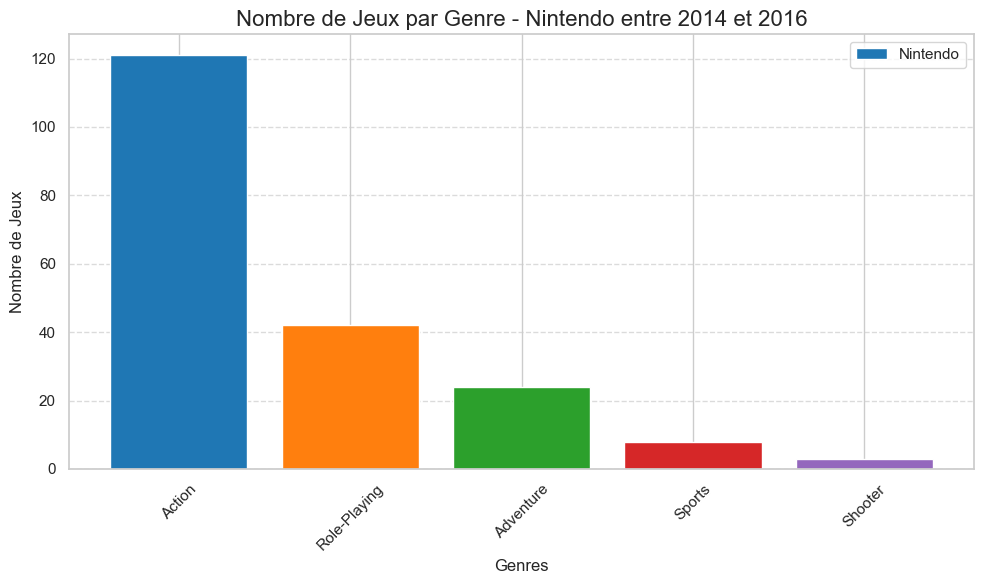

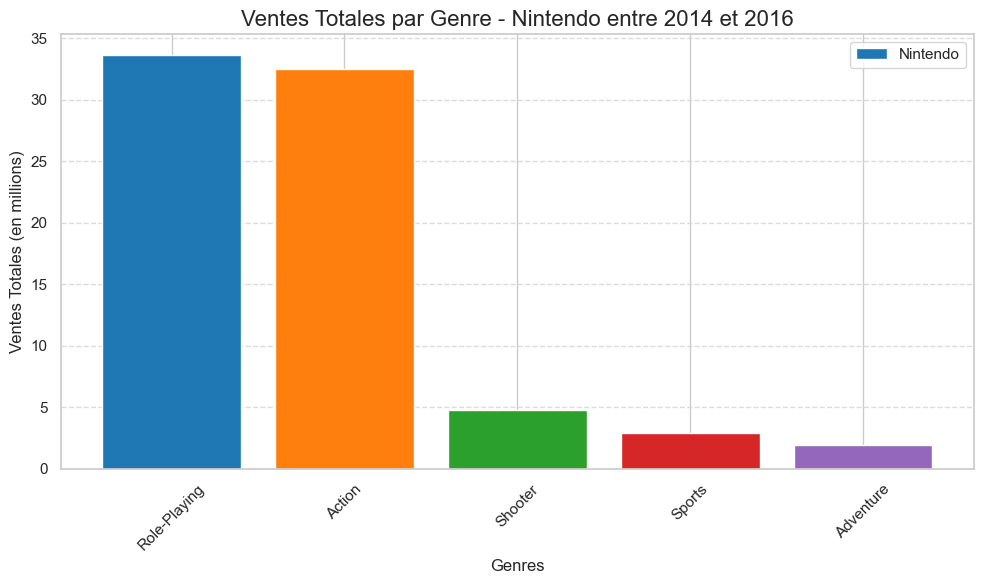

In [467]:
# Analyse des genres par constructeur a partir de 2014
# ------------------------------------------
# 1. Nettoyage et filtrage des données
# ------------------------------------------
# (a) Supprimer les lignes avec NaN dans 'constructeur'
df_console_constru = df_console_constru.dropna(subset=['Constructeur'])

# (b) Ne conserver que certains genres et constructeurs
df_constru_genre = df_console_constru[
    (df_console_constru['genre'].isin(['Action', 'Shooter', 'Sports', 'Adventure', 'Role-Playing'])) &
    (df_console_constru['Constructeur'].isin(['Sony', 'Nintendo', 'Microsoft']))
]

# ------------------------------------------
# 2. Calculer le nombre de jeux par (genre, constructeur)
# ------------------------------------------
game_counts = df_constru_genre.groupby(['genre', 'Constructeur']).size().reset_index(name='game_count')

# ------------------------------------------
# 3. Extraire les données pour Nintendo et trier par nombre de jeux
# ------------------------------------------
game_counts_nintendo = (
    game_counts[game_counts['Constructeur'] == 'Nintendo']
    .sort_values(by='game_count', ascending=False)
    .reset_index(drop=True)
)

# ------------------------------------------
# 4. Palette de couleurs pour le graphique
# ------------------------------------------
couleurs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# ------------------------------------------
# 5. Tracer le graphique du nombre de jeux pour Nintendo
# ------------------------------------------
plt.figure(figsize=(10, 6))

plt.bar(
    x=game_counts_nintendo['genre'], 
    height=game_counts_nintendo['game_count'], 
    color=couleurs[:len(game_counts_nintendo)], 
    label='Nintendo'
)

plt.title('Nombre de Jeux par Genre - Nintendo entre 2014 et 2016', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Nombre de Jeux', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# ------------------------------------------
# 2. Calculer le total des ventes par (genre, constructeur)
# ------------------------------------------
sales_totals = df_constru_genre.groupby(['genre', 'Constructeur'])[
    ['na_sales', 'pal_sales', 'jp_sales', 'other_sales']
].sum().reset_index()

# ------------------------------------------
# 3. Extraire les données pour Nintendo
# ------------------------------------------
# Créer une copie explicite des données pour Sony
sales_nintendo = sales_totals[sales_totals['Constructeur'] == 'Nintendo'].copy()

# Ajouter une colonne 'total_sales' en toute sécurité
sales_nintendo['total_sales'] = sales_nintendo[['na_sales', 'pal_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Trier les genres par ventes totales décroissantes
sales_nintendo = sales_nintendo.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# ------------------------------------------
# 4. Palette de couleurs pour le graphique
# ------------------------------------------
couleurs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# ------------------------------------------
# 5. Tracer le graphique pour Nintendo
# ------------------------------------------
plt.figure(figsize=(10, 6))

plt.bar(
    x=sales_nintendo['genre'], 
    height=sales_nintendo['total_sales'], 
    color=couleurs[:len(sales_nintendo)], 
    label='Nintendo'
)

plt.title('Ventes Totales par Genre - Nintendo entre 2014 et 2016', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Ventes Totales (en millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Ces deux graphiques montrent que Nintendo a principalement publié des jeux d’action entre 2014 et 2016 (plus de 120 titres), mais ce sont les jeux de rôle (RPG) qui ont généré les meilleures ventes (≈34 millions). Bien que moins nombreux, les RPG sont donc plus rentables, tandis que certains genres comme l’aventure ou le sport, bien que présents, ont généré peu de ventes. Cela suggère qu’un rééquilibrage vers des genres plus performants pourrait optimiser la stratégie de catalogue.

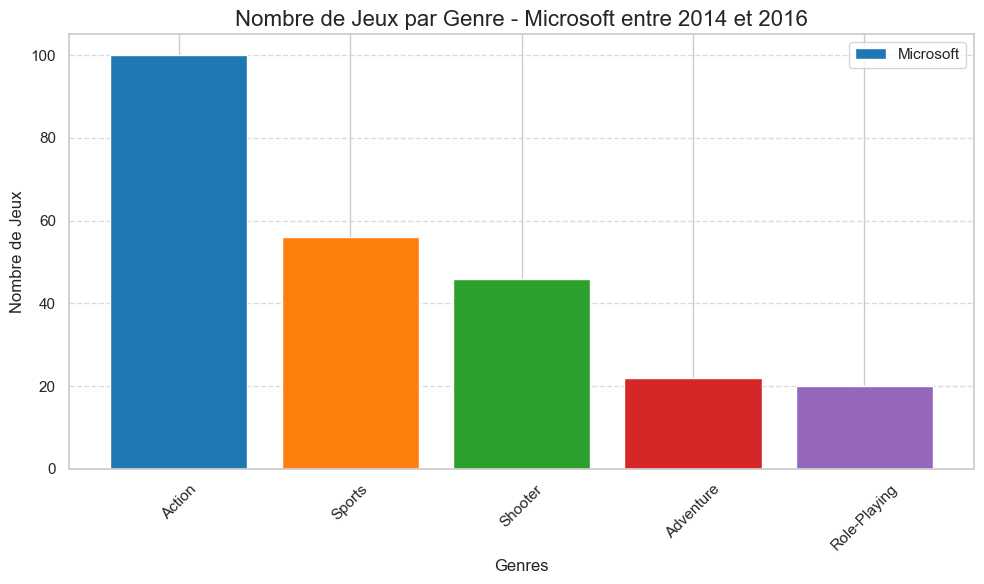

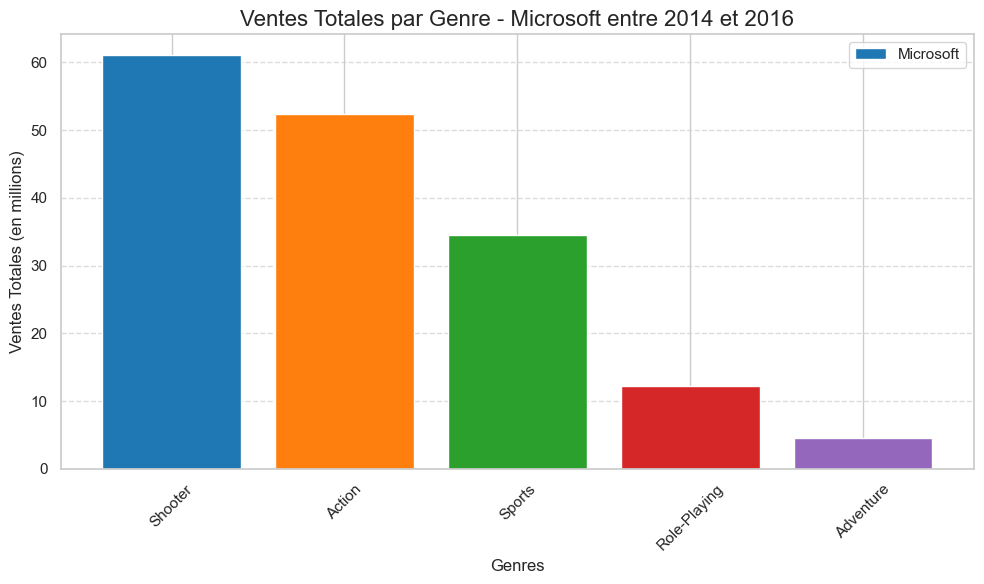

In [468]:
# Analyse des genres par constructeur entre 2014 et 2016
# ------------------------------------------
# 1. Nettoyage et filtrage des données
# ------------------------------------------
# (a) Supprimer les lignes avec NaN dans 'constructeur'

df_console_constru = df_console_constru.dropna(subset=['Constructeur'])

# (b) Ne conserver que certains genres et constructeurs
df_constru_genre = df_console_constru[
    (df_console_constru['genre'].isin(['Action', 'Shooter', 'Sports','Adventure', 'Role-Playing'])) &
    (df_console_constru['Constructeur'].isin(['Sony', 'Nintendo', 'Microsoft']))
]

# ------------------------------------------
# 2. Calculer le nombre de jeux par (genre, constructeur)
# ------------------------------------------
game_counts = df_constru_genre.groupby(['genre', 'Constructeur']).size().reset_index(name='game_count')

# ------------------------------------------
# 3. Extraire les données pour Microsoft et trier par nombre de jeux
# ------------------------------------------
game_counts_microsoft = (
    game_counts[game_counts['Constructeur'] == 'Microsoft']
    .sort_values(by='game_count', ascending=False)
    .reset_index(drop=True)
)

# ------------------------------------------
# 4. Palette de couleurs pour le graphique
# ------------------------------------------
couleurs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# ------------------------------------------
# 5. Tracer le graphique du nombre de jeux pour Microsoft
# ------------------------------------------
plt.figure(figsize=(10, 6))

plt.bar(
    x=game_counts_microsoft['genre'], 
    height=game_counts_microsoft['game_count'], 
    color=couleurs[:len(game_counts_microsoft)], 
    label='Microsoft'
)

plt.title('Nombre de Jeux par Genre - Microsoft entre 2014 et 2016', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Nombre de Jeux', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# ------------------------------------------
# 2. Calculer le total des ventes par (genre, constructeur)
# ------------------------------------------
sales_totals = df_constru_genre.groupby(['genre', 'Constructeur'])[
    ['na_sales', 'pal_sales', 'jp_sales', 'other_sales']
].sum().reset_index()

# ------------------------------------------
# 3. Extraire les données pour Microsoft
# ------------------------------------------
# Créer une copie explicite des données pour Microsoft
sales_microsoft = sales_totals[sales_totals['Constructeur'] == 'Microsoft'].copy()

# Ajouter une colonne 'total_sales' en toute sécurité
sales_microsoft['total_sales'] = sales_microsoft[['na_sales', 'pal_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Trier les genres par ventes totales décroissantes
sales_microsoft = sales_microsoft.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# ------------------------------------------
# 4. Palette de couleurs pour le graphique
# ------------------------------------------
couleurs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# ------------------------------------------
# 5. Tracer le graphique pour Microsoft
# ------------------------------------------
plt.figure(figsize=(10, 6))

plt.bar(
    x=sales_microsoft['genre'], 
    height=sales_microsoft['total_sales'], 
    color=couleurs[:len(sales_microsoft)], 
    label='Microsoft'
)

plt.title('Ventes Totales par Genre - Microsoft entre 2014 et 2016', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Ventes Totales (en millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Ces deux graphiques montrent que Microsoft a publié principalement des jeux d’action (100) entre 2014 et 2016, suivis des genres sports et shooters. Pourtant, ce sont les shooters qui ont généré les meilleures ventes (≈61 millions), devant l’action (≈52M) et les sports. Cela indique que les shooters, bien que moins nombreux, sont les plus rentables pour Microsoft, tandis que les jeux d’aventure et RPG ont un impact commercial limité.

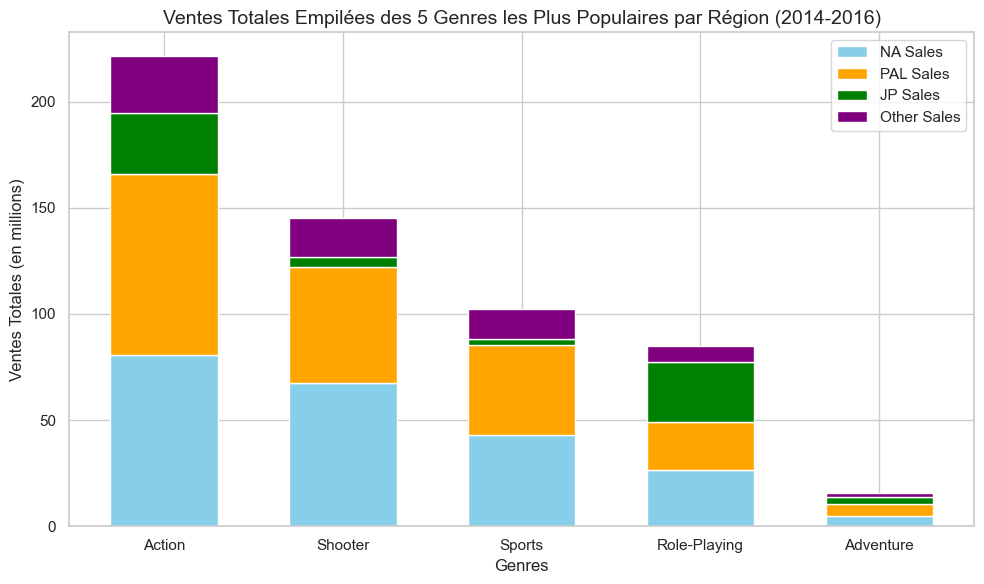

In [469]:
# Ventes Totales Empilées par Genre et Région
#---------------------------------------
# 1. Filtrer les données pour certains genres
#---------------------------------------
genres = ['Action', 'Role-Playing', 'Shooter', 'Sports', 'Adventure']
df_genre = df_console_constru[df_console_constru['genre'].isin(genres)]

#---------------------------------------
# 2. Calculer les totaux de ventes régionales par genre 
#---------------------------------------
sales_totals = df_genre.groupby('genre')[
    ['na_sales', 'pal_sales', 'jp_sales', 'other_sales']
].sum()

#---------------------------------------
# 3. Ajouter une colonne 'total_sales' pour trier les genres par ventes totales
#---------------------------------------
sales_totals['total_sales'] = sales_totals.sum(axis=1)

# Tri décroissant des genres selon les ventes totales
sales_totals = sales_totals.sort_values(by='total_sales', ascending=False)

#---------------------------------------
# 4. Préparation des données et paramètres du graphique
#---------------------------------------
bar_width = 0.6  # Largeur des barres
index = np.arange(len(sales_totals))  # Position des barres sur l'axe X

# Extraire les séries pour chaque région après le tri
na_sales = sales_totals['na_sales']
pal_sales = sales_totals['pal_sales']
jp_sales = sales_totals['jp_sales']
other_sales = sales_totals['other_sales']
genres_sorted = sales_totals.index  # Genres triés par ventes totales

#---------------------------------------
# 5. Création du graphique empilé
#---------------------------------------
plt.figure(figsize=(10, 6))

# Première couche (NA Sales)
plt.bar(
    x=index,
    height=na_sales,
    width=bar_width,
    label='NA Sales',
    color='skyblue'
)

# Deuxième couche (PAL Sales) empilée par-dessus NA
plt.bar(
    x=index,
    height=pal_sales,
    width=bar_width,
    bottom=na_sales,
    label='PAL Sales',
    color='orange'
)

# Troisième couche (JP Sales) empilée sur les deux premières
plt.bar(
    x=index,
    height=jp_sales,
    width=bar_width,
    bottom=na_sales + pal_sales,
    label='JP Sales',
    color='green'
)

# Quatrième couche (Other Sales)
plt.bar(
    x=index,
    height=other_sales,
    width=bar_width,
    bottom=na_sales + pal_sales + jp_sales,
    label='Other Sales',
    color='purple'
)

#---------------------------------------
# 6. Personnalisation du graphique
#---------------------------------------
plt.title('Ventes Totales Empilées des 5 Genres les Plus Populaires par Région (2014-2016)', fontsize=14)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Ventes Totales (en millions)', fontsize=12)
plt.xticks(index, genres_sorted)  # Étiquettes de l'axe X avec les genres triés
plt.legend(loc='upper right')

# Ajuster la disposition et afficher
plt.tight_layout()
plt.show()


Ce graphique montre que les jeux d'action ont généré les meilleures ventes mondiales entre 2014 et 2016, avec une forte contribution de l’Europe (PAL) et de l’Amérique du Nord (NA). Les genres shooter et sports suivent, avec également une dominance occidentale. En revanche, le Role-Playing se distingue par une part significative de ventes au Japon (JP), illustrant des préférences culturelles régionales. Les jeux d’aventure, eux, restent peu performants dans toutes les zones.

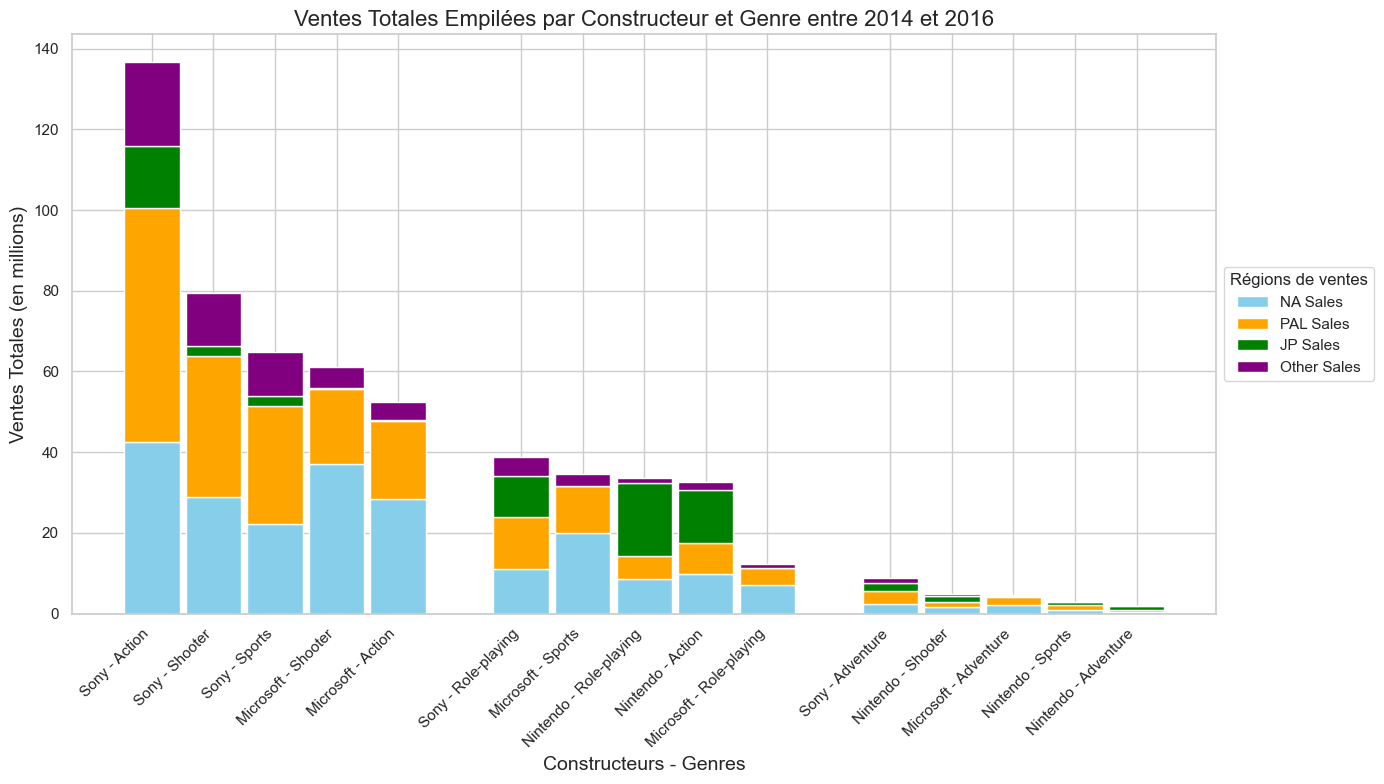

In [470]:
# Ventes Totales Empilées par Constructeur et Genre
#------------------------------------------------
# 1. Définir les paramètres de filtrage
#------------------------------------------------
constructeurs = ['Sony', 'Nintendo', 'Microsoft']
genres = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Adventure']

#------------------------------------------------
# 2. Filtrer le DataFrame
#------------------------------------------------
df_constru_genre = df_console_constru[
    (df_console_constru['Constructeur'].isin(constructeurs)) &
    (df_console_constru['genre'].isin(genres))
]

#------------------------------------------------
# 3. Calculer les totaux de ventes par (constructeur, genre) et trier
#------------------------------------------------
sales_totals = df_constru_genre.groupby(['Constructeur', 'genre'])[
    ['na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'total_sales']
].sum()

# Trier les données par `total_sales` en ordre décroissant
sales_totals = sales_totals.sort_values(by='total_sales', ascending=False)

#------------------------------------------------
# 4. Ajouter des espaces entre les groupes de constructeurs
#------------------------------------------------
grouped_sales = []
spacer = 1  # Nombre d'espaces entre les constructeurs
offset = 0  # Décalage initial

# Ajouter un espace entre chaque groupe
for constructeur in constructeurs:
    group = sales_totals.loc[sales_totals.index.get_level_values(0) == constructeur]
    index_group = np.arange(len(group)) + offset
    grouped_sales.extend(index_group)
    offset = grouped_sales[-1] + spacer + 1

grouped_sales = np.array(grouped_sales)

# Générer les labels pour l'axe X
labels = [f"{constructeur.capitalize()} - {genre.capitalize()}"
          for constructeur, genre in sales_totals.index]

#------------------------------------------------
# 5. Préparer les données pour le diagramme empilé
#------------------------------------------------
na_sales = sales_totals['na_sales'].tolist()
pal_sales = sales_totals['pal_sales'].tolist()
jp_sales = sales_totals['jp_sales'].tolist()
other_sales = sales_totals['other_sales'].tolist()

bar_width = 0.9  # Largeur des barres

#------------------------------------------------
# 6. Création du graphique empilé
#------------------------------------------------
plt.figure(figsize=(14, 8))

# Première couche : NA Sales
plt.bar(
    x=grouped_sales,
    height=na_sales,
    width=bar_width,
    label='NA Sales',
    color='skyblue'
)

# Deuxième couche : PAL Sales
plt.bar(
    x=grouped_sales,
    height=pal_sales,
    width=bar_width,
    bottom=na_sales,
    label='PAL Sales',
    color='orange'
)

# Troisième couche : JP Sales
plt.bar(
    x=grouped_sales,
    height=jp_sales,
    width=bar_width,
    bottom=[i + j for i, j in zip(na_sales, pal_sales)],
    label='JP Sales',
    color='green'
)

# Quatrième couche : Other Sales
plt.bar(
    x=grouped_sales,
    height=other_sales,
    width=bar_width,
    bottom=[i + j + k for i, j, k in zip(na_sales, pal_sales, jp_sales)],
    label='Other Sales',
    color='purple'
)

#------------------------------------------------
# 7. Personnalisation du graphique
#------------------------------------------------
plt.title("Ventes Totales Empilées par Constructeur et Genre entre 2014 et 2016", fontsize=16)
plt.xlabel("Constructeurs - Genres", fontsize=14)
plt.ylabel("Ventes Totales (en millions)", fontsize=14)

# Placer les étiquettes (labels) de l'axe X
plt.xticks(grouped_sales, labels, rotation=45, ha='right')

# Afficher la légende à droite dans le graphique
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title="Régions de ventes"
)

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()


D'après les résultats des analyses, il apparaît que les genres Action et Shooter dominent sur les consoles de Sony et Microsoft, tandis que les genres RPG et Action prédominent sur Nintendo. Cela suggère que les genres Action et RPG sont les plus prometteurs pour le développement d'un nouveau jeu vidéo Triple A.
Action, Shooter et Sport dominent la région NA (Amérique) et la région PAL, tandis que les genres RPG et Action dominent au Japon.

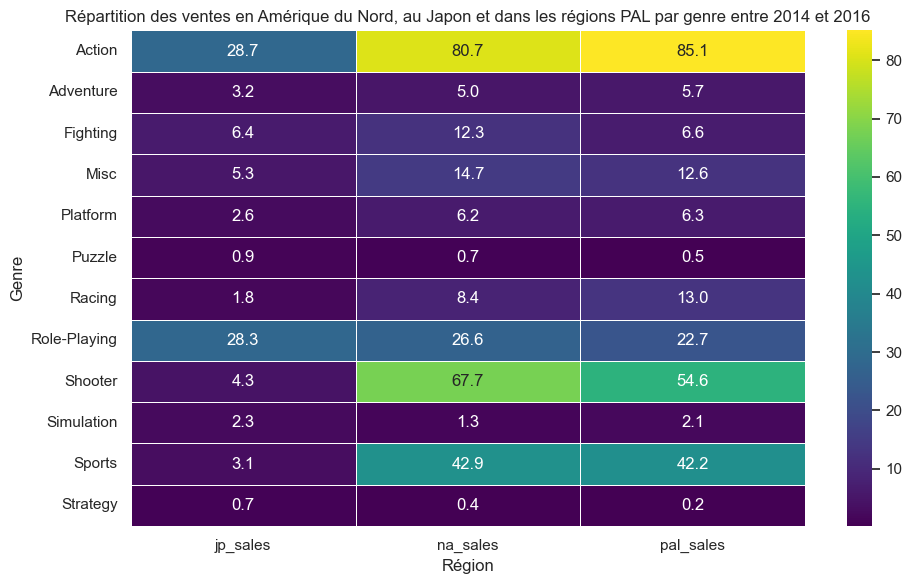

In [471]:
# Répartition des ventes en Amérique du Nord, au Japon et dans les régions PAL par genre 
#----------------------------------
# 1. Extraire les données nécessaires depuis df_sales_16
#----------------------------------
sales_data = df_console_constru[['genre', 'na_sales', 'jp_sales', 'pal_sales']]

#----------------------------------
# 2. Transformer le DataFrame en format long (melt)
#   - id_vars='genre' => on conserve la colonne 'genre'
#   - var_name='region' => nom de la variable contenant la région
#   - value_name='sales' => nom de la variable contenant le volume de ventes
#----------------------------------
sales_data_melted = sales_data.melt(
    id_vars='genre',
    var_name='region',
    value_name='sales'
)

#----------------------------------
# 3. Agréger les ventes par genre et région pour éviter les doublons
#----------------------------------
sales_agg = (
    sales_data_melted
    .groupby(['genre', 'region'], as_index=False)['sales']
    .sum()
)

#----------------------------------
# 4. Créer un tableau croisé (pivot) pour la heatmap
#   - index='genre' => les genres formeront les lignes
#   - columns='region' => les régions formeront les colonnes
#   - values='sales' => chaque cellule contient la somme des ventes
#----------------------------------
sales_pivot = sales_agg.pivot(
    index='genre',
    columns='region',
    values='sales'
)

#----------------------------------
# 5. Tracer la heatmap
#----------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(
    sales_pivot,
    cmap='viridis',      # Palette de couleurs
    annot=True,          # Afficher la valeur numérique dans chaque cellule
    fmt='.1f',           # Format des nombres (1 décimale)
    linewidths=.5        # Espacement entre les cellules
)

plt.title("Répartition des ventes en Amérique du Nord, au Japon et dans les régions PAL par genre entre 2014 et 2016")
plt.xlabel("Région")
plt.ylabel("Genre")

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()


Ce graphique montre que les jeux Action et Shooter dominent largement les ventes en Amérique du Nord (NA) et dans les régions PAL (Europe, Australie). En revanche, le genre Role-Playing est très populaire au Japon (28.3), presque autant qu’en Occident, ce qui confirme sa dimension culturelle forte. Les autres genres (Puzzle, Simulation, Stratégie...) restent très marginalisés dans toutes les régions, avec des ventes faibles. Cette répartition met en lumière des préférences régionales nettes à intégrer dans les stratégies de développement et de lancement d'un nouveau jeu AAA.

### Analyse des corrélation entre les ventes

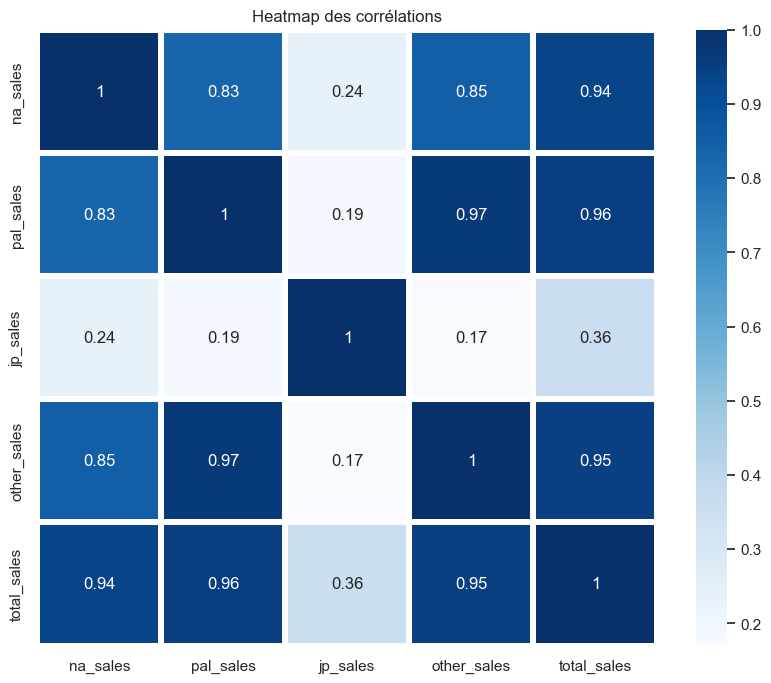

In [472]:
#----------------------------------
# 1. Sélectionner uniquement les colonnes numériques
#----------------------------------
numeric_columns = df_console_constru.select_dtypes(include=['float64', 'int64'])

# Exclure la colonne 'Rank' si elle est présente
if 'Rank' in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=['Rank'])

#----------------------------------
# 2. Calculer la matrice de corrélation
#----------------------------------
corr_matrix = numeric_columns.corr()

#----------------------------------
# 3. Créer une heatmap pour visualiser les corrélations
#----------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    cmap="Blues",        # Palette de couleurs
    annot=True,          # Affiche la valeur de corrélation
    linewidths=3         # Épaisseur de la ligne de séparation entre cellules
)

plt.title("Heatmap des corrélations")
plt.show()


##### Nous pouvons constater que na_sales, pal_sales et  other_sales sont fortement corrélé et ont un impact important sur total_sales.

In [473]:
#----------------------------------
# 1. # Calcul du coefficient de corrélation de Pearson et de la p-value
#----------------------------------

correlation, p_value = pearsonr(df_sales_16['na_sales'], df_sales_16['pal_sales'])

#----------------------------------
# 2. Afficher les résultats
#----------------------------------
print(f"Coefficient de corrélation de Pearson : {correlation}")
print(f"P-value : {p_value}")

#----------------------------------
# 3. Interpréter les résultats
#----------------------------------
if p_value < 0.05:
    print("La corrélation est statistiquement significative (p < 0.05).")
else:
    print("La corrélation n'est pas statistiquement significative (p >= 0.05).")


Coefficient de corrélation de Pearson : 0.7716320007979884
P-value : 0.0
La corrélation est statistiquement significative (p < 0.05).


Coefficient de corrélation de Pearson : 0.77
Cela indique une forte corrélation positive entre na_sales et pal_sales. En d'autres termes, lorsque les ventes augmentent en Amérique 
du Nord (na_sales), elles augmentent également en Europe/zone PAL (pal_sales), et vice versa.

P-value : 0.0
La probabilité que cette corrélation soit due au hasard est extrêmement faible. Cela confirme que la corrélation est statistiquement significative.

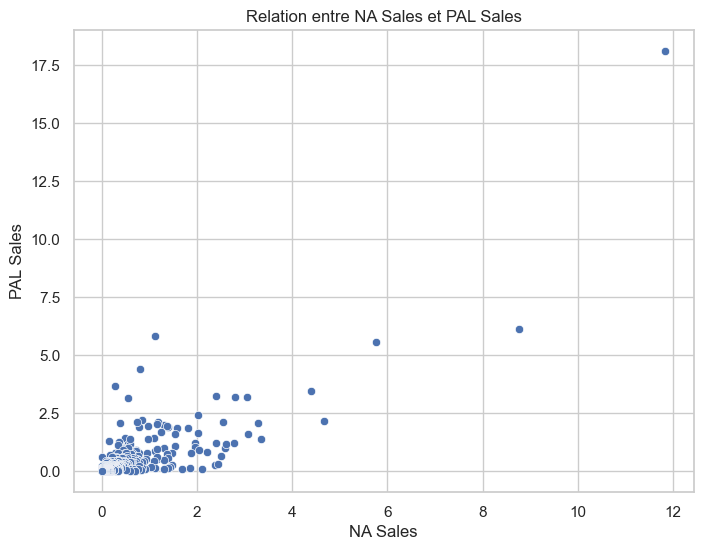

In [474]:
#----------------------------------
# 1. Vérification de la linéarité : Nuage de points (Scatter Plot)
#----------------------------------
# Création du scatter plot pour visualiser la relation linéaire
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_console_constru['na_sales'], 
    y=df_sales_16['pal_sales']
)

# Ajout des titres et étiquettes
plt.title('Relation entre NA Sales et PAL Sales')
plt.xlabel('NA Sales')
plt.ylabel('PAL Sales')

# Affichage du graphique
plt.show()


La relation entre NA Sales et PAL Sales semble globalement positive et linéaire dans les données, mais il y a :

Une forte densité de points proches de l'origine (faibles ventes).
Quelques points dispersés avec des ventes élevées, qui pourraient être des outliers (valeurs aberrantes).


In [475]:
#----------------------------------
# 1. Application du test de Shapiro-Wilk pour savoir si les données des ventes suivent une distribution normale
#----------------------------------
# Calcul des statistiques et des p-values pour NA Sales et PAL Sales
stat_na, p_na = shapiro(df_console_constru['na_sales'])
stat_pal, p_pal = shapiro(df_console_constru['pal_sales'])

#----------------------------------
# 2. Affichage des résultats
#----------------------------------

print(f"Shapiro-Wilk NA Sales : p = {p_na}")
print(f"Shapiro-Wilk PAL Sales : p = {p_pal}")

#----------------------------------
# 3. Interprétation des résultats
#----------------------------------

if p_na < 0.05 or p_pal < 0.05:
    print("Les données ne suivent pas une distribution normale.")
else:
    print("Les données suivent une distribution normale.")


Shapiro-Wilk NA Sales : p = 5.933771668127594e-58
Shapiro-Wilk PAL Sales : p = 6.755123592038345e-60
Les données ne suivent pas une distribution normale.


Les p-values pour NA Sales et PAL Sales sont toutes deux extrêmement faibles (p < 0.05), ce qui indique que les distributions ne sont pas normales.
Cela viole une hypothèse de base de la corrélation de Pearson.

In [476]:
#----------------------------------
# 2. Application du test Kolmogorov-Smirnov pour NA Sales
#----------------------------------
ks_stat_na, ks_p_value_na = kstest(df_console_constru['na_sales'], 'norm')

#----------------------------------
# 3. Affichage des résultats pour NA Sales
#----------------------------------
print(f"Kolmogorov-Smirnov NA Sales : Statistic = {ks_stat_na:.5f}, p-value = {ks_p_value_na:.5f}")

#----------------------------------
# 4. Application du test Kolmogorov-Smirnov pour PAL Sales
#----------------------------------
ks_stat_pal, ks_p_value_pal = kstest(df_console_constru['pal_sales'], 'norm')

#----------------------------------
# 5. Affichage des résultats pour PAL Sales
#----------------------------------
print(f"Kolmogorov-Smirnov PAL Sales : Statistic = {ks_stat_pal:.5f}, p-value = {ks_p_value_pal:.5f}")

#----------------------------------
# 6. Interprétation des résultats
#----------------------------------
if ks_p_value_na < 0.05:
    print("Les données de NA Sales ne suivent pas une distribution normale (p < 0.05).")
else:
    print("Les données de NA Sales suivent une distribution normale (p >= 0.05).")

if ks_p_value_pal < 0.05:
    print("Les données de PAL Sales ne suivent pas une distribution normale (p < 0.05).")
else:
    print("Les données de PAL Sales suivent une distribution normale (p >= 0.05).")


Kolmogorov-Smirnov NA Sales : Statistic = 0.50000, p-value = 0.00000
Kolmogorov-Smirnov PAL Sales : Statistic = 0.50000, p-value = 0.00000
Les données de NA Sales ne suivent pas une distribution normale (p < 0.05).
Les données de PAL Sales ne suivent pas une distribution normale (p < 0.05).


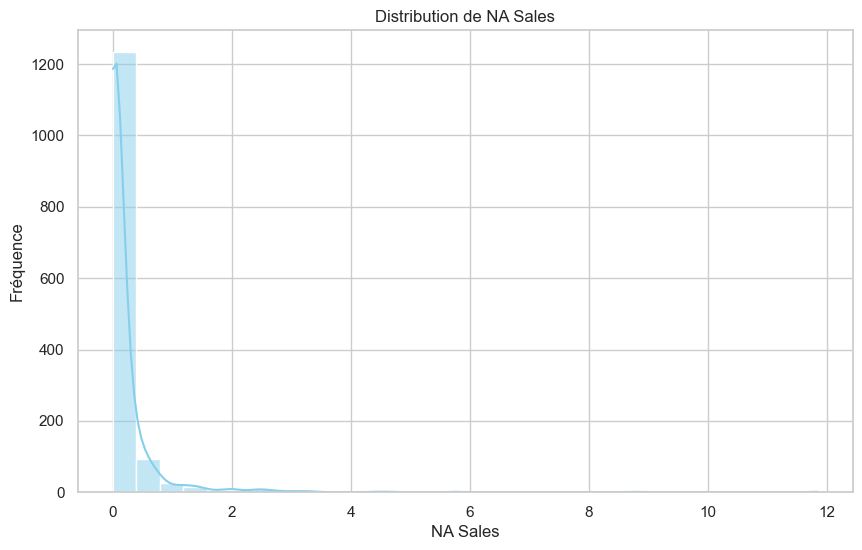

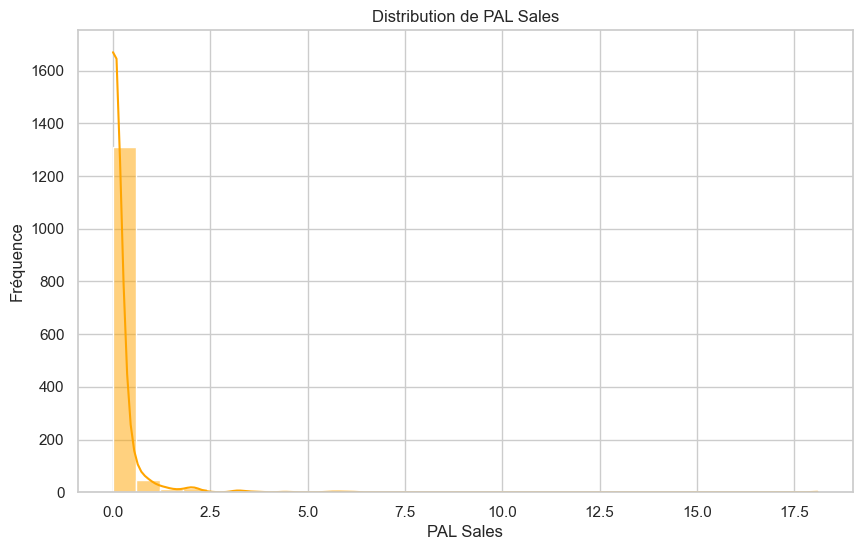

In [477]:
#----------------------------------
# 1. Visualisation de la distribution de NA Sales
#----------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df_console_constru['na_sales'], kde=True, bins=30, color='skyblue')
plt.title("Distribution de NA Sales")
plt.xlabel("NA Sales")
plt.ylabel("Fréquence")
plt.show()

#----------------------------------
# 2. Visualisation de la distribution de PAL Sales
#----------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df_console_constru['pal_sales'], kde=True, bins=30, color='orange')
plt.title("Distribution de PAL Sales")
plt.xlabel("PAL Sales")
plt.ylabel("Fréquence")
plt.show()


La distribution de NA Sales et PAL Sales montre une forte asymétrie positive, avec la majorité des valeurs très concentrées autour de 0, et quelques valeurs beaucoup plus élevées qui créent une longue queue à droite.

Analyse :
Asymétrie et absence de normalité :

Cette forme de distribution confirme pourquoi les tests de normalité (Kolmogorov-Smirnov) ont rejeté l'hypothèse de normalité.
Cela indique que les données contiennent probablement des valeurs extrêmes (outliers).

In [478]:
#----------------------------------
# 1. Calcul de la corrélation de Spearman
#----------------------------------
# Calcul de la corrélation de Spearman entre NA Sales et PAL Sales
rho, p_value = spearmanr(df_console_constru['na_sales'], df_console_constru['pal_sales'])

#----------------------------------
# Affichage des résultats
#---------------------------------- 
print(f"Corrélation de Spearman (rho) : {rho}")
print(f"P-value : {p_value}")

#----------------------------------
# Interprétation
#---------------------------------- 
if p_value < 0.05:
    print("La corrélation est statistiquement significative (p < 0.05).")
else:
    print("La corrélation n'est pas statistiquement significative (p >= 0.05).")


Corrélation de Spearman (rho) : 0.8176781607611543
P-value : 0.0
La corrélation est statistiquement significative (p < 0.05).


Avec une corrélation de Spearman (rho) = 0.8162, cela indique une relation monotone forte et positive entre les ventes NA Sales et PAL Sales. De plus, une p-value = 0.0 confirme que cette relation est statistiquement significative (p < 0.05).

## Prétraitement des données pour prédire les ventes

In [479]:
# --------------------------------------------------
# 1. Convertir les années en dates (1er janvier de chaque année)
# --------------------------------------------------
df_console_constru['timestamp'] = pd.to_datetime(df_console_constru['Year'].astype(str) + '-01-01')

# --------------------------------------------------
# 2. Convertir en timestamp Unix (en secondes)
# --------------------------------------------------
df_console_constru['timestamp'] = df_console_constru['timestamp'].astype('int64') // 10**9  # Conversion en secondes

# --------------------------------------------------
# 3. Initialiser l'encodeur OneHotEncoder
# --------------------------------------------------
encoder = OneHotEncoder(sparse_output=False)

# --------------------------------------------------
# 4. Encodage des colonnes catégoriques
# --------------------------------------------------
encoded_columns = encoder.fit_transform(df_console_constru[['genre', 'Constructeur']])

# --------------------------------------------------
# 5. Conversion en DataFrame avec les bons index et noms de colonnes
# --------------------------------------------------
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(), index=df_console_constru.index)

# --------------------------------------------------
# 6. Concaténation avec le DataFrame d'origine
# --------------------------------------------------
df_encoded = pd.concat([df_console_constru.drop(['genre', 'Constructeur'], axis=1), encoded_df], axis=1)

# --------------------------------------------------
# 7. Affichage du DataFrame encodé
# --------------------------------------------------
df_encoded.head(2)


Rank                      title console  Year             publisher  \
34    34  Call of Duty: Black Ops 3     PS4  2015            Activision   
42    45         Grand Theft Auto V     PS4  2014  Take-Two Interactive   

   Portable  na_sales  pal_sales  jp_sales  other_sales  ...  genre_Puzzle  \
34      non      5.77       5.58      0.34         2.24  ...           0.0   
42      non     11.84      18.10      0.95         6.06  ...           0.0   

    genre_Racing  genre_Role-Playing  genre_Shooter  genre_Simulation  \
34           0.0                 0.0            1.0               0.0   
42           0.0                 0.0            0.0               0.0   

    genre_Sports  genre_Strategy  Constructeur_Microsoft  \
34           0.0             0.0                     0.0   
42           0.0             0.0                     0.0   

    Constructeur_Nintendo  Constructeur_Sony  
34                    0.0                1.0  
42                    0.0                1.0  

[2 rows x 27 columns]

In [480]:
# --------------------------------------------------
# suppression de colonnes inutiles
# --------------------------------------------------

df_encoded = df_encoded.drop(['title', 'Rank', 'console', 'publisher', 'Portable'],axis=1)

In [481]:
df_encoded.head(2)

Year  na_sales  pal_sales  jp_sales  other_sales  total_sales   timestamp  \
34  2015      5.77       5.58      0.34         2.24        13.93  1420070400   
42  2014     11.84      18.10      0.95         6.06        36.94  1388534400   

    genre_Action  genre_Adventure  genre_Fighting  ...  genre_Puzzle  \
34           0.0              0.0             0.0  ...           0.0   
42           1.0              0.0             0.0  ...           0.0   

    genre_Racing  genre_Role-Playing  genre_Shooter  genre_Simulation  \
34           0.0                 0.0            1.0               0.0   
42           0.0                 0.0            0.0               0.0   

    genre_Sports  genre_Strategy  Constructeur_Microsoft  \
34           0.0             0.0                     0.0   
42           0.0             0.0                     0.0   

    Constructeur_Nintendo  Constructeur_Sony  
34                    0.0                1.0  
42                    0.0                1.0  

[2 rows x 22 columns]

In [482]:
df_encoded.columns

Index(['Year', 'na_sales', 'pal_sales', 'jp_sales', 'other_sales',
       'total_sales', 'timestamp', 'genre_Action', 'genre_Adventure',
       'genre_Fighting', 'genre_Misc', 'genre_Platform', 'genre_Puzzle',
       'genre_Racing', 'genre_Role-Playing', 'genre_Shooter',
       'genre_Simulation', 'genre_Sports', 'genre_Strategy',
       'Constructeur_Microsoft', 'Constructeur_Nintendo', 'Constructeur_Sony'],
      dtype='object')

In [483]:
# --------------------------------------------------
# Vérification des valeurs manquantes dans la colonne 'na_sales'
# --------------------------------------------------
missing_values_na_sales = df_encoded['na_sales'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'na_sales' : {missing_values_na_sales}")

# --------------------------------------------------
# Vérification des zéros dans la colonne 'na_sales'
# --------------------------------------------------
zero_values_na_sales = (df_encoded['na_sales'] == 0).sum()
print(f"Nombre de zéros dans 'na_sales' : {zero_values_na_sales}")

# --------------------------------------------------
# Vérification des valeurs uniques dans 'na_sales' pour mieux comprendre la distribution
# --------------------------------------------------
unique_values_na_sales = df_encoded['na_sales'].unique()
print(f"Valeurs uniques dans 'na_sales' : {unique_values_na_sales}")

# --------------------------------------------------
#  Vérifier si des valeurs négatives existent
# --------------------------------------------------
valeurs_negatives = df_encoded[df_encoded['na_sales'] < 0]

# --------------------------------------------------
#  Afficher le nombre de valeurs négatives
# --------------------------------------------------
print(f"Nombre de valeurs négatives : {valeurs_negatives.shape[0]}")

# --------------------------------------------------
#  Afficher les lignes contenant des valeurs négatives (si elles existent)
# --------------------------------------------------
if not valeurs_negatives.empty:
    print(valeurs_negatives)


# --------------------------------------------------
# Afficher quelques lignes de la colonne 'na_sales' pour un examen plus approfondi
# --------------------------------------------------
print("\nQuelques valeurs de 'na_sales' :")
print(df_encoded[['na_sales']].head())


Nombre de valeurs manquantes dans 'na_sales' : 0
Nombre de zéros dans 'na_sales' : 591
Valeurs uniques dans 'na_sales' : [5.770e+00 1.184e+01 4.400e+00 1.120e+00 3.340e+00 3.050e+00 2.800e+00
 4.660e+00 3.290e+00 2.400e+00 8.100e-01 2.540e+00 2.030e+00 8.770e+00
 3.080e+00 2.590e+00 5.500e-01 2.700e-01 1.820e+00 2.020e+00 1.530e+00
 2.780e+00 1.590e+00 2.610e+00 1.390e+00 1.300e+00 1.180e+00 1.370e+00
 7.000e-01 1.160e+00 2.500e+00 1.550e+00 9.800e-01 1.250e+00 1.960e+00
 1.100e+00 2.210e+00 8.400e-01 2.380e+00 1.970e+00 7.900e-01 2.040e+00
 2.400e-01 7.500e-01 3.000e-02 1.130e+00 2.450e+00 4.800e-01 3.900e-01
 1.880e+00 1.310e+00 1.480e+00 0.000e+00 2.110e+00 9.600e-01 5.000e-01
 1.400e+00 1.170e+00 1.850e+00 5.900e-01 6.000e-01 7.200e-01 3.700e-01
 6.900e-01 1.690e+00 5.600e-01 6.300e-01 4.700e-01 1.430e+00 3.400e-01
 6.700e-01 6.400e-01 6.200e-01 4.400e-01 6.600e-01 6.100e-01 9.400e-01
 7.600e-01 1.600e-01 7.400e-01 8.800e-01 5.100e-01 4.600e-01 5.200e-01
 1.040e+00 8.300e-01 4.500e

In [484]:
print(df_encoded['na_sales'].describe())


count    1398.000000
mean        0.190694
std         0.592680
min         0.000000
25%         0.000000
50%         0.020000
75%         0.140000
max        11.840000
Name: na_sales, dtype: float64


In [485]:
# --------------------------------------------------
# Remplacer les zéros dans 'na_sales' par la médiane des autres valeurs
# --------------------------------------------------
na_sales_median = df_encoded[df_encoded['na_sales'] != 0]['na_sales'].median()
df_encoded['na_sales'] = df_encoded['na_sales'].replace(0, na_sales_median)

# --------------------------------------------------
# Vérification après remplacement
# --------------------------------------------------
print(f"Nombre de zéros après remplacement : {(df_encoded['na_sales'] == 0).sum()}")


Nombre de zéros après remplacement : 0


In [486]:
# --------------------------------------------------
# Vérification des valeurs manquantes dans la colonne 'pal_sales'
# --------------------------------------------------
missing_values_pal_sales = df_encoded['pal_sales'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'pal_sales' : {missing_values_pal_sales}")

# --------------------------------------------------
# Vérification des zéros dans la colonne 'pal_sales'
# --------------------------------------------------
zero_values_pal_sales = (df_encoded['pal_sales'] == 0).sum()
print(f"Nombre de zéros dans 'pal_sales' : {zero_values_pal_sales}")

# --------------------------------------------------
# Vérification des valeurs uniques dans 'pal_sales' pour mieux comprendre la distribution
# --------------------------------------------------
unique_values_pal_sales = df_encoded['pal_sales'].unique()
print(f"Valeurs uniques dans 'pal_sales' : {unique_values_pal_sales}")

# --------------------------------------------------
#  Vérifier si des valeurs négatives existent
# --------------------------------------------------
valeurs_negatives = df_encoded[df_encoded['pal_sales'] < 0]

# --------------------------------------------------
#  Afficher le nombre de valeurs négatives
# --------------------------------------------------
print(f"Nombre de valeurs négatives : {valeurs_negatives.shape[0]}")

# --------------------------------------------------
#  Afficher les lignes contenant des valeurs négatives (si elles existent)
# --------------------------------------------------
if not valeurs_negatives.empty:
    print(valeurs_negatives)

# --------------------------------------------------
# Afficher quelques lignes de la colonne 'pal_sales' pour un examen plus approfondi
# --------------------------------------------------
print("\nQuelques valeurs de 'pal_sales' :")
print(df_encoded[['pal_sales']].head())


Nombre de valeurs manquantes dans 'pal_sales' : 0
Nombre de zéros dans 'pal_sales' : 542
Valeurs uniques dans 'pal_sales' : [5.58e+00 1.81e+01 3.44e+00 5.82e+00 1.38e+00 3.19e+00 3.20e+00 2.17e+00
 2.09e+00 3.24e+00 4.42e+00 2.11e+00 2.43e+00 6.11e+00 1.59e+00 1.02e+00
 3.17e+00 3.68e+00 1.85e+00 1.66e+00 1.10e+00 1.23e+00 1.86e+00 1.19e+00
 1.92e+00 2.01e+00 2.14e+00 1.96e+00 5.10e-01 1.22e+00 2.02e+00 6.60e-01
 1.61e+00 1.94e+00 1.67e+00 1.42e+00 8.50e-01 2.19e+00 2.90e-01 1.04e+00
 9.20e-01 1.90e-01 2.12e+00 0.00e+00 8.90e-01 3.30e-01 1.41e+00 2.08e+00
 7.80e-01 9.90e-01 8.00e-01 8.00e-02 7.50e-01 5.20e-01 1.45e+00 5.70e-01
 9.70e-01 7.70e-01 1.40e-01 1.18e+00 1.17e+00 9.00e-01 1.27e+00 2.60e-01
 8.80e-01 9.00e-02 5.00e-01 6.10e-01 7.90e-01 3.50e-01 8.10e-01 9.50e-01
 8.70e-01 1.80e-01 1.12e+00 6.90e-01 4.60e-01 7.60e-01 1.50e-01 9.30e-01
 6.40e-01 7.40e-01 5.40e-01 4.50e-01 6.70e-01 1.30e+00 2.20e-01 2.00e-01
 4.80e-01 2.80e-01 3.80e-01 4.40e-01 5.50e-01 5.80e-01 4.70e-01 4.20e-01


In [487]:
# --------------------------------------------------
# Remplacer les zéros dans 'pal_sales' par la médiane des autres valeurs
# --------------------------------------------------
pal_sales_median = df_encoded[df_encoded['pal_sales'] != 0]['pal_sales'].median()
df_encoded['pal_sales'] = df_encoded['pal_sales'].replace(0, na_sales_median)

# --------------------------------------------------
# Vérification après remplacement
# --------------------------------------------------
print(f"Nombre de zéros après remplacement : {(df_encoded['pal_sales'] == 0).sum()}")


Nombre de zéros après remplacement : 0


In [488]:
# --------------------------------------------------
# Vérification des valeurs manquantes dans la colonne 'jp_sales'
# --------------------------------------------------
missing_values_jp_sales = df_encoded['jp_sales'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'jp_sales' : {missing_values_jp_sales}")

# --------------------------------------------------
# Vérification des zéros dans la colonne 'jp_sales'
# --------------------------------------------------
zero_values_jp_sales = (df_encoded['jp_sales'] == 0).sum()
print(f"Nombre de zéros dans 'jp_sales' : {zero_values_jp_sales}")

# --------------------------------------------------
# Vérification des valeurs uniques dans 'jp_sales' pour mieux comprendre la distribution
# --------------------------------------------------
unique_values_jp_sales = df_encoded['jp_sales'].unique()
print(f"Valeurs uniques dans 'jp_sales' : {unique_values_jp_sales}")

# --------------------------------------------------
#  Vérifier si des valeurs négatives existent
# --------------------------------------------------
valeurs_negatives = df_encoded[df_encoded['jp_sales'] < 0]

# --------------------------------------------------
#  Afficher le nombre de valeurs négatives
# --------------------------------------------------
print(f"Nombre de valeurs négatives : {valeurs_negatives.shape[0]}")

# --------------------------------------------------
#  Afficher les lignes contenant des valeurs négatives (si elles existent)
# --------------------------------------------------
if not valeurs_negatives.empty:
    print(valeurs_negatives)


# --------------------------------------------------
# Afficher quelques lignes de la colonne 'jp_sales' pour un examen plus approfondi
# --------------------------------------------------
print("\nQuelques valeurs de 'jp_sales' :")
print(df_encoded[['jp_sales']].head())


Nombre de valeurs manquantes dans 'jp_sales' : 0
Nombre de zéros dans 'jp_sales' : 596
Valeurs uniques dans 'jp_sales' : [0.34 0.95 3.2  0.06 2.54 0.23 0.14 0.01 1.32 0.05 0.17 0.   0.82 0.04
 0.07 0.08 1.38 0.19 0.03 0.12 0.18 0.1  2.75 0.21 0.15 0.02 0.48 2.7
 3.08 0.89 1.4  2.68 0.26 0.91 2.23 0.13 0.77 0.11 0.25 0.33 0.5  0.27
 0.41 1.31 0.16 0.44 0.83 0.8  0.36 0.22 0.68 0.28 0.62 0.43 0.53 0.51
 0.09 0.24 0.37 0.38 0.35 0.2  0.32 0.3 ]
Nombre de valeurs négatives : 0

Quelques valeurs de 'jp_sales' :
    jp_sales
34      0.34
42      0.95
46      3.20
83      0.06
94      2.54


In [489]:
# --------------------------------------------------
# Remplacer les zéros dans 'jp_sales' par la médiane des autres valeurs
# --------------------------------------------------
jp_sales_median = df_encoded[df_encoded['jp_sales'] != 0]['jp_sales'].median()
df_encoded['jp_sales'] = df_encoded['jp_sales'].replace(0, jp_sales_median)

# --------------------------------------------------
# Vérification après remplacement
# --------------------------------------------------
print(f"Nombre de zéros après remplacement : {(df_encoded['jp_sales'] == 0).sum()}")


Nombre de zéros après remplacement : 0


In [490]:
# --------------------------------------------------
# Vérification des valeurs manquantes dans la colonne 'other_sales'
# --------------------------------------------------
missing_values_other_sales = df_encoded['other_sales'].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'other_sales' : {missing_values_other_sales}")

# --------------------------------------------------
# Vérification des zéros dans la colonne 'other_sales'
# --------------------------------------------------
zero_values_other_sales = (df_encoded['other_sales'] == 0).sum()
print(f"Nombre de zéros dans 'other_sales' : {zero_values_other_sales}")

# --------------------------------------------------
# Vérification des valeurs uniques dans 'other_sales' pour mieux comprendre la distribution
# --------------------------------------------------
unique_values_other_sales = df_encoded['other_sales'].unique()
print(f"Valeurs uniques dans 'other_sales' : {unique_values_other_sales}")

# --------------------------------------------------
#  Vérifier si des valeurs négatives existent
# --------------------------------------------------
valeurs_negatives = df_encoded[df_encoded['other_sales'] < 0]

# --------------------------------------------------
#  Afficher le nombre de valeurs négatives
# --------------------------------------------------
print(f"Nombre de valeurs négatives : {valeurs_negatives.shape[0]}")

# --------------------------------------------------
#  Afficher les lignes contenant des valeurs négatives (si elles existent)
# --------------------------------------------------
if not valeurs_negatives.empty:
    print(valeurs_negatives)


# --------------------------------------------------
# Afficher quelques lignes de la colonne 'other_sales' pour un examen plus approfondi
# --------------------------------------------------
print("\nQuelques valeurs de 'other_sales' :")
print(df_encoded[['other_sales']].head())


Nombre de valeurs manquantes dans 'other_sales' : 0
Nombre de zéros dans 'other_sales' : 625
Valeurs uniques dans 'other_sales' : [2.24 6.06 0.64 1.21 0.43 1.19 1.44 0.68 0.49 1.13 1.48 0.96 0.99 1.43
 0.37 0.58 1.06 0.71 0.8  0.76 0.41 0.38 0.74 0.39 0.79 0.66 0.72 0.11
 0.59 0.54 0.57 0.3  0.47 0.24 0.61 0.5  0.23 0.04 0.29 0.   0.2  0.31
 0.12 0.51 0.22 0.48 0.27 0.36 0.18 0.35 0.19 0.32 0.33 0.14 0.34 0.25
 0.16 0.09 0.15 0.26 0.28 0.13 0.1  0.21 0.17 0.08 0.07 0.06 0.05 0.03
 0.02 0.01]
Nombre de valeurs négatives : 0

Quelques valeurs de 'other_sales' :
    other_sales
34         2.24
42         6.06
46         0.64
83         1.21
94         0.43


In [491]:
# --------------------------------------------------
# Remplacer les zéros dans 'jp_sales' par la médiane des autres valeurs
# --------------------------------------------------
other_sales_median = df_encoded[df_encoded['other_sales'] != 0]['other_sales'].median()
df_encoded['other_sales'] = df_encoded['other_sales'].replace(0, other_sales_median)

# --------------------------------------------------
# Vérification après remplacement
# --------------------------------------------------
print(f"Nombre de zéros après remplacement : {(df_encoded['other_sales'] == 0).sum()}")


Nombre de zéros après remplacement : 0


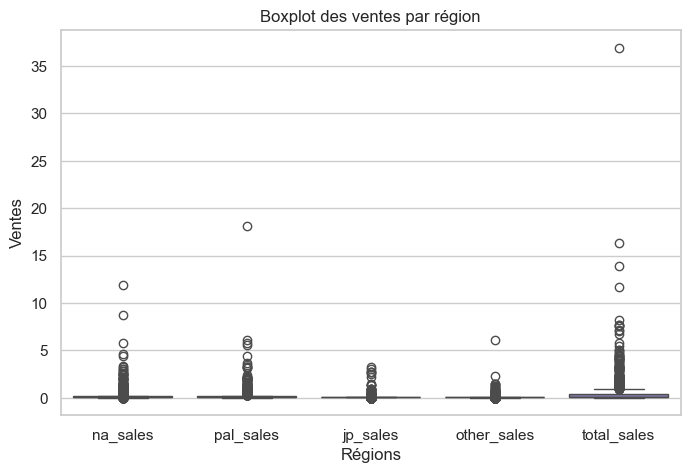

In [492]:
# --------------------------------------------------
# Vérification des outliers
# --------------------------------------------------

plt.figure(figsize=(8, 5))

# Passer les colonnes sous forme de DataFrame dans `data`
sns.boxplot(data=df_encoded[['na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'total_sales']])

plt.title("Boxplot des ventes par région")
plt.xlabel("Régions")
plt.ylabel("Ventes")
plt.show()


In [493]:
# --------------------------------------------------
# 1. Sélection des colonnes de ventes pour l'analyse des valeurs aberrantes
# --------------------------------------------------
sales_columns = ['na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'total_sales']

# --------------------------------------------------
# 2. Calcul des quartiles et de l'IQR (Interquartile Range)
# --------------------------------------------------
Q1 = df_encoded[sales_columns].quantile(0.25)  # Premier quartile (Q1)
Q3 = df_encoded[sales_columns].quantile(0.75)  # Troisième quartile (Q3)
IQR = Q3 - Q1  # Écart interquartile (IQR)

# --------------------------------------------------
# 3. Définition des seuils pour détecter les valeurs aberrantes
#    - Seuil inférieur : Q1 - 2.5 * IQR
#    - Seuil supérieur : Q3 + 2.5 * IQR
# --------------------------------------------------
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR


In [494]:
# --------------------------------------------------
# Remplacer les outliers par la médiane 
# --------------------------------------------------
for col in ['na_sales', 'pal_sales', 'jp_sales', 'other_sales','total_sales']:
    median_value = df_encoded[col].median()
    df_encoded[col] = np.where(df_encoded[col] > upper_bound[col], median_value, df_encoded[col])


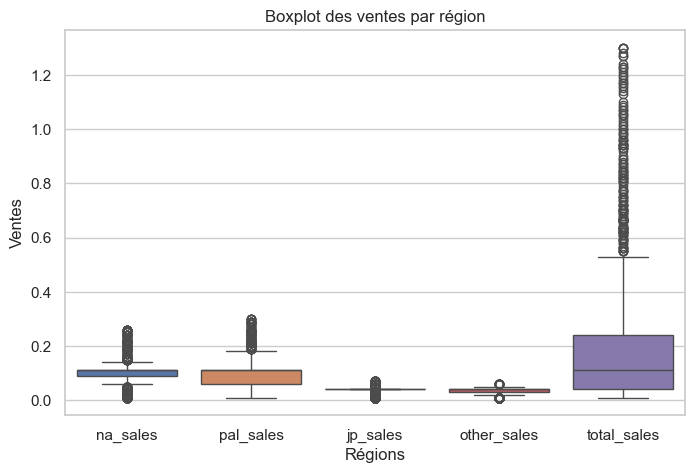

In [495]:
# --------------------------------------------------
# Vérification des outliers aprée le remplacement par la mediane
# --------------------------------------------------

plt.figure(figsize=(8, 5))

# Passer les colonnes sous forme de DataFrame dans `data`
sns.boxplot(data=df_encoded[['na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'total_sales']])

plt.title("Boxplot des ventes par région")
plt.xlabel("Régions")
plt.ylabel("Ventes")
plt.show()


In [496]:
# --------------------------------------------------
# 1. Liste des colonnes de ventes à transformer
# --------------------------------------------------
sales_columns = ['na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'total_sales']

# --------------------------------------------------
# 2. Appliquer une transformation logarithmique pour réduire l’impact des valeurs extrêmes
# --------------------------------------------------
for col in sales_columns:
    df_encoded[f'{col}_log'] = np.log1p(df_encoded[col])  # log(1 + x) pour éviter log(0)


In [497]:
df_encoded.describe()  # Vérifiez les statistiques des ventes


Year     na_sales    pal_sales     jp_sales  other_sales  \
count  1398.000000  1398.000000  1398.000000  1398.000000  1398.000000   
mean   2014.836910     0.099177     0.099292     0.036567     0.034249   
std       0.758071     0.045219     0.055186     0.012461     0.012248   
min    2014.000000     0.010000     0.010000     0.010000     0.010000   
25%    2014.000000     0.090000     0.060000     0.040000     0.030000   
50%    2015.000000     0.110000     0.110000     0.040000     0.040000   
75%    2015.000000     0.110000     0.110000     0.040000     0.040000   
max    2016.000000     0.260000     0.300000     0.070000     0.060000   

       total_sales     timestamp  genre_Action  genre_Adventure  \
count  1398.000000  1.398000e+03   1398.000000      1398.000000   
mean      0.200565  1.414927e+09      0.374821         0.105866   
std       0.260001  2.390651e+07      0.484250         0.307776   
min       0.010000  1.388534e+09      0.000000         0.000000   
25%       0.040000  1.388534e+09      0.000000         0.000000   
50%       0.110000  1.420070e+09      0.000000         0.000000   
75%       0.240000  1.420070e+09      1.000000         0.000000   
max       1.300000  1.451606e+09      1.000000         1.000000   

       genre_Fighting  ...  genre_Sports  genre_Strategy  \
count     1398.000000  ...   1398.000000     1398.000000   
mean         0.040057  ...      0.104435        0.013591   
std          0.196164  ...      0.305933        0.115826   
min          0.000000  ...      0.000000        0.000000   
25%          0.000000  ...      0.000000        0.000000   
50%          0.000000  ...      0.000000        0.000000   
75%          0.000000  ...      0.000000        0.000000   
max          1.000000  ...      1.000000        1.000000   

       Constructeur_Microsoft  Constructeur_Nintendo  Constructeur_Sony  \
count             1398.000000            1398.000000        1398.000000   
mean                 0.219599               0.200286           0.580114   
std                  0.414123               0.400358           0.493717   
min                  0.000000               0.000000           0.000000   
25%                  0.000000               0.000000           0.000000   
50%                  0.000000               0.000000           1.000000   
75%                  0.000000               0.000000           1.000000   
max                  1.000000               1.000000           1.000000   

       na_sales_log  pal_sales_log  jp_sales_log  other_sales_log  \
count   1398.000000    1398.000000   1398.000000      1398.000000   
mean       0.093721       0.093433      0.035841         0.033605   
std        0.040994       0.049446      0.012051         0.011910   
min        0.009950       0.009950      0.009950         0.009950   
25%        0.086178       0.058269      0.039221         0.029559   
50%        0.104360       0.104360      0.039221         0.039221   
75%        0.104360       0.104360      0.039221         0.039221   
max        0.231112       0.262364      0.067659         0.058269   

       total_sales_log  
count      1398.000000  
mean          0.163902  
std           0.184658  
min           0.009950  
25%           0.039221  
50%           0.104360  
75%           0.215111  
max           0.832909  

[8 rows x 27 columns]

In [498]:
print(df_encoded.columns)


Index(['Year', 'na_sales', 'pal_sales', 'jp_sales', 'other_sales',
       'total_sales', 'timestamp', 'genre_Action', 'genre_Adventure',
       'genre_Fighting', 'genre_Misc', 'genre_Platform', 'genre_Puzzle',
       'genre_Racing', 'genre_Role-Playing', 'genre_Shooter',
       'genre_Simulation', 'genre_Sports', 'genre_Strategy',
       'Constructeur_Microsoft', 'Constructeur_Nintendo', 'Constructeur_Sony',
       'na_sales_log', 'pal_sales_log', 'jp_sales_log', 'other_sales_log',
       'total_sales_log'],
      dtype='object')


## Entraînement de l'algorithme 

In [499]:
# --------------------------------------------------
# 1. Calculer le nombre total d'unités vendues (conversion en unités)
# --------------------------------------------------
df_cleaned = df_encoded.copy()  # Travailler sur une copie propre
df_cleaned['total_units_sold'] = df_cleaned['total_sales'] * 1_000_000

# --------------------------------------------------
# 2. Transformation logarithmique pour stabiliser la variance
# --------------------------------------------------
df_cleaned['total_units_sold_log'] = np.log1p(df_cleaned['total_units_sold'])

# --------------------------------------------------
# 3. Définition des variables d'entrée (X) et de la variable cible (y)
# --------------------------------------------------
X = df_cleaned.drop(['total_sales', 'total_units_sold', 'total_units_sold_log'], axis=1)
y = df_cleaned['total_units_sold_log']

# --------------------------------------------------
# 4. Séparation des données en ensembles d'entraînement et de test
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------------
# 5. Normalisation des données
# --------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------------
# 6. Réduction de dimension avec PCA (optionnel)
# --------------------------------------------------
pca = PCA(n_components=0.95)  # Conserver 95% de la variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --------------------------------------------------
# 7. Modélisation avec Random Forest
# --------------------------------------------------
model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train_pca, y_train)

# --------------------------------------------------
# 8. Évaluation du modèle
# --------------------------------------------------
y_pred = model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

# --------------------------------------------------
# 9. Création des données pour 2030
# --------------------------------------------------
df_2030 = X.copy()
df_2030['Year'] = 2030
n_years_to_2030 = 2030 - df_cleaned['Year'].max()

# Appliquer une croissance annuelle sur les ventes régionales
growth_rates = {'na_sales_log': 0.038, 'pal_sales_log': 0.032, 'jp_sales_log': 0.012, 'other_sales_log': 0.043}
for region in growth_rates.keys():
    df_2030[region] = df_cleaned[region].median() * ((1 + growth_rates[region]) ** n_years_to_2030)

# --------------------------------------------------
# 10. Normalisation et prédictions pour 2030
# --------------------------------------------------
X_2030_scaled = scaler.transform(df_2030)
X_2030_pca = pca.transform(X_2030_scaled)
y_pred_2030_log = model.predict(X_2030_pca)
y_pred_2030 = np.expm1(y_pred_2030_log)  # Convertir en valeurs normales

df_2030['predicted_units_sold'] = y_pred_2030

# --------------------------------------------------
# 11. Estimation du nombre total de jeux vendus
# --------------------------------------------------
total_games_sold_2030 = df_2030['predicted_units_sold'].sum()
print(f"\nNombre total de jeux vendus en 2030 (prédiction) : {int(total_games_sold_2030)}")


Root Mean Squared Error (RMSE): 0.5253
Mean Absolute Error (MAE): 0.3489
R2 Score: 0.8281

Nombre total de jeux vendus en 2030 (prédiction) : 116902830


Les résultats montrent que le modèle a de très bonnes performances
Interprétation des métriques :

Root Mean Squared Error (RMSE) : 0.5253

Le RMSE est très faible, ce qui signifie que les erreurs de prédiction sont petites en moyenne. Cela indique que le modèle fait de bonnes prédictions, proches des valeurs réelles.
    
Mean Absolute Error (MAE) : 0.3489

Le MAE est aussi très bas, ce qui suggère que, en moyenne, les erreurs absolues entre les valeurs réelles et prédites sont relativement petites.
C'est un bon indicateur de la précision du modèle.
R² Score : 0.8281

Le R² score est très proche de 1, ce qui signifie que le modèle explique presque toute la variance dans les données. Un R² aussi élevé est généralement 
un signe d'un modèle très performant.

### Ventes prédites par genre en 2030 

In [500]:
# --------------------------------------------------
# 1. Identifier les colonnes des constructeurs
# --------------------------------------------------
genre_cols = [col for col in df_2030.columns if col.startswith('genre_')]

# --------------------------------------------------
# 2. Déterminer le genre principal pour chaque jeu
#    (colonne ayant la valeur maximale)
# --------------------------------------------------
df_2030['genre'] = df_2030[genre_cols].idxmax(axis=1).str.replace('genre_', '')

# --------------------------------------------------
# 3. Agréger les ventes prédites par genre
#    et trier les résultats par ordre décroissant
# --------------------------------------------------
sales_by_genre = (
    df_2030.groupby('genre')['predicted_units_sold']
    .sum()
    .reset_index()
    .sort_values(by='predicted_units_sold', ascending=False)
)

# --------------------------------------------------
# 4. Afficher les résultats
# --------------------------------------------------
print("Nombre total de jeux vendus en 2030 par genre (prédiction) :")
print(sales_by_genre)

Nombre total de jeux vendus en 2030 par genre (prédiction) :
           genre  predicted_units_sold
0         Action          4.657085e+07
8        Shooter          1.424712e+07
7   Role-Playing          1.276006e+07
10        Sports          1.206264e+07
3           Misc          9.163251e+06
1      Adventure          7.952466e+06
6         Racing          3.840701e+06
2       Fighting          3.602876e+06
4       Platform          3.380567e+06
9     Simulation          1.786332e+06
11      Strategy          7.704501e+05
5         Puzzle          7.655157e+05


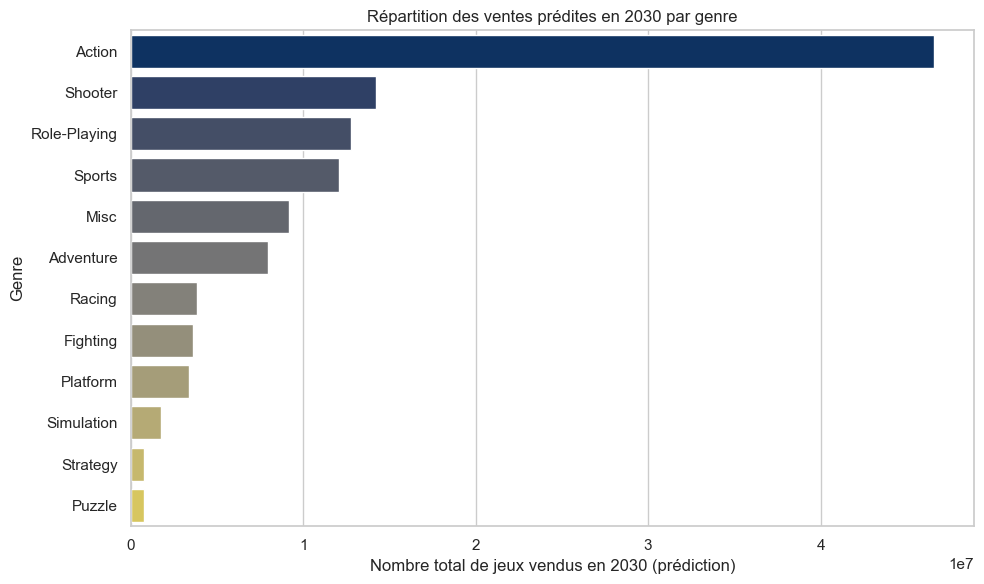

In [501]:
# --------------------------------------------------
# 1. Définir la taille de la figure
# --------------------------------------------------
plt.figure(figsize=(10, 6))

# --------------------------------------------------
# 2. Créer un graphique en barres pour afficher les ventes prédites par genre
# --------------------------------------------------
ax = sns.barplot(
    data=sales_by_genre, 
    x='predicted_units_sold', 
    y='genre', 
    hue='genre', 
    palette='cividis', 
    dodge=False
)

# --------------------------------------------------
# 3. Supprimer la légende si elle est présente
# --------------------------------------------------
leg = ax.get_legend()
if leg is not None:
    leg.remove()

# --------------------------------------------------
# 4. Ajouter les labels et le titre du graphique
# --------------------------------------------------
plt.xlabel("Nombre total de jeux vendus en 2030 (prédiction)")
plt.ylabel("Genre")
plt.title("Répartition des ventes prédites en 2030 par genre")

# --------------------------------------------------
# 5. Ajuster la mise en page et afficher le graphique
# --------------------------------------------------
plt.tight_layout()
plt.show()


La prévision pour 2030 montre que le genre Action restera largement dominant en termes de ventes, avec près de 45 millions de jeux vendus estimés. Les genres Shooter, Role-Playing et Sports suivent à distance, confirmant leur popularité constante. À l’inverse, les genres comme Puzzle, Stratégie ou Simulation devraient rester marginalisés, avec des ventes très faibles. Cette projection suggère une continuité des tendances actuelles, avec une domination des jeux dynamiques et immersifs.

### Ventes prédites par constructeur en 2030 

In [502]:
# --------------------------------------------------
# 1. Identifier les colonnes des constructeurs
# --------------------------------------------------
constructor_cols = [col for col in df_2030.columns if col.startswith('Constructeur_')]

# --------------------------------------------------
# 2. Déterminer le constructeur principal pour chaque jeu
#    (colonne ayant la valeur maximale)
# --------------------------------------------------
df_2030['Constructeur'] = df_2030[constructor_cols].idxmax(axis=1).str.replace('Constructeur_', '')

# --------------------------------------------------
# 3. Agréger les ventes prédites par constructeur
#    et trier les résultats par ordre décroissant
# --------------------------------------------------
sales_by_constructor = (
    df_2030.groupby('Constructeur')['predicted_units_sold']
    .sum()
    .reset_index()
    .sort_values(by='predicted_units_sold', ascending=False)
)

# --------------------------------------------------
# 4. Afficher les résultats
# --------------------------------------------------
print("Nombre total de jeux vendus en 2030 par constructeur (prédiction) :")
print(sales_by_constructor)


Nombre total de jeux vendus en 2030 par constructeur (prédiction) :
  Constructeur  predicted_units_sold
2         Sony          6.206975e+07
0    Microsoft          3.204677e+07
1     Nintendo          2.278631e+07


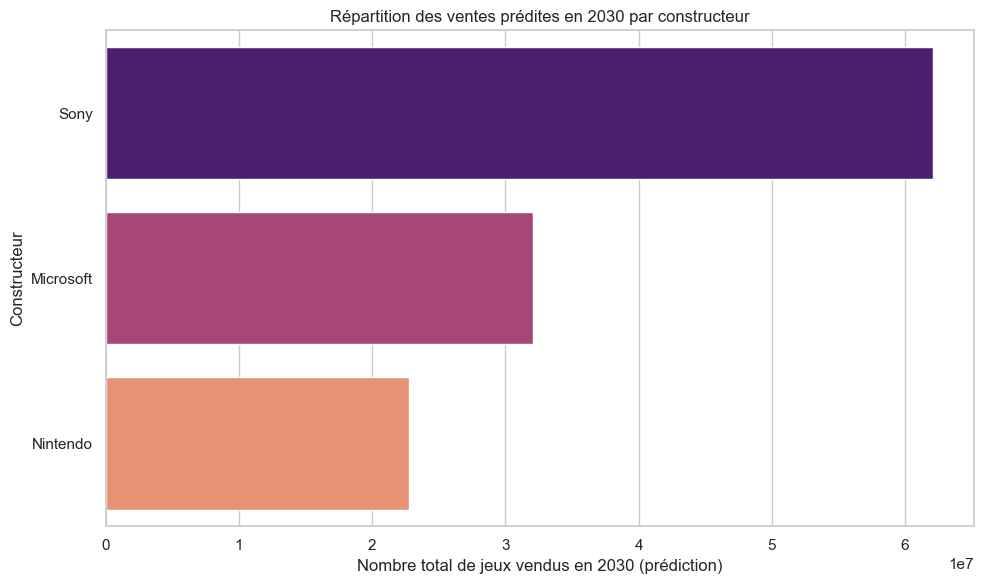

In [503]:
# --------------------------------------------------
# 1. Définir la taille de la figure
# --------------------------------------------------
plt.figure(figsize=(10, 6))

# --------------------------------------------------
# 2. Créer un graphique en barres des ventes par constructeur
# --------------------------------------------------
ax = sns.barplot(
    data=sales_by_constructor,
    x='predicted_units_sold',
    y='Constructeur',
    hue='Constructeur',
    palette='magma',
    dodge=False
)

# --------------------------------------------------
# 3. Supprimer la légende si elle est présente
# --------------------------------------------------
if ax.get_legend() is not None:
    ax.legend_.remove()

# --------------------------------------------------
# 4. Ajouter les labels et le titre du graphique
# --------------------------------------------------
plt.xlabel("Nombre total de jeux vendus en 2030 (prédiction)")
plt.ylabel("Constructeur")
plt.title("Répartition des ventes prédites en 2030 par constructeur")

# --------------------------------------------------
# 5. Ajuster la mise en page et afficher le graphique
# --------------------------------------------------
plt.tight_layout()
plt.show()


Ce graphique prévisionnel pour 2030 indique que Sony devrait conserver sa position de leader du marché, avec plus de 60 millions de jeux vendus estimés. Microsoft suit avec environ 32 millions, tandis que Nintendo arrive en troisième position avec près de 23 millions. Cela reflète une tendance à la stabilité des parts de marché des trois géants du secteur, avec un écart croissant en faveur de Sony.

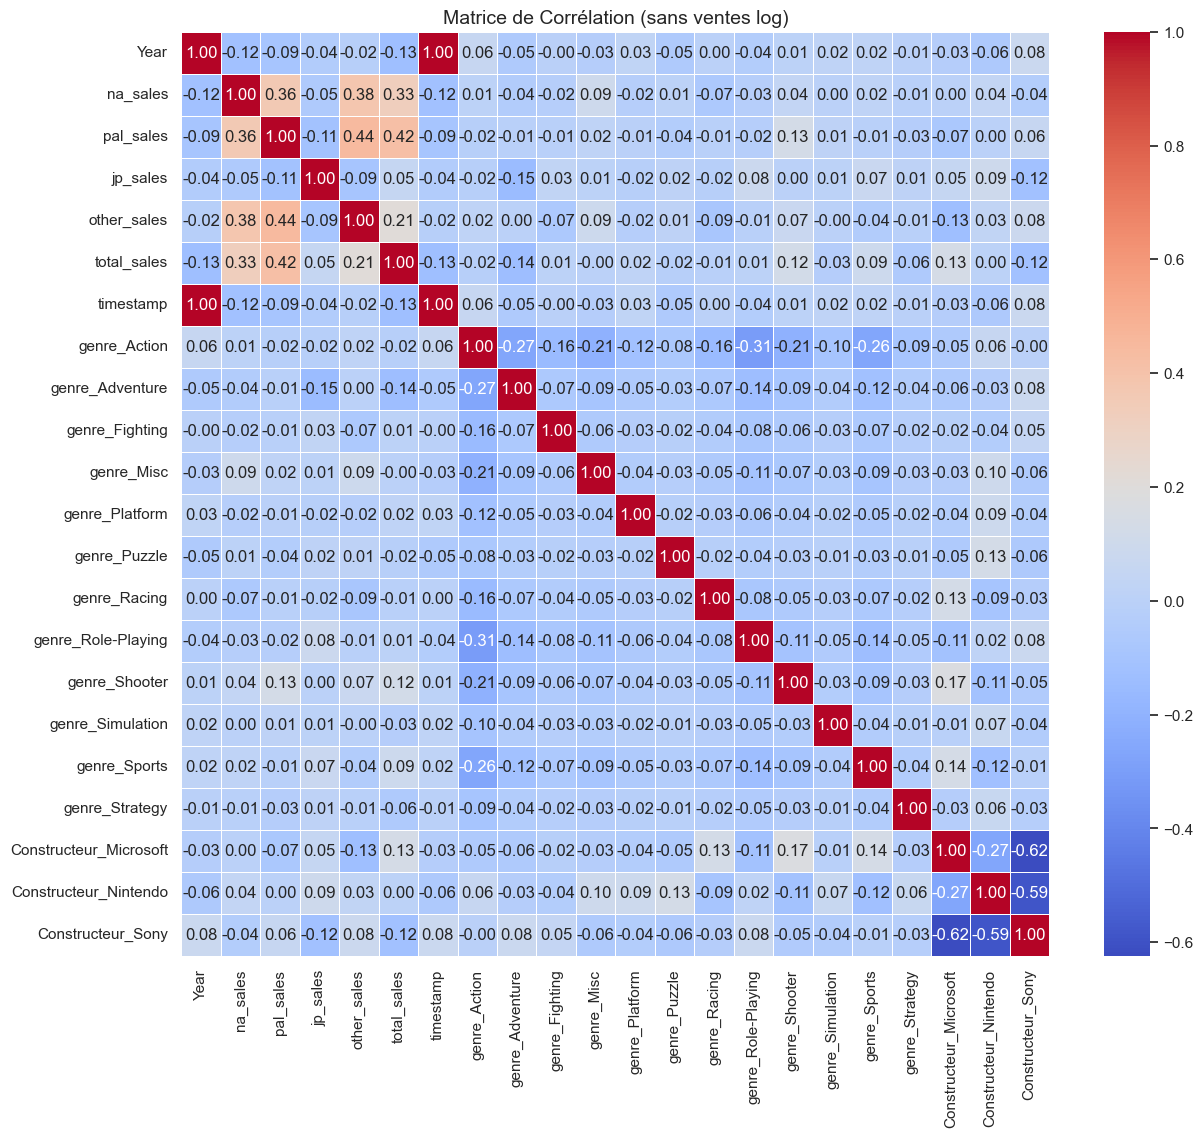

In [504]:
# --------------------------------------------------
# 1. DataFrame sans les colonnes contenant "log"
# --------------------------------------------------
df_no_log = df_encoded[[col for col in df_encoded.columns if 'log' not in col]]

# --------------------------------------------------
# 2. Calculer la matrice de corrélation pour ce DataFrame
# --------------------------------------------------
corr_matrix_no_log = df_no_log.corr()

# --------------------------------------------------
# 3. Créer une heatmap pour visualiser la matrice de corrélation
# --------------------------------------------------
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_no_log, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# --------------------------------------------------
# 4. Ajouter un titre et afficher
# --------------------------------------------------
plt.title('Matrice de Corrélation (sans ventes log)', fontsize=14)
plt.show()


Cette matrice de corrélation montre que :

Les ventes en PAL et NA sont modérément corrélées entre elles (0.36), ce qui suggère une tendance similaire des marchés occidentaux.

Les ventes totales sont fortement corrélées avec les ventes PAL (0.42) et NA (0.35).

Le genre Action est négativement corrélé avec Shooter (-0.27), Sports (-0.26) et RPG (-0.26) → ces genres tendent à ne pas coexister fortement dans un même jeu.

Le constructeur Sony est positivement corrélé aux genres Action (0.06) et Shooter (0.17), et fortement négativement à Nintendo (-0.62) → leurs catalogues sont très différenciés.

Les corrélations restent globalement faibles (< 0.5), indiquant qu’il y a peu de dépendances linéaires fortes entre genres, régions ou constructeurs.

# Données Twitch

## Nettoyage et analyse des données Twitch

In [518]:
from IPython.display import display
print("df_twitch:")
display(df_twitch.head(2))

df_twitch:


Rank                              Game  Month  Year  Hours_watched  \
0     1                 League of Legends      1  2016       94377226   
1     2  Counter-Strike: Global Offensive      1  2016       47832863   

   Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers  \
0         1362044        530270           2903     129172       127021   
1          830105        372654           2197     120849        64378   

   Avg_channels  Avg_viewer_ratio  
0          1833             69.29  
1          1117             57.62

In [519]:
df_twitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              21000 non-null  int64  
 1   Game              20999 non-null  object 
 2   Month             21000 non-null  int64  
 3   Year              21000 non-null  int64  
 4   Hours_watched     21000 non-null  int64  
 5   Hours_streamed    21000 non-null  int64  
 6   Peak_viewers      21000 non-null  int64  
 7   Peak_channels     21000 non-null  int64  
 8   Streamers         21000 non-null  int64  
 9   Avg_viewers       21000 non-null  int64  
 10  Avg_channels      21000 non-null  int64  
 11  Avg_viewer_ratio  21000 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.9+ MB


In [520]:
# Conserver les colonnes nécessaires pour l'analyse.

df_twitch = df_twitch[['Game', 'Month', 'Year', 'Hours_watched', 'Avg_viewers', 'Peak_viewers']]
print("df_twitch:")
display(df_twitch.head(2))

df_twitch:


Game  Month  Year  Hours_watched  Avg_viewers  \
0                 League of Legends      1  2016       94377226       127021   
1  Counter-Strike: Global Offensive      1  2016       47832863        64378   

   Peak_viewers  
0        530270  
1        372654

In [521]:
print("Valeurs manquantes dans les données Twitch :")
print(df_twitch.isnull().sum())

Valeurs manquantes dans les données Twitch :
Game             1
Month            0
Year             0
Hours_watched    0
Avg_viewers      0
Peak_viewers     0
dtype: int64


In [522]:
# Gestion des valeurs manquantes
# Supprimer les lignes où la valeur de 'Game' est manquante
df_twitch= df_twitch.dropna(subset=['Game'])

# Vérifier qu'il n'y a plus de valeurs manquantes
print("Données des jeux Twitch - Valeurs manquantes après suppression :")
print(df_twitch.isnull().sum())

Données des jeux Twitch - Valeurs manquantes après suppression :
Game             0
Month            0
Year             0
Hours_watched    0
Avg_viewers      0
Peak_viewers     0
dtype: int64


In [523]:
# Vérification de types de données.
print("\nTypes de données dans Twitch :")
print(df_twitch.dtypes)


Types de données dans Twitch :
Game             object
Month             int64
Year              int64
Hours_watched     int64
Avg_viewers       int64
Peak_viewers      int64
dtype: object


In [524]:
# supprime les doublons basés uniquement sur une combinaison de colonnes : ['Game', 'Year'].
# Pour les données Twitch Game : Supposant que 'Game' et 'Year' identifient des entrées uniques
df_tw_nett = df_twitch.drop_duplicates(subset=['Game', 'Year'], keep='first')


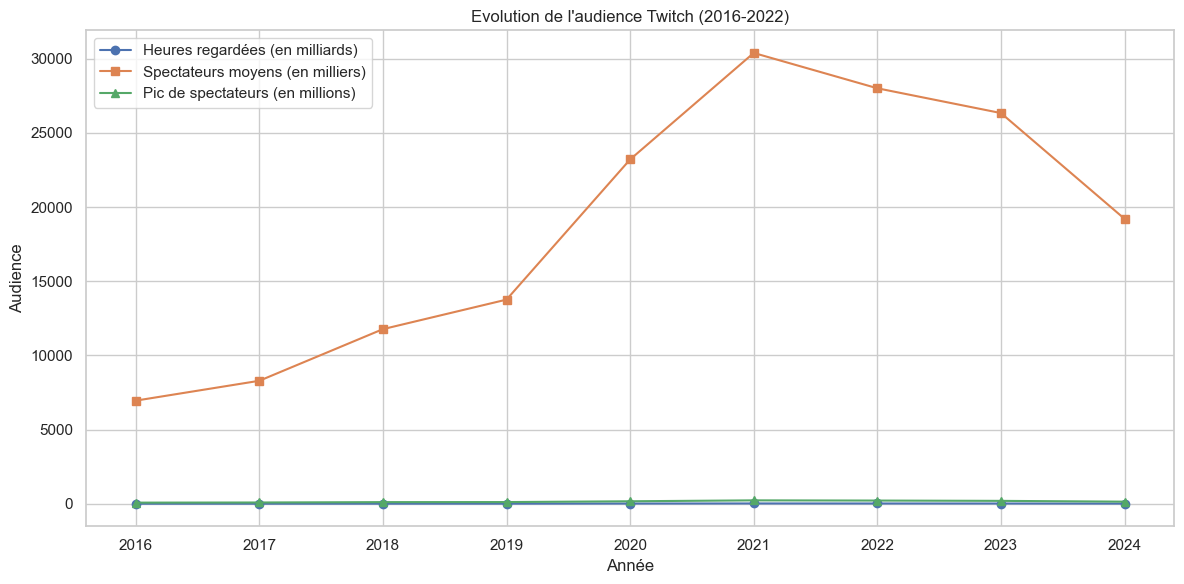

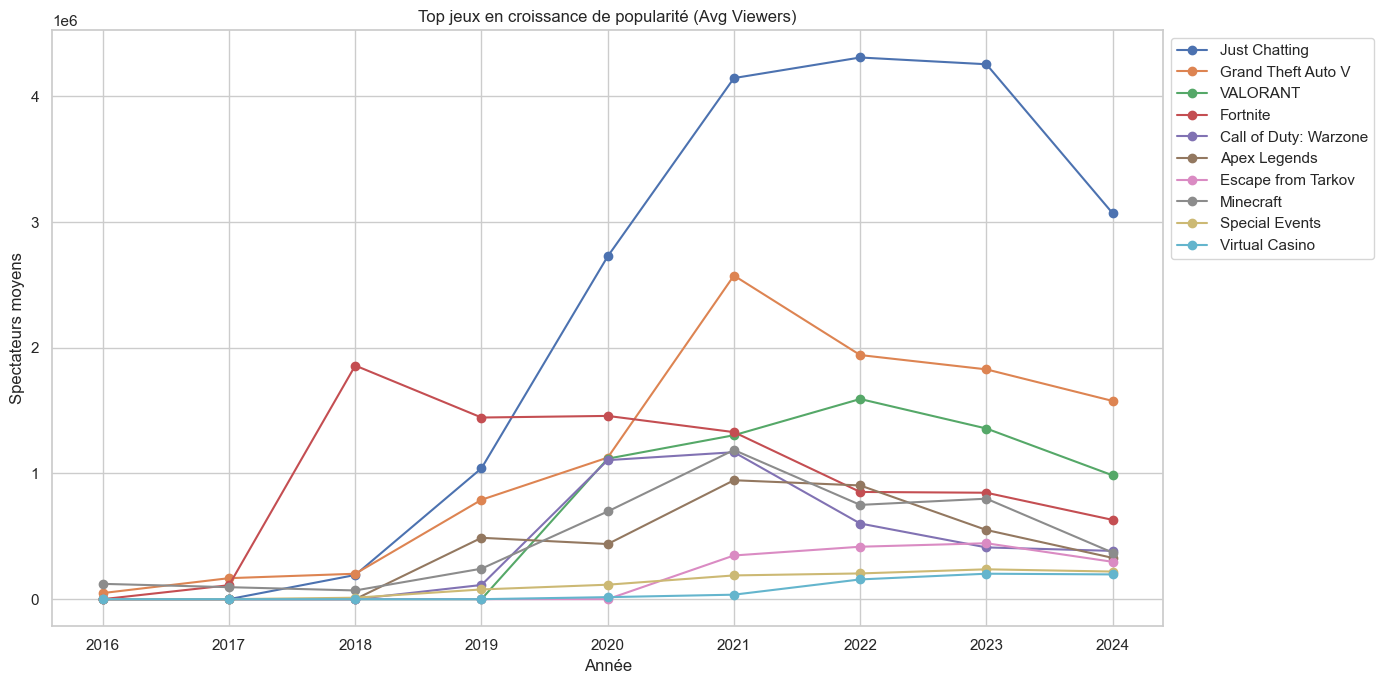

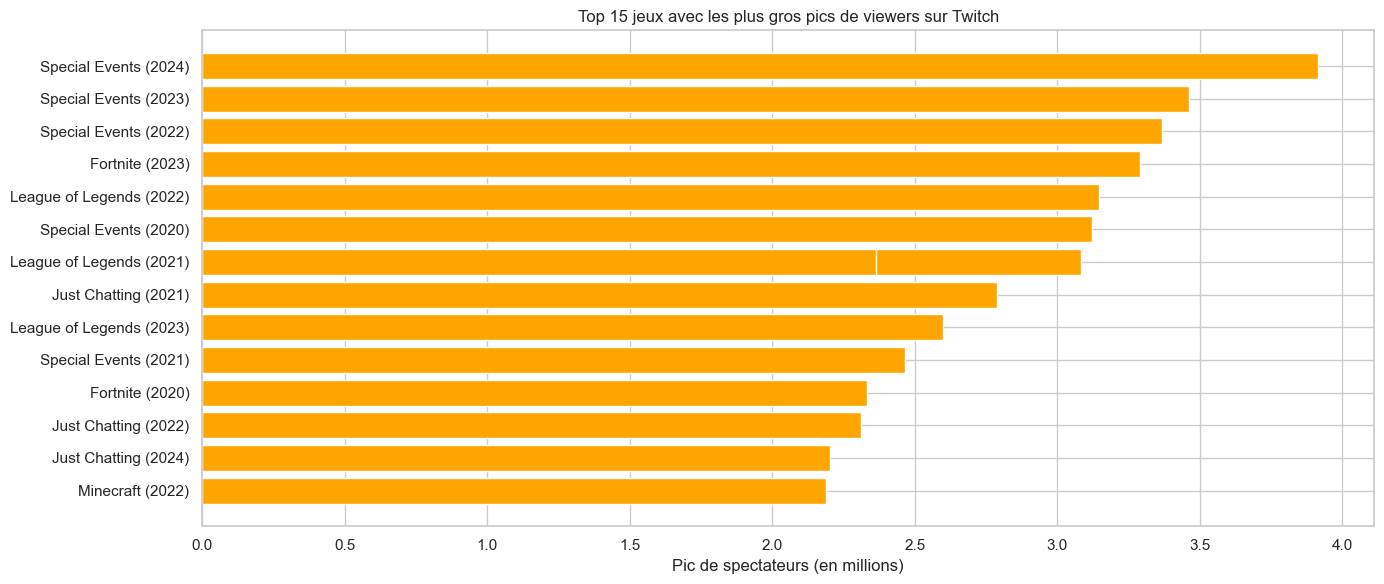

In [528]:
# Analyse des tendances Twitch (2016-2022) avec lien au COVID

# ------------------------------
# 2. Préparation des données
# ------------------------------
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(DAY=1))

# Agréger les données par année pour l'analyse globale
df_yearly = df.groupby("Year")[["Hours_watched", "Avg_viewers", "Peak_viewers"]].sum().reset_index()

# ------------------------------
# 3. Visualisation de l'audience globale
# ------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_yearly["Year"], df_yearly["Hours_watched"] / 1e9, marker='o', label="Heures regardées (en milliards)")
plt.plot(df_yearly["Year"], df_yearly["Avg_viewers"] / 1e3, marker='s', label="Spectateurs moyens (en milliers)")
plt.plot(df_yearly["Year"], df_yearly["Peak_viewers"] / 1e6, marker='^', label="Pic de spectateurs (en millions)")
plt.title("Evolution de l'audience Twitch (2016-2022)")
plt.xlabel("Année")
plt.ylabel("Audience")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Analyse des tendances par jeu
# ------------------------------
trend_df = df.groupby(['Game', 'Year'])[["Avg_viewers", "Hours_watched"]].sum().reset_index()
pivot_viewers = trend_df.pivot(index='Game', columns='Year', values='Avg_viewers').fillna(0)
pivot_viewers['Growth'] = pivot_viewers.iloc[:, -1] - pivot_viewers.iloc[:, 0]
pivot_viewers['Years_active'] = (pivot_viewers.iloc[:, :-2] > 0).sum(axis=1)
popular_stable = pivot_viewers[pivot_viewers['Years_active'] >= 3]
top_growth_games = popular_stable.sort_values(by='Growth', ascending=False).head(10)

plt.figure(figsize=(14, 7))
for game in top_growth_games.index:
    plt.plot(pivot_viewers.columns[:-2], pivot_viewers.loc[game].iloc[:-2], marker='o', label=game)
plt.title("Top jeux en croissance de popularité (Avg Viewers)")
plt.xlabel("Année")
plt.ylabel("Spectateurs moyens")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# 5. Top jeux par pics de viewers (Hype)
# ------------------------------
peak_df = df.sort_values(by="Peak_viewers", ascending=False).head(15)
plt.figure(figsize=(14, 6))
plt.barh(peak_df["Game"] + " (" + peak_df["Year"].astype(str) + ")", peak_df["Peak_viewers"] / 1e6, color='orange')
plt.xlabel("Pic de spectateurs (en millions)")
plt.title("Top 15 jeux avec les plus gros pics de viewers sur Twitch")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



On identifie ici les jeux qui ont connu une croissance durable sur plusieurs années, ce qui révèle des tendances de fond solides : jeux multijoueur compétitifs, univers ouverts (sandbox), ou jeux à contenu évolutif.

Les pics d’audience sont souvent liés à des événements marquants : lancement, mises à jour majeures, compétitions e-sport, ou collaborations avec des streamers.

Cette analyse est précieuse pour planifier une stratégie marketing AAA : créer un événement de lancement fort, générer de la visibilité, et maintenir l'intérêt dans le temps.


Les années 2020–2021 confirment une hausse massive de l’audience Twitch liée à la pandémie de COVID-19 : un moment charnière qui a ancré les plateformes de streaming comme pilier de la communication dans le jeu vidéo.

Cette analyse permet d’inspirer la stratégie d'un futur jeu AAA, pour capter l’attention rapidement et construire une base de joueurs engagés.

# Données Gaming_Questionnaire_TripleA

In [526]:
Questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column                                                                                                                                     Non-Null Count  Dtype         
---  ------                                                                                                                                     --------------  -----         
 0   Date                                                                                                                                       18 non-null     datetime64[ns]
 1   Quelle est votre plateforme de jeu préférée ?                                                                                              18 non-null     object        
 2   Quel type de console utilisez-vous pour jouer ?                                                                                            18 non-null     object        
 3   Quel est votre tra

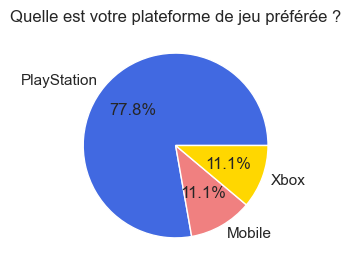

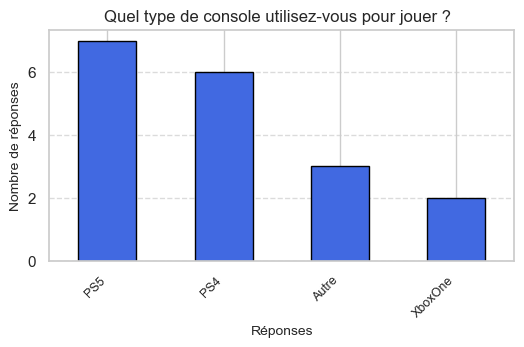

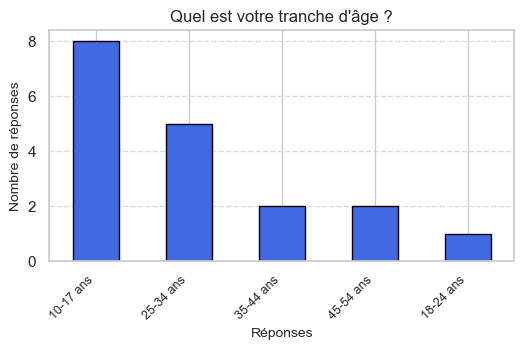

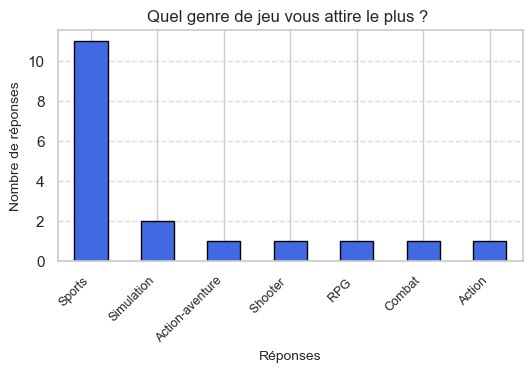

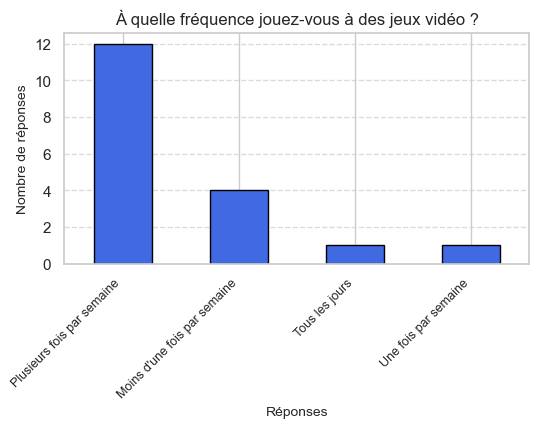

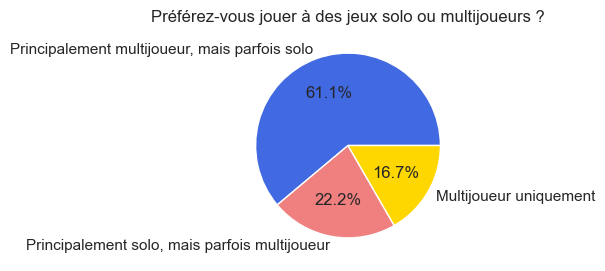

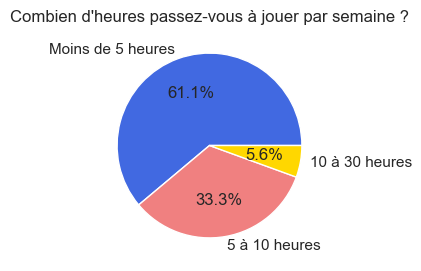

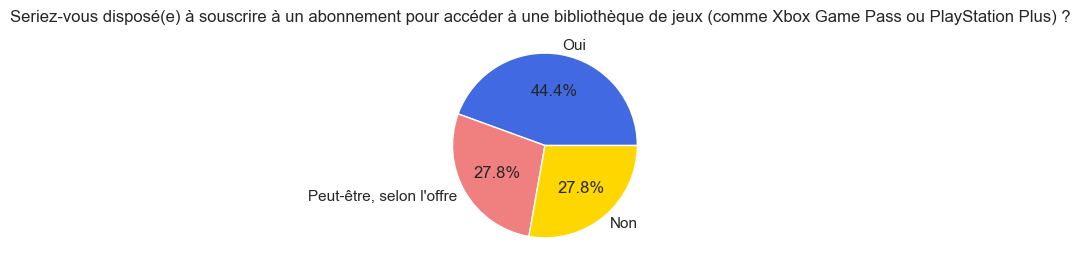

In [527]:
# --------------------------------------------------
# 1. Exclure la colonne "Date" et ne traiter que les questions
# --------------------------------------------------
questions = Questionnaire.columns[1:]

# --------------------------------------------------
# 2. Créer des visualisations adaptées au nombre de réponses uniques
# --------------------------------------------------
for question in questions:
    response_counts = Questionnaire[question].value_counts()
    
    # --------------------------------------------------
    # 3. Définir la taille de la figure
    # --------------------------------------------------
    plt.figure(figsize=(6, 3))

    # --------------------------------------------------
    # 4. Utiliser un camembert si le nombre de réponses uniques est moin ou égal à 3 
    # --------------------------------------------------
    if len(response_counts) <= 3:
        plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', 
                colors=['royalblue', 'lightcoral', 'gold'])
        plt.title(question, fontsize=12)
    
    # --------------------------------------------------
    # 5. Sinon, utiliser un graphique en barres
    # --------------------------------------------------
    else:
        response_counts.plot(kind='bar', color='royalblue', edgecolor='black')
        plt.title(question, fontsize=12)
        plt.xlabel("Réponses", fontsize=10)
        plt.ylabel("Nombre de réponses", fontsize=10)
        plt.xticks(rotation=45, ha="right", fontsize=9)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    # --------------------------------------------------
    # 6. Afficher la visualisation
    # --------------------------------------------------
    plt.show()


# Conclusion
À l’issue de cette analyse complète des tendances du marché vidéoludique, des comportements des joueurs et des performances des genres et plateformes, il apparaît clairement qu’un positionnement Triple A réussi repose sur une combinaison stratégique de plusieurs facteurs.

Les données confirment que le genre Action-Adventure-RPG est le plus porteur, alliant rythme, profondeur narrative et mécaniques de progression. Couplé à une expérience immersive, solo et coopérative, avec la possibilité d’intégrer la réalité virtuelle, ce type de jeu répond aux attentes des joueurs les plus engagés.

La PlayStation 5, les consoles de nouvelle génération et potentiellement la Nintendo Switch 2 constituent des plateformes prioritaires pour atteindre un public large et exigeant. Le modèle économique recommandé est hybride : vente initiale, DLCs réguliers, et microtransactions optionnelles, soutenu par une stratégie de lancement multicanal (physique + digital), avec une forte présence sur des plateformes de streaming vidéo en direct comme Twitch.

Enfin, l’analyse des ventes historiques, des préférences régionales et des projections 2030 valide l’opportunité de développement d’un jeu Triple A compétitif, capable de s’inscrire durablement dans l’écosystème vidéoludique mondial.